In [221]:
import wfdb
import os
import glob
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.decomposition import FastICA
from scipy.interpolate import RectBivariateSpline
from scipy import interpolate
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import matplotlib.animation as animation
import matplotlib.cm as cm
from IPython.display import HTML
# from google.colab import files
from pyclustering.cluster.gmeans import gmeans
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric
from sklearn.svm import SVC
import itertools
import warnings
np.warnings = warnings

In [347]:
# files = glob.glob('pr_dataset/subject[0-9][0-9]_session[0-9]/maintenance_preprocess_sample[0-9][0-9]')
wfdb.dl_database('hd-semg',os.getcwd(), records=['pr_dataset/subject20_session1/maintenance_preprocess_sample100'])

Generating record list for: pr_dataset/subject20_session1/maintenance_preprocess_sample100
Generating list of all files for: pr_dataset/subject20_session1/maintenance_preprocess_sample100


NetFileNotFoundError: 404 Error: Not Found for url: https://physionet.org/files/hd-semg/2.0.0/pr_dataset/subject20_session1/maintenance_preprocess_sample100.hea

In [ ]:
wfdb.rdheader('pr_dataset/subject01_session1/maintenance_preprocess_sample1').record_name

'maintenance_preprocess_sample1'

In [351]:
try:
    record = wfdb.rdrecord('pr_dataset/subject01_session1/maintenance_preprocess_sample1')
except FileNotFoundError:
    pass

In [235]:
record

In [73]:
record.p_signal[:,:64].shape

(8192, 64)

In [75]:
record.sig_name[:64]

['ED-8-8',
 'ED-8-7',
 'ED-8-6',
 'ED-8-5',
 'ED-8-4',
 'ED-8-3',
 'ED-8-2',
 'ED-8-1',
 'ED-7-8',
 'ED-7-7',
 'ED-7-6',
 'ED-7-5',
 'ED-7-4',
 'ED-7-3',
 'ED-7-2',
 'ED-7-1',
 'ED-6-8',
 'ED-6-7',
 'ED-6-6',
 'ED-6-5',
 'ED-6-4',
 'ED-6-3',
 'ED-6-2',
 'ED-6-1',
 'ED-5-8',
 'ED-5-7',
 'ED-5-6',
 'ED-5-5',
 'ED-5-4',
 'ED-5-3',
 'ED-5-2',
 'ED-5-1',
 'ED-4-8',
 'ED-4-7',
 'ED-4-6',
 'ED-4-5',
 'ED-4-4',
 'ED-4-3',
 'ED-4-2',
 'ED-4-1',
 'ED-3-8',
 'ED-3-7',
 'ED-3-6',
 'ED-3-5',
 'ED-3-4',
 'ED-3-3',
 'ED-3-2',
 'ED-3-1',
 'ED-2-8',
 'ED-2-7',
 'ED-2-6',
 'ED-2-5',
 'ED-2-4',
 'ED-2-3',
 'ED-2-2',
 'ED-2-1',
 'ED-1-8',
 'ED-1-7',
 'ED-1-6',
 'ED-1-5',
 'ED-1-4',
 'ED-1-3',
 'ED-1-2',
 'ED-1-1']

In [62]:
signals, fields = wfdb.rdsamp('pr_dataset/subject01_session1/maintenance_preprocess_sample1')

In [63]:
signals

array([[-4.49443823e-05,  1.70236183e-03,  1.19062582e-03, ...,
         6.74819427e-03,  7.18982505e-03,  4.97574319e-03],
       [-2.89891266e-03, -1.88516579e-03,  2.08666380e-04, ...,
         7.29734310e-03,  7.40700578e-03,  4.83425287e-03],
       [-4.37084118e-03, -2.68493309e-03,  1.03105741e-03, ...,
         6.45249875e-03,  4.59508692e-03,  6.13124754e-04],
       ...,
       [ 3.57532561e-02,  3.21049446e-02,  3.04407426e-02, ...,
         1.96954340e-02,  2.54672976e-02,  2.45603627e-02],
       [ 1.65844771e-02,  1.56525887e-02,  1.39438240e-02, ...,
        -8.16330857e-03,  1.87461257e-03,  2.54682590e-03],
       [-1.15731785e-03, -2.05654450e-04,  1.96391888e-03, ...,
        -3.01398223e-02, -1.60485125e-02, -1.46560398e-02]])

In [82]:
np.array(fields['sig_name'])[192:256]

array(['FP-8-8', 'FP-8-7', 'FP-8-6', 'FP-8-5', 'FP-8-4', 'FP-8-3',
       'FP-8-2', 'FP-8-1', 'FP-7-8', 'FP-7-7', 'FP-7-6', 'FP-7-5',
       'FP-7-4', 'FP-7-3', 'FP-7-2', 'FP-7-1', 'FP-6-8', 'FP-6-7',
       'FP-6-6', 'FP-6-5', 'FP-6-4', 'FP-6-3', 'FP-6-2', 'FP-6-1',
       'FP-5-8', 'FP-5-7', 'FP-5-6', 'FP-5-5', 'FP-5-4', 'FP-5-3',
       'FP-5-2', 'FP-5-1', 'FP-4-8', 'FP-4-7', 'FP-4-6', 'FP-4-5',
       'FP-4-4', 'FP-4-3', 'FP-4-2', 'FP-4-1', 'FP-3-8', 'FP-3-7',
       'FP-3-6', 'FP-3-5', 'FP-3-4', 'FP-3-3', 'FP-3-2', 'FP-3-1',
       'FP-2-8', 'FP-2-7', 'FP-2-6', 'FP-2-5', 'FP-2-4', 'FP-2-3',
       'FP-2-2', 'FP-2-1', 'FP-1-8', 'FP-1-7', 'FP-1-6', 'FP-1-5',
       'FP-1-4', 'FP-1-3', 'FP-1-2', 'FP-1-1'], dtype='<U6')

In [ ]:
wfdb.plot_all_records('pr_dataset/subject01_session1')

# ここから

In [302]:
def get_centers_directions(emg_data, window_size=50, threshold=0):
  # ---------- パラメータ設定 ----------
  window_size = window_size  # ウィンドウの長さ（例: 50サンプル）
  threshold = threshold   # PTPの最大 - 平均がこの値以上なら採用
  half_win = window_size // 2

  # ---------- EMG信号（例：num_samples × 64） ----------
  # num_samples = 5000
  emg_data = emg_data

  # ---------- 出力先 ----------
  valid_indices = []

  # ---------- 64チャネルすべてに対してピーク検出 ----------
  peak_mask = np.zeros(emg_data.shape[0], dtype=bool)

  for ch in range(64):
      rms_signal = np.sqrt(emg_data[:,ch]**2)
      peaks, _ = find_peaks(rms_signal, distance=50,
                        height=np.mean(rms_signal) + np.std(rms_signal))
      # peaks, _ = find_peaks(emg_data[:, ch], distance=window_size//2, height=np.std(emg_data[:,ch]) * 1)
      peak_mask[peaks] = True  # どこか1チャネルでもピークがあればTrue

  # ---------- 全体でのピーク位置で条件を評価 ----------
  for t in np.where(peak_mask)[0]:
      if t - half_win < 0 or t + half_win >= emg_data.shape[0]:
          continue  # ウィンドウが境界を超えるならスキップ

      snippet = emg_data[t - half_win : t + half_win, :]  # shape: [window_size, 64]
      ptp_per_ch = snippet.max(axis=0) - snippet.min(axis=0)  # 各チャネルのPTP
      ptp_mean = np.mean(ptp_per_ch)
      ptp_max = np.max(ptp_per_ch)

      if ptp_max - ptp_mean >= threshold:
          valid_indices.append(t)

  print(f"検出されたピーク数（条件を満たすもの）: {len(valid_indices)}")

  # ----- MUAP波形の切り出し -----
  snippets = []
  valid_peaks = []
  for peak in valid_indices:
      if peak - window_size//2 >= 0 and peak + window_size//2 < emg_data.shape[0]:
          snippet = emg_data[peak - window_size//2 : peak + window_size//2, :]
          snippets.append(snippet)
          valid_peaks.append(peak)

  snippets = np.array(snippets)
  valid_peaks = np.array(valid_peaks)


  # ガウス関数定義
  def gaussian_2d(coord, A, x0, y0, sigma_x, sigma_y, theta, offset):
      x, y = coord #coord[:, 0], coord[:, 1]
      a = (np.cos(theta)**2) / (2*sigma_x**2) + (np.sin(theta)**2) / (2*sigma_y**2)
      b = -(np.sin(2*theta)) / (4*sigma_x**2) + (np.sin(2*theta)) / (4*sigma_y**2)
      c = (np.sin(theta)**2) / (2*sigma_x**2) + (np.cos(theta)**2) / (2*sigma_y**2)
      return A * np.exp(-(a*(x - x0)**2 + 2*b*(x - x0)*(y - y0) + c*(y - y0)**2)) + offset

  # 座標グリッド
  x = np.arange(8)
  y = np.arange(8)
  xv, yv = np.meshgrid(x, y)
  coords = np.vstack((xv.ravel(), yv.ravel()))



  centers = []
  directions = []
  theta_1s = []
  features = []
  for snippet in snippets[:]:
    segment = snippet
    #ピーク間振幅
    ptp = np.ptp(segment,axis=0) #shape:(64,)
    map_2d = ptp.reshape(8, 8)

    # フィッティング
    max_ptp_index = np.unravel_index(np.argmax(map_2d), map_2d.shape)
    # print(f'max_ptp_index:({max_ptp_index[0]},{max_ptp_index[1]})')
    initial = [np.max(ptp)-np.min(ptp), max_ptp_index[0], max_ptp_index[1], 1, 1, 0, np.min(ptp)]
    bounds = ([0, 0, 0, 0.1, 0.1, -np.pi/2, -np.inf],
              [np.inf, 7, 7, 5, 5, np.pi/2, np.inf])
    popt, _ = curve_fit(gaussian_2d, coords, ptp, p0=initial, bounds=bounds, maxfev=1000000)
    A, x0, y0, sigma_x, sigma_y, theta, offset = popt #パラメータ取得
    center = (x0, y0)
    if sigma_x > sigma_y:
        theta_1 = theta
        # print('σx > σy')
    else:
      if theta >= 0:
        theta_1 = theta - np.pi/2
      else:
        theta_1 = theta + np.pi/2
      # print('σy >= σx')
    direction = (np.cos(theta_1), np.sin(theta_1))

    centers.append(center)
    directions.append(direction)
    theta_1s.append(np.degrees(theta_1))

    feature = []
    feature.append(center[0])
    feature.append(center[1])
    feature.append(np.degrees(theta_1))
    features.append(feature)

  # print(centers)
  # print(directions)
  # print(theta_1s)
  # print(f'all centers:: ave:{np.mean(centers, axis=0)}, std:{np.std(centers, axis=0)}')
  # print(f'all theta_1:: ave:{np.mean(theta_1s, axis=0)}, std:{np.std(theta_1s, axis=0)}')

  return features

In [121]:
def clustering(features, k1=4, k2=3):
    # 1. 特徴ベクトルを構築
    features = np.array(features)
    results_df = pd.DataFrame(data=features, columns=['center_x', 'center_y', 'theta_deg'])

    # --- 第1段階：中心座標でクラスタリング ---
    # 特徴量：center_x, center_y
    center_features = results_df[['center_x', 'center_y']].dropna()
    k1 = k1  # 中心クラスタ数（例）
    kmeans1 = KMeans(n_clusters=k1, random_state=0)
    center_labels = kmeans1.fit_predict(center_features)

    # 結果に追加
    results_df['center_cluster'] = -1
    results_df.loc[center_features.index, 'center_cluster'] = center_labels

    # # --- 第2段階：方向角でクラスタリング（各中心クラスタ内で） ---
    # # θの周期性を考慮 → sinθ, cosθでクラスタリング
    # results_df['theta_sin'] = np.sin(results_df['theta_rad'])
    # results_df['theta_cos'] = np.cos(results_df['theta_rad'])

    direction_cluster_labels = np.full(len(results_df), -1)  # 初期化

    k2 = k2  # 各中心クラスタ内の方向クラスタ数（例）

    for group_id in range(k1):
        group_df = results_df[results_df['center_cluster'] == group_id]
        idx = group_df.index
        if len(group_df) >= k2:  # クラスタ数以上あるか確認
            dir_features = group_df[['theta_deg']].values
            kmeans2 = KMeans(n_clusters=k2, random_state=0)  # 固定乱数
            sub_labels = kmeans2.fit_predict(dir_features)
            direction_cluster_labels[idx] = sub_labels + group_id * 10  # 固有ラベル化

    # 結果に追加
    results_df['direction_cluster'] = direction_cluster_labels


    # クラスタごとに平均・標準偏差を集計
    cluster_stats = results_df.groupby('direction_cluster').agg({
        'center_x': ['mean', 'std'],
        'center_y': ['mean', 'std'],
        'theta_deg': ['mean', 'std'],
        'direction_cluster': 'count'
    })

    # 結果をまとめ直す
    summary_df = pd.DataFrame({
        'cluster': cluster_stats.index,
        'center_x_mean': cluster_stats[('center_x', 'mean')],
        'center_x_std': cluster_stats[('center_x', 'std')],
        'center_y_mean': cluster_stats[('center_y', 'mean')],
        'center_y_std': cluster_stats[('center_y', 'std')],
        'theta_deg_mean': cluster_stats[('theta_deg', 'mean')],
        'theta_deg_std': cluster_stats[('theta_deg', 'std')],
        # 'count': results_df['cluster'].value_counts().sort_index(),
        'count': cluster_stats[('direction_cluster', 'count')]
    }).reset_index(drop=True)

    # 結果表示
    summary_df

    return results_df, summary_df

In [122]:
def get_cluster_colors(n_clusters, cmap_name='tab20'):
    cmap = cm.get_cmap(cmap_name, n_clusters)  # 'tab20', 'nipy_spectral', etc.
    return [cmap(i) for i in range(n_clusters)]

In [123]:
def plot_fiber(results_df, arrow_scale=0.5):
  arrow_scale = arrow_scale

  n_clusters = results_df['direction_cluster'].nunique()
  cluster_colors = get_cluster_colors(n_clusters)

  # プロット準備
  plt.figure(figsize=(7, 6))
  for n, center_cluster in enumerate(sorted(results_df['direction_cluster'].unique())):
    sub_df = results_df[results_df['direction_cluster'] == center_cluster]
    color = cluster_colors[n]

    for _, row in sub_df.iterrows():
          x, y = row['center_x'], row['center_y']
          theta = row['theta_deg']
          dx, dy = np.cos(np.radians(theta)) * arrow_scale, np.sin(np.radians(theta)) * arrow_scale

          # 色で中心クラスタを、マーカーサイズで方向クラスタを示す
          plt.arrow(x, y, dx, dy, head_width=0.15, color=color, alpha=0.8)
          plt.plot(x, y, 'o', color=color,
                  label=f"Center Cl {center_cluster}" if f"Center Cl {center_cluster}" not in plt.gca().get_legend_handles_labels()[1] else "")

  # ラベル・軸
  plt.xlabel("center_x")
  plt.ylabel("center_y")
  plt.title("2-Stage Clustering of Muscle Fiber Direction")
  plt.grid(True)
  plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
  plt.axis('equal')
  plt.tight_layout()
  plt.xlim(0, 7)
  plt.ylim(0, 7)
  plt.show()

In [270]:
def get_virtual_bipolars(results_df, ied=2, arrow_scale=0.5):
  #仮想双極電極の電極間距離（cm）
  a = ied

#   n_clusters = results_df['direction_cluster'].nunique()
#   cluster_colors = get_cluster_colors(n_clusters)

  virtual_bipolars = []
  labels = []
  center_direction = []
  n_virtual_bipolars_checker = []
  for n, direction_cluster in enumerate(sorted(results_df['direction_cluster'].unique())):
    sub_df = results_df[results_df['direction_cluster'] == direction_cluster]
    if sub_df['center_cluster'].count() >= 20 and sub_df['center_x'].std() < 1 and sub_df['center_y'].std() < 1 and sub_df['theta_deg'].std() < 20:
      x, y = sub_df['center_x'].mean(), sub_df['center_y'].mean()
      theta = sub_df['theta_deg'].mean()
      #dx, dy = np.cos(np.radians(theta)) * arrow_scale, np.sin(np.radians(theta)) * arrow_scale
      # print(f'cluster:{direction_cluster}, x={x}, y={y}, θ={theta}')
      x1 = x - a/2*np.cos(np.radians(theta))
      y1 = y - a/2*np.sin(np.radians(theta))
      x2 = x + a/2*np.cos(np.radians(theta))
      y2 = y + a/2*np.sin(np.radians(theta))
      virtual_bipolars.append([x1, y1, x2, y2])
      labels.append(direction_cluster)
      center_direction.append([x, y, theta])
      n_virtual_bipolars_checker.append(True)
  if len(n_virtual_bipolars_checker) == 1:
    virtual_bipolars.append([0,0,0,0])
    labels.append(999)
    center_direction.append([0,0,0])

  return virtual_bipolars, labels, center_direction, len(n_virtual_bipolars_checker)

In [125]:
def extract_rms_features(windows):
    """
    各ウィンドウからチャネルごとのRMS特徴量を抽出
    入力: shape = (window_size, n_channels)
    出力: shape = (n_channels)
    """
    return np.sqrt(np.mean(np.square(windows), axis=0))

In [272]:
def get_virtual_emg(emg_data, virtual_bipolars):
  # --- データ読み込み ---
  emg_data = emg_data

  # === スライディングウィンドウ抽出 ===
  n_samples = emg_data.shape[0]
  segments = []
  time_stamps = []

  # 座標グリッド
  x = np.arange(8)
  y = np.arange(8)
  xv, yv = np.meshgrid(x, y)
  coords = np.vstack((xv.ravel(), yv.ravel()))
  # # パラメータ計算
  # f = RectBivariateSpline(x, y, map_2d)

  virtual_emg = []
  for i in range(n_samples):
    f = RectBivariateSpline(x, y, emg_data[i].reshape(8,8))
    z_list = []
    for bipolar in virtual_bipolars:
      x1=bipolar[0]
      y1=bipolar[1]
      x2=bipolar[2]
      y2=bipolar[3]
      z1 = f(x1, y1)
      z2 = f(x2, y2)
      z_diff = z1 - z2
      z_list.append(z_diff)
    virtual_emg.append(np.array(z_list).reshape(-1))
  virtual_emg = np.array(virtual_emg)

  # print(emg_data.shape)
  # print(virtual_emg.shape)

  return virtual_emg

In [127]:
def get_features(virtual_emg, labels, fs=2000, window_ms=50, stride_ms=20):
  # --- データ読み込み例（ここではダミーデータ） ---
  fs = fs  # サンプリング周波数
  window_ms = window_ms    # ウィンドウ幅 [ms]
  stride_ms = stride_ms    # スライド幅 [ms]
  window_size = int(fs * (window_ms / 1000))  # サンプル数に変換
  stride_size = int(fs * stride_ms / 1000)  # スライド数
  n_samples = virtual_emg.shape[0]
  X = []
  y = []
  for start in range(0, n_samples - window_size + 1, stride_size):
      end = start + window_size
      window_emg = virtual_emg[start:end, :]
      #特徴量抽出
      rms = extract_rms_features(window_emg) # shape: (virtual_bipolar_channels,)
      X.append(rms)
      y.append(labels)
  return X, y

In [212]:
#分類器
def SVC_classifier(X_session1, y_session1, X_session2, y_session2):

    X_train = np.array(X_session1).reshape(-1,1)
    y_train = np.array(y_session1).reshape(-1,1)
    X_test = np.array(X_session2).reshape(-1,1)
    y_test = np.array(y_session2).reshape(-1,1)

    # データ分割
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVMモデル学習
    model = SVC(kernel='rbf', probability=True, random_state=0)
    model.fit(X_train, y_train)

    prob_matrix = model.predict_proba(X_test) # shape: (n_test_samples, n_train_classes)
    # === 各テストラベルごとに学習クラスへの平均確率を出力 ===
    class_labels = model.classes_  # 学習クラス（例: [0, 1, 2]）

    result = []

    for test_label in np.unique(y_test):
        idx = y_test.reshape(-1) == test_label
        mean_prob = np.mean(prob_matrix[idx], axis=0)  # 学習クラスへの平均確率
        result.append([test_label] + list(mean_prob))

    # # === 表形式で表示 ===
    # columns = ['Test Label'] + [f"P(Train={cls})" for cls in class_labels]
    # df_result = pd.DataFrame(result, columns=columns)
    # print(df_result)
    
    return result, y_train, y_test

In [187]:
def calc_diff(train_idx, test_idx, center_direction_session1, center_direction_session2):
    center_direction_session1 = center_direction_session1
    center_direction_session2 = center_direction_session2
    #計算
    center_x_train = np.array(center_direction_session1)[train_idx, 0]
    center_y_train = np.array(center_direction_session1)[train_idx, 1]
    theta_train = np.array(center_direction_session1)[train_idx, 2]
    center_x_test = np.array(center_direction_session2)[test_idx, 0]
    center_y_test = np.array(center_direction_session2)[test_idx, 1]
    theta_test = np.array(center_direction_session2)[test_idx, 2]
    center_x_diff = center_x_train - center_x_test
    center_y_diff = center_y_train - center_y_test
    theta_diff = theta_train - theta_test
    return center_x_diff, center_y_diff, theta_diff

In [205]:
def diff_analyzer(result, y_train, y_test, center_direction_session1, center_direction_session2):
  max_train_idx = []
  for i in range(np.array(result).shape[0]):
    j = np.argmax(np.array(result)[i,1:])
    max_train_idx.append(j)
  # print(max_train_idx)
  diff =[]
  for k in set(max_train_idx):
    if max_train_idx.count(k) >=2:
      idx = max_train_idx == k
      l = np.argmax(np.array(result)[idx, k+1], axis=0)
      max_test_idx = [i for i, j in enumerate(idx) if j == True]
      # print(f'result[{max_test_idx[l]},{k+1}], train:{np.unique(y_train)[k]}, test:{np.unique(y_test)[max_test_idx[l]]}')
      center_x_diff, center_y_diff, theta_diff = calc_diff(k, max_test_idx[l], center_direction_session1, center_direction_session2)
      # print(f'x_diff={center_x_diff}, y_diff={center_y_diff}, theta_diff={theta_diff}')
      diff.append({"train": np.unique(y_train)[k], "test": np.unique(y_test)[max_test_idx[l]], "x_diff": center_x_diff, "y_diff": center_y_diff, "theta_diff": theta_diff})
    else:
      # print(f'result[{max_train_idx.index(k)},{k+1}], train:{np.unique(y_train)[k]}, test:{np.unique(y_test)[max_train_idx.index(k)]}')
      center_x_diff, center_y_diff, theta_diff = calc_diff(k, max_train_idx.index(k), center_direction_session1, center_direction_session2)
      # print(f'x_diff={center_x_diff}, y_diff={center_y_diff}, theta_diff={theta_diff}')
      diff.append({"train": np.unique(y_train)[k], "test": np.unique(y_test)[max_train_idx.index(k)], "x_diff": center_x_diff, "y_diff": center_y_diff, "theta_diff": theta_diff})

  return diff

# 分析

## SVMで高確率と判断されたバイポーラ間の差分

In [414]:
n_subjects = 3 #20
n_gestures = 34
n_trials = 2

diffs = []
for i in range(n_subjects):
    for j in range(n_gestures):
        for k in range(n_trials):
            record_name_session1 = 'pr_dataset/subject{:02}'.format(i+1) + '_session1/maintenance_preprocess_sample'+str((j+1)*2+(k-1))
            record_name_session2 = 'pr_dataset/subject{:02}'.format(i+1) + '_session2/maintenance_preprocess_sample'+str((j+1)*2+(k-1))
            print(record_name_session1, record_name_session2) # ファイル名
            try:
                record_session1 = wfdb.rdrecord(record_name_session1)
                record_session2 = wfdb.rdrecord(record_name_session2)


                filtered_emg_ED_session1 = record_session1.p_signal[:,:64] #Extensor Distal
                filtered_emg_EP_session1 = record_session1.p_signal[:,64:128] #Extensor Proximal
                filtered_emg_FD_session1 = record_session1.p_signal[:,128:192] #Flexor Distal
                filtered_emg_FP_session1 = record_session1.p_signal[:,192:256] #Flexor Proximal

                filtered_emg_ED_session2 = record_session2.p_signal[:,:64] #Extensor Distal
                filtered_emg_EP_session2 = record_session2.p_signal[:,64:128] #Extensor Proximal
                filtered_emg_FD_session2 = record_session2.p_signal[:,128:192] #Flexor Distal
                filtered_emg_FP_session2 = record_session2.p_signal[:,192:256] #Flexor Proximal

                electrode_places = [[filtered_emg_ED_session1, filtered_emg_ED_session2, 'ED'],
                                    [filtered_emg_EP_session1, filtered_emg_EP_session2, 'EP'],
                                    [filtered_emg_FD_session1, filtered_emg_FD_session2, 'FD'],
                                    [filtered_emg_FP_session1, filtered_emg_FP_session2, 'FP']]

                for electrode_place in electrode_places:
                    print(electrode_place[2]) #電極位置
                    
                    try:
                        # session1
                        emg_data_session1 = electrode_place[0]
                        features_session1 = get_centers_directions(emg_data_session1, window_size=50, threshold=0)
                        results_df_session1, summary_df_session1 = clustering(features_session1)
                        virtual_bipolars_session1, labels_session1, center_direction_session1, n_virtual_bipolars_session1 = get_virtual_bipolars(results_df_session1)
                        # session1のvirtual bipolarが１個以上であるか
                        if n_virtual_bipolars_session1 >= 1:
                            virtual_emg_session1 = get_virtual_emg(emg_data_session1, virtual_bipolars_session1)
                            X_session1, y_session1 = get_features(virtual_emg_session1, labels_session1)

                            # session2
                            emg_data_session2 = electrode_place[1]
                            features_session2 = get_centers_directions(emg_data_session2, window_size=50, threshold=0)
                            results_df_session2, summary_df_session2 = clustering(features_session2)
                            virtual_bipolars_session2, labels_session2, center_direction_session2, n_virtual_bipolars_session2 = get_virtual_bipolars(results_df_session2)
                            # session2のvirtual bipolarが１個以上であるか
                            if  n_virtual_bipolars_session2 >= 1:
                                virtual_emg_session2 = get_virtual_emg(emg_data_session2, virtual_bipolars_session2)
                                X_session2, y_session2 = get_features(virtual_emg_session2, labels_session2)

                                result, y_train, y_test = SVC_classifier(X_session1, y_session1, X_session2, y_session2)
                                diff = diff_analyzer(result, y_train, y_test, center_direction_session1, center_direction_session2)
                            # session2のvirtual bipolarが０個の場合
                            else:
                                diff = [None]
                        # session1のvirtual bipolarが０個の場合
                        else:
                            diff = [None]
                    except RuntimeError:
                        diff = [None]
                    finally:
                        diffs.append({'diff':diff, 'subject':i+1, 'gesture':j+1, 'trial': k+1, 'electrode_place':electrode_place[2], 'file_name':[record_name_session1, record_name_session2]})
            except FileNotFoundError:
                pass

pr_dataset/subject01_session1/maintenance_preprocess_sample1 pr_dataset/subject01_session2/maintenance_preprocess_sample1
ED
検出されたピーク数（条件を満たすもの）: 645
検出されたピーク数（条件を満たすもの）: 649


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 452
検出されたピーク数（条件を満たすもの）: 558


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 912
検出されたピーク数（条件を満たすもの）: 609


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 520
検出されたピーク数（条件を満たすもの）: 518


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample2 pr_dataset/subject01_session2/maintenance_preprocess_sample2
ED
検出されたピーク数（条件を満たすもの）: 683
検出されたピーク数（条件を満たすもの）: 648


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 478
検出されたピーク数（条件を満たすもの）: 507


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 953
検出されたピーク数（条件を満たすもの）: 607


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 589
検出されたピーク数（条件を満たすもの）: 504


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample3 pr_dataset/subject01_session2/maintenance_preprocess_sample3
ED
検出されたピーク数（条件を満たすもの）: 893
検出されたピーク数（条件を満たすもの）: 569


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 515
検出されたピーク数（条件を満たすもの）: 325


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 968
検出されたピーク数（条件を満たすもの）: 496


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 827
検出されたピーク数（条件を満たすもの）: 571


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample4 pr_dataset/subject01_session2/maintenance_preprocess_sample4
ED
検出されたピーク数（条件を満たすもの）: 877
検出されたピーク数（条件を満たすもの）: 659


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 743
検出されたピーク数（条件を満たすもの）: 419


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 722
検出されたピーク数（条件を満たすもの）: 474


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 893
検出されたピーク数（条件を満たすもの）: 637


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample5 pr_dataset/subject01_session2/maintenance_preprocess_sample5
ED
検出されたピーク数（条件を満たすもの）: 1088
検出されたピーク数（条件を満たすもの）: 1067


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1234
検出されたピーク数（条件を満たすもの）: 1003


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1704
検出されたピーク数（条件を満たすもの）: 1368


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1307
検出されたピーク数（条件を満たすもの）: 1080


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample6 pr_dataset/subject01_session2/maintenance_preprocess_sample6
ED
検出されたピーク数（条件を満たすもの）: 1158
検出されたピーク数（条件を満たすもの）: 1109


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1170
検出されたピーク数（条件を満たすもの）: 1208


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1639
検出されたピーク数（条件を満たすもの）: 1496


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1210
検出されたピーク数（条件を満たすもの）: 1235


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample7 pr_dataset/subject01_session2/maintenance_preprocess_sample7
ED
検出されたピーク数（条件を満たすもの）: 1179
検出されたピーク数（条件を満たすもの）: 835


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1304
検出されたピーク数（条件を満たすもの）: 1199


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 879
検出されたピーク数（条件を満たすもの）: 778


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 799
検出されたピーク数（条件を満たすもの）: 851


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample8 pr_dataset/subject01_session2/maintenance_preprocess_sample8
ED
検出されたピーク数（条件を満たすもの）: 1019
検出されたピーク数（条件を満たすもの）: 852


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1311
検出されたピーク数（条件を満たすもの）: 1224


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 859
検出されたピーク数（条件を満たすもの）: 580


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 648
検出されたピーク数（条件を満たすもの）: 622


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample9 pr_dataset/subject01_session2/maintenance_preprocess_sample9
ED
検出されたピーク数（条件を満たすもの）: 1373
検出されたピーク数（条件を満たすもの）: 928


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1039
検出されたピーク数（条件を満たすもの）: 1008


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1362
検出されたピーク数（条件を満たすもの）: 1230


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 923
検出されたピーク数（条件を満たすもの）: 915


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample10 pr_dataset/subject01_session2/maintenance_preprocess_sample10
ED
検出されたピーク数（条件を満たすもの）: 1358
検出されたピーク数（条件を満たすもの）: 985


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1014
検出されたピーク数（条件を満たすもの）: 971


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1315
検出されたピーク数（条件を満たすもの）: 1304


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 772
検出されたピーク数（条件を満たすもの）: 967


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample11 pr_dataset/subject01_session2/maintenance_preprocess_sample11
ED
検出されたピーク数（条件を満たすもの）: 876
検出されたピーク数（条件を満たすもの）: 603


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 853
検出されたピーク数（条件を満たすもの）: 645


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1036
検出されたピーク数（条件を満たすもの）: 860


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1107
検出されたピーク数（条件を満たすもの）: 1035


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample12 pr_dataset/subject01_session2/maintenance_preprocess_sample12
ED
検出されたピーク数（条件を満たすもの）: 793
検出されたピーク数（条件を満たすもの）: 620


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 817
検出されたピーク数（条件を満たすもの）: 659


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1475
検出されたピーク数（条件を満たすもの）: 1106


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1406
検出されたピーク数（条件を満たすもの）: 1289


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample13 pr_dataset/subject01_session2/maintenance_preprocess_sample13
ED
検出されたピーク数（条件を満たすもの）: 1512
検出されたピーク数（条件を満たすもの）: 1310


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1301
検出されたピーク数（条件を満たすもの）: 1042


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1192
検出されたピーク数（条件を満たすもの）: 965


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 862
検出されたピーク数（条件を満たすもの）: 648


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample14 pr_dataset/subject01_session2/maintenance_preprocess_sample14
ED
検出されたピーク数（条件を満たすもの）: 1483
検出されたピーク数（条件を満たすもの）: 1242


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1223
検出されたピーク数（条件を満たすもの）: 1186


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1086
検出されたピーク数（条件を満たすもの）: 959


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 738
検出されたピーク数（条件を満たすもの）: 743


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample15 pr_dataset/subject01_session2/maintenance_preprocess_sample15
ED
検出されたピーク数（条件を満たすもの）: 754
検出されたピーク数（条件を満たすもの）: 512


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 619
検出されたピーク数（条件を満たすもの）: 396


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 972
検出されたピーク数（条件を満たすもの）: 826


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 606
検出されたピーク数（条件を満たすもの）: 632


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample16 pr_dataset/subject01_session2/maintenance_preprocess_sample16
ED
検出されたピーク数（条件を満たすもの）: 883
検出されたピーク数（条件を満たすもの）: 528


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 672
検出されたピーク数（条件を満たすもの）: 444


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1016
検出されたピーク数（条件を満たすもの）: 867


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 605
検出されたピーク数（条件を満たすもの）: 632


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample17 pr_dataset/subject01_session2/maintenance_preprocess_sample17
ED
検出されたピーク数（条件を満たすもの）: 1144
検出されたピーク数（条件を満たすもの）: 1170


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1146
検出されたピーク数（条件を満たすもの）: 1076


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 594
検出されたピーク数（条件を満たすもの）: 375


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 509
検出されたピーク数（条件を満たすもの）: 529


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample18 pr_dataset/subject01_session2/maintenance_preprocess_sample18
ED
検出されたピーク数（条件を満たすもの）: 1187
検出されたピーク数（条件を満たすもの）: 1096


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1159
検出されたピーク数（条件を満たすもの）: 1073


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 596
検出されたピーク数（条件を満たすもの）: 390


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 555
検出されたピーク数（条件を満たすもの）: 607


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample19 pr_dataset/subject01_session2/maintenance_preprocess_sample19
ED
検出されたピーク数（条件を満たすもの）: 688
検出されたピーク数（条件を満たすもの）: 328


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 784
検出されたピーク数（条件を満たすもの）: 492


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 946
検出されたピーク数（条件を満たすもの）: 670
FP
検出されたピーク数（条件を満たすもの）: 858
検出されたピーク数（条件を満たすもの）: 743


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample20 pr_dataset/subject01_session2/maintenance_preprocess_sample20
ED
検出されたピーク数（条件を満たすもの）: 449
検出されたピーク数（条件を満たすもの）: 337


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 599
検出されたピーク数（条件を満たすもの）: 504


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 798
検出されたピーク数（条件を満たすもの）: 667


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 603
検出されたピーク数（条件を満たすもの）: 732


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample21 pr_dataset/subject01_session2/maintenance_preprocess_sample21
ED
検出されたピーク数（条件を満たすもの）: 1191
検出されたピーク数（条件を満たすもの）: 1006


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 817
検出されたピーク数（条件を満たすもの）: 744


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1094
検出されたピーク数（条件を満たすもの）: 813


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 946
検出されたピーク数（条件を満たすもの）: 747


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample22 pr_dataset/subject01_session2/maintenance_preprocess_sample22
ED
検出されたピーク数（条件を満たすもの）: 1155
検出されたピーク数（条件を満たすもの）: 930


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 771
検出されたピーク数（条件を満たすもの）: 654


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1116
検出されたピーク数（条件を満たすもの）: 798


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 988
検出されたピーク数（条件を満たすもの）: 745


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample23 pr_dataset/subject01_session2/maintenance_preprocess_sample23
ED
検出されたピーク数（条件を満たすもの）: 794
検出されたピーク数（条件を満たすもの）: 550


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 721
検出されたピーク数（条件を満たすもの）: 570
FD
検出されたピーク数（条件を満たすもの）: 970
検出されたピーク数（条件を満たすもの）: 607


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 859
検出されたピーク数（条件を満たすもの）: 602


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample24 pr_dataset/subject01_session2/maintenance_preprocess_sample24
ED
検出されたピーク数（条件を満たすもの）: 920
検出されたピーク数（条件を満たすもの）: 763


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 746
検出されたピーク数（条件を満たすもの）: 671


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 919
検出されたピーク数（条件を満たすもの）: 644


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 811
検出されたピーク数（条件を満たすもの）: 701


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample25 pr_dataset/subject01_session2/maintenance_preprocess_sample25
ED
検出されたピーク数（条件を満たすもの）: 1165
検出されたピーク数（条件を満たすもの）: 898


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1109
検出されたピーク数（条件を満たすもの）: 956


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1411
検出されたピーク数（条件を満たすもの）: 782


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1254
検出されたピーク数（条件を満たすもの）: 894


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample26 pr_dataset/subject01_session2/maintenance_preprocess_sample26
ED
検出されたピーク数（条件を満たすもの）: 1154
検出されたピーク数（条件を満たすもの）: 1141


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1158
検出されたピーク数（条件を満たすもの）: 1116


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1360
検出されたピーク数（条件を満たすもの）: 968


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1210
検出されたピーク数（条件を満たすもの）: 1005
pr_dataset/subject01_session1/maintenance_preprocess_sample27 pr_dataset/subject01_session2/maintenance_preprocess_sample27
ED
検出されたピーク数（条件を満たすもの）: 533
検出されたピーク数（条件を満たすもの）: 516


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 509
検出されたピーク数（条件を満たすもの）: 449


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1405
検出されたピーク数（条件を満たすもの）: 1153


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 828
検出されたピーク数（条件を満たすもの）: 782


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample28 pr_dataset/subject01_session2/maintenance_preprocess_sample28
ED
検出されたピーク数（条件を満たすもの）: 586
検出されたピーク数（条件を満たすもの）: 548


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 456
検出されたピーク数（条件を満たすもの）: 481


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1578
検出されたピーク数（条件を満たすもの）: 1134


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 939
検出されたピーク数（条件を満たすもの）: 720


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample29 pr_dataset/subject01_session2/maintenance_preprocess_sample29
ED
検出されたピーク数（条件を満たすもの）: 1490
検出されたピーク数（条件を満たすもの）: 1103


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1241
検出されたピーク数（条件を満たすもの）: 990


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1419
検出されたピーク数（条件を満たすもの）: 962


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 773
検出されたピーク数（条件を満たすもの）: 492


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample30 pr_dataset/subject01_session2/maintenance_preprocess_sample30
ED
検出されたピーク数（条件を満たすもの）: 1541
検出されたピーク数（条件を満たすもの）: 858


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1301
検出されたピーク数（条件を満たすもの）: 733


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1515
検出されたピーク数（条件を満たすもの）: 839


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 807
検出されたピーク数（条件を満たすもの）: 409


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample31 pr_dataset/subject01_session2/maintenance_preprocess_sample31
ED
検出されたピーク数（条件を満たすもの）: 627
検出されたピーク数（条件を満たすもの）: 664


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 508
検出されたピーク数（条件を満たすもの）: 662


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1509
検出されたピーク数（条件を満たすもの）: 1252


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 661
検出されたピーク数（条件を満たすもの）: 651


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample32 pr_dataset/subject01_session2/maintenance_preprocess_sample32
ED
検出されたピーク数（条件を満たすもの）: 742
検出されたピーク数（条件を満たすもの）: 579


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 527
検出されたピーク数（条件を満たすもの）: 595


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1341
検出されたピーク数（条件を満たすもの）: 1054


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 491
検出されたピーク数（条件を満たすもの）: 608


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample33 pr_dataset/subject01_session2/maintenance_preprocess_sample33
ED
検出されたピーク数（条件を満たすもの）: 1077
検出されたピーク数（条件を満たすもの）: 1106


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 827
検出されたピーク数（条件を満たすもの）: 936


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1230
検出されたピーク数（条件を満たすもの）: 855


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 565
検出されたピーク数（条件を満たすもの）: 518


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample34 pr_dataset/subject01_session2/maintenance_preprocess_sample34
ED
検出されたピーク数（条件を満たすもの）: 1098
検出されたピーク数（条件を満たすもの）: 1095


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 849
検出されたピーク数（条件を満たすもの）: 855


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1264
検出されたピーク数（条件を満たすもの）: 861


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 500
検出されたピーク数（条件を満たすもの）: 538


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample35 pr_dataset/subject01_session2/maintenance_preprocess_sample35
ED
検出されたピーク数（条件を満たすもの）: 844
検出されたピーク数（条件を満たすもの）: 689


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 710
検出されたピーク数（条件を満たすもの）: 605


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1384
検出されたピーク数（条件を満たすもの）: 1003


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 834
検出されたピーク数（条件を満たすもの）: 789


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample36 pr_dataset/subject01_session2/maintenance_preprocess_sample36
ED
検出されたピーク数（条件を満たすもの）: 638
検出されたピーク数（条件を満たすもの）: 478


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 570
検出されたピーク数（条件を満たすもの）: 507


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1209
検出されたピーク数（条件を満たすもの）: 938


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 668
検出されたピーク数（条件を満たすもの）: 732


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample37 pr_dataset/subject01_session2/maintenance_preprocess_sample37
ED
検出されたピーク数（条件を満たすもの）: 1054
検出されたピーク数（条件を満たすもの）: 702


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 811
検出されたピーク数（条件を満たすもの）: 672


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1339
FP
検出されたピーク数（条件を満たすもの）: 564
検出されたピーク数（条件を満たすもの）: 544


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample38 pr_dataset/subject01_session2/maintenance_preprocess_sample38
ED
検出されたピーク数（条件を満たすもの）: 932
検出されたピーク数（条件を満たすもの）: 631


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 821
検出されたピーク数（条件を満たすもの）: 673


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1410
検出されたピーク数（条件を満たすもの）: 856


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 580
検出されたピーク数（条件を満たすもの）: 465


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample39 pr_dataset/subject01_session2/maintenance_preprocess_sample39
ED
検出されたピーク数（条件を満たすもの）: 1291
検出されたピーク数（条件を満たすもの）: 910


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1006
検出されたピーク数（条件を満たすもの）: 794


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1535
検出されたピーク数（条件を満たすもの）: 1164


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1527
検出されたピーク数（条件を満たすもの）: 1219


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample40 pr_dataset/subject01_session2/maintenance_preprocess_sample40
ED
検出されたピーク数（条件を満たすもの）: 1186
検出されたピーク数（条件を満たすもの）: 871


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 925
検出されたピーク数（条件を満たすもの）: 885


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1383
検出されたピーク数（条件を満たすもの）: 1167


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1498
pr_dataset/subject01_session1/maintenance_preprocess_sample41 pr_dataset/subject01_session2/maintenance_preprocess_sample41
ED
検出されたピーク数（条件を満たすもの）: 961
検出されたピーク数（条件を満たすもの）: 1130


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1240
検出されたピーク数（条件を満たすもの）: 1361


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 497
検出されたピーク数（条件を満たすもの）: 313


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 360
検出されたピーク数（条件を満たすもの）: 444


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample42 pr_dataset/subject01_session2/maintenance_preprocess_sample42
ED
検出されたピーク数（条件を満たすもの）: 669
検出されたピーク数（条件を満たすもの）: 1005


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 776
検出されたピーク数（条件を満たすもの）: 1316


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1000
検出されたピーク数（条件を満たすもの）: 315


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 746
検出されたピーク数（条件を満たすもの）: 432


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample43 pr_dataset/subject01_session2/maintenance_preprocess_sample43
ED
検出されたピーク数（条件を満たすもの）: 716
検出されたピーク数（条件を満たすもの）: 563


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 831
検出されたピーク数（条件を満たすもの）: 779


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1036
検出されたピーク数（条件を満たすもの）: 777


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 685
検出されたピーク数（条件を満たすもの）: 721


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample44 pr_dataset/subject01_session2/maintenance_preprocess_sample44
ED
検出されたピーク数（条件を満たすもの）: 683
検出されたピーク数（条件を満たすもの）: 620


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 666
検出されたピーク数（条件を満たすもの）: 865


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 981
検出されたピーク数（条件を満たすもの）: 876


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 777
検出されたピーク数（条件を満たすもの）: 742


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample45 pr_dataset/subject01_session2/maintenance_preprocess_sample45
ED
検出されたピーク数（条件を満たすもの）: 1513
検出されたピーク数（条件を満たすもの）: 1325


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1360
検出されたピーク数（条件を満たすもの）: 1346


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 882
検出されたピーク数（条件を満たすもの）: 696


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 840
検出されたピーク数（条件を満たすもの）: 720


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample46 pr_dataset/subject01_session2/maintenance_preprocess_sample46
ED
検出されたピーク数（条件を満たすもの）: 1538
検出されたピーク数（条件を満たすもの）: 1356


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1333
検出されたピーク数（条件を満たすもの）: 1402


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 818
検出されたピーク数（条件を満たすもの）: 823


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 877
検出されたピーク数（条件を満たすもの）: 790


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample47 pr_dataset/subject01_session2/maintenance_preprocess_sample47
ED
検出されたピーク数（条件を満たすもの）: 1156
検出されたピーク数（条件を満たすもの）: 871


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1170
検出されたピーク数（条件を満たすもの）: 1231


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 984
検出されたピーク数（条件を満たすもの）: 919


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 890
検出されたピーク数（条件を満たすもの）: 936


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample48 pr_dataset/subject01_session2/maintenance_preprocess_sample48
ED
検出されたピーク数（条件を満たすもの）: 1015
検出されたピーク数（条件を満たすもの）: 887


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1114
検出されたピーク数（条件を満たすもの）: 1220


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 880
検出されたピーク数（条件を満たすもの）: 895


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 857
検出されたピーク数（条件を満たすもの）: 893


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample49 pr_dataset/subject01_session2/maintenance_preprocess_sample49
ED
検出されたピーク数（条件を満たすもの）: 1323
検出されたピーク数（条件を満たすもの）: 687


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1158
検出されたピーク数（条件を満たすもの）: 841


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 732
検出されたピーク数（条件を満たすもの）: 773


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 721
検出されたピーク数（条件を満たすもの）: 666


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample50 pr_dataset/subject01_session2/maintenance_preprocess_sample50
ED
検出されたピーク数（条件を満たすもの）: 1263
検出されたピーク数（条件を満たすもの）: 764


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 992
検出されたピーク数（条件を満たすもの）: 879


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 715
検出されたピーク数（条件を満たすもの）: 845


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 631
検出されたピーク数（条件を満たすもの）: 703
pr_dataset/subject01_session1/maintenance_preprocess_sample51 pr_dataset/subject01_session2/maintenance_preprocess_sample51
ED
検出されたピーク数（条件を満たすもの）: 950
検出されたピーク数（条件を満たすもの）: 946


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 814
検出されたピーク数（条件を満たすもの）: 1269


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1160
検出されたピーク数（条件を満たすもの）: 640


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 813
検出されたピーク数（条件を満たすもの）: 731


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample52 pr_dataset/subject01_session2/maintenance_preprocess_sample52
ED
検出されたピーク数（条件を満たすもの）: 990
検出されたピーク数（条件を満たすもの）: 922


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 916
検出されたピーク数（条件を満たすもの）: 1142


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1242
検出されたピーク数（条件を満たすもの）: 621


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 857
検出されたピーク数（条件を満たすもの）: 778


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample53 pr_dataset/subject01_session2/maintenance_preprocess_sample53
ED
検出されたピーク数（条件を満たすもの）: 1261
検出されたピーク数（条件を満たすもの）: 1025


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1337
検出されたピーク数（条件を満たすもの）: 1281


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1084
検出されたピーク数（条件を満たすもの）: 929


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1207
検出されたピーク数（条件を満たすもの）: 804


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample54 pr_dataset/subject01_session2/maintenance_preprocess_sample54
ED
検出されたピーク数（条件を満たすもの）: 1296
検出されたピーク数（条件を満たすもの）: 1137


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1364
検出されたピーク数（条件を満たすもの）: 1398


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1048
検出されたピーク数（条件を満たすもの）: 1013


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1025
検出されたピーク数（条件を満たすもの）: 850


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample55 pr_dataset/subject01_session2/maintenance_preprocess_sample55
ED
検出されたピーク数（条件を満たすもの）: 1547
検出されたピーク数（条件を満たすもの）: 807


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1354
検出されたピーク数（条件を満たすもの）: 972


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1155
検出されたピーク数（条件を満たすもの）: 554


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1136
検出されたピーク数（条件を満たすもの）: 649


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample56 pr_dataset/subject01_session2/maintenance_preprocess_sample56
ED
検出されたピーク数（条件を満たすもの）: 1420
検出されたピーク数（条件を満たすもの）: 1109


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1271
検出されたピーク数（条件を満たすもの）: 1404


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 982
検出されたピーク数（条件を満たすもの）: 839


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1122
検出されたピーク数（条件を満たすもの）: 1025


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample57 pr_dataset/subject01_session2/maintenance_preprocess_sample57
ED
検出されたピーク数（条件を満たすもの）: 1350
検出されたピーク数（条件を満たすもの）: 549


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1222
検出されたピーク数（条件を満たすもの）: 594


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 969
検出されたピーク数（条件を満たすもの）: 810


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1071
検出されたピーク数（条件を満たすもの）: 443


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample58 pr_dataset/subject01_session2/maintenance_preprocess_sample58
ED
検出されたピーク数（条件を満たすもの）: 1300
検出されたピーク数（条件を満たすもの）: 621


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1202
検出されたピーク数（条件を満たすもの）: 540


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 892
検出されたピーク数（条件を満たすもの）: 793


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1020
検出されたピーク数（条件を満たすもの）: 489


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample59 pr_dataset/subject01_session2/maintenance_preprocess_sample59
ED
検出されたピーク数（条件を満たすもの）: 682
検出されたピーク数（条件を満たすもの）: 982


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 585
FD
検出されたピーク数（条件を満たすもの）: 1370
検出されたピーク数（条件を満たすもの）: 624


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 455
検出されたピーク数（条件を満たすもの）: 716


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample60 pr_dataset/subject01_session2/maintenance_preprocess_sample60
ED
検出されたピーク数（条件を満たすもの）: 748
検出されたピーク数（条件を満たすもの）: 961


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 580
検出されたピーク数（条件を満たすもの）: 1342


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1302
検出されたピーク数（条件を満たすもの）: 704


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 439
検出されたピーク数（条件を満たすもの）: 735


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample61 pr_dataset/subject01_session2/maintenance_preprocess_sample61
ED
検出されたピーク数（条件を満たすもの）: 1309
検出されたピーク数（条件を満たすもの）: 971


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1300
検出されたピーク数（条件を満たすもの）: 845


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 827
検出されたピーク数（条件を満たすもの）: 933


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 791
検出されたピーク数（条件を満たすもの）: 807


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample62 pr_dataset/subject01_session2/maintenance_preprocess_sample62
ED
検出されたピーク数（条件を満たすもの）: 1357
検出されたピーク数（条件を満たすもの）: 1014


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1287
検出されたピーク数（条件を満たすもの）: 964


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 873
検出されたピーク数（条件を満たすもの）: 855


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 850
検出されたピーク数（条件を満たすもの）: 770


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample63 pr_dataset/subject01_session2/maintenance_preprocess_sample63
ED
検出されたピーク数（条件を満たすもの）: 1053
検出されたピーク数（条件を満たすもの）: 812


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 910
検出されたピーク数（条件を満たすもの）: 778


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1181
検出されたピーク数（条件を満たすもの）: 674


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 918
検出されたピーク数（条件を満たすもの）: 700


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample64 pr_dataset/subject01_session2/maintenance_preprocess_sample64
ED
検出されたピーク数（条件を満たすもの）: 1192
検出されたピーク数（条件を満たすもの）: 987


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 973
検出されたピーク数（条件を満たすもの）: 976


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1331
検出されたピーク数（条件を満たすもの）: 971


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 858
検出されたピーク数（条件を満たすもの）: 966


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample65 pr_dataset/subject01_session2/maintenance_preprocess_sample65
ED
検出されたピーク数（条件を満たすもの）: 1041
検出されたピーク数（条件を満たすもの）: 946


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 923
検出されたピーク数（条件を満たすもの）: 1106


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1101
検出されたピーク数（条件を満たすもの）: 611


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 843
検出されたピーク数（条件を満たすもの）: 672


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample66 pr_dataset/subject01_session2/maintenance_preprocess_sample66
ED
検出されたピーク数（条件を満たすもの）: 883
検出されたピーク数（条件を満たすもの）: 825


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 874
検出されたピーク数（条件を満たすもの）: 930


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1025
検出されたピーク数（条件を満たすもの）: 495


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 638
検出されたピーク数（条件を満たすもの）: 507


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject01_session1/maintenance_preprocess_sample67 pr_dataset/subject01_session2/maintenance_preprocess_sample67
pr_dataset/subject01_session1/maintenance_preprocess_sample68 pr_dataset/subject01_session2/maintenance_preprocess_sample68
pr_dataset/subject02_session1/maintenance_preprocess_sample1 pr_dataset/subject02_session2/maintenance_preprocess_sample1
ED
検出されたピーク数（条件を満たすもの）: 1033
検出されたピーク数（条件を満たすもの）: 1348


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 769
検出されたピーク数（条件を満たすもの）: 603


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1120
検出されたピーク数（条件を満たすもの）: 1024


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 541
検出されたピーク数（条件を満たすもの）: 967


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample2 pr_dataset/subject02_session2/maintenance_preprocess_sample2
ED
検出されたピーク数（条件を満たすもの）: 997
検出されたピーク数（条件を満たすもの）: 1554


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 844
検出されたピーク数（条件を満たすもの）: 737


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1055
検出されたピーク数（条件を満たすもの）: 1181


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 598
検出されたピーク数（条件を満たすもの）: 1205


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample3 pr_dataset/subject02_session2/maintenance_preprocess_sample3
ED
検出されたピーク数（条件を満たすもの）: 753
検出されたピーク数（条件を満たすもの）: 1056


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 360
検出されたピーク数（条件を満たすもの）: 505


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 600
検出されたピーク数（条件を満たすもの）: 864


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 810
検出されたピーク数（条件を満たすもの）: 1302


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample4 pr_dataset/subject02_session2/maintenance_preprocess_sample4
ED
検出されたピーク数（条件を満たすもの）: 847
検出されたピーク数（条件を満たすもの）: 1201


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 460
検出されたピーク数（条件を満たすもの）: 575


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 865
検出されたピーク数（条件を満たすもの）: 921


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 988
検出されたピーク数（条件を満たすもの）: 1303


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample5 pr_dataset/subject02_session2/maintenance_preprocess_sample5
ED
検出されたピーク数（条件を満たすもの）: 1174
検出されたピーク数（条件を満たすもの）: 1820


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 991
検出されたピーク数（条件を満たすもの）: 1049


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1478
検出されたピーク数（条件を満たすもの）: 1902


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1162
検出されたピーク数（条件を満たすもの）: 1659


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample6 pr_dataset/subject02_session2/maintenance_preprocess_sample6
ED
検出されたピーク数（条件を満たすもの）: 1341
検出されたピーク数（条件を満たすもの）: 1374


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1041
検出されたピーク数（条件を満たすもの）: 882


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1483
検出されたピーク数（条件を満たすもの）: 1750


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1107
検出されたピーク数（条件を満たすもの）: 1580


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample7 pr_dataset/subject02_session2/maintenance_preprocess_sample7
ED
検出されたピーク数（条件を満たすもの）: 790
検出されたピーク数（条件を満たすもの）: 1478


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 745
検出されたピーク数（条件を満たすもの）: 912


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 922
検出されたピーク数（条件を満たすもの）: 1370


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 242
pr_dataset/subject02_session1/maintenance_preprocess_sample8 pr_dataset/subject02_session2/maintenance_preprocess_sample8
ED
検出されたピーク数（条件を満たすもの）: 1107
検出されたピーク数（条件を満たすもの）: 1581


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 936
検出されたピーク数（条件を満たすもの）: 1121


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1285
検出されたピーク数（条件を満たすもの）: 1522


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 439
検出されたピーク数（条件を満たすもの）: 1281


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample9 pr_dataset/subject02_session2/maintenance_preprocess_sample9
ED
検出されたピーク数（条件を満たすもの）: 1687
検出されたピーク数（条件を満たすもの）: 2152


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1241
検出されたピーク数（条件を満たすもの）: 1127


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1946
検出されたピーク数（条件を満たすもの）: 1741


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1111
検出されたピーク数（条件を満たすもの）: 1620


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample10 pr_dataset/subject02_session2/maintenance_preprocess_sample10
ED
検出されたピーク数（条件を満たすもの）: 1650
検出されたピーク数（条件を満たすもの）: 2126


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1139
検出されたピーク数（条件を満たすもの）: 1131


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1788
検出されたピーク数（条件を満たすもの）: 1851


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1145
検出されたピーク数（条件を満たすもの）: 1674


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample11 pr_dataset/subject02_session2/maintenance_preprocess_sample11
ED
検出されたピーク数（条件を満たすもの）: 966
検出されたピーク数（条件を満たすもの）: 1488


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 646
検出されたピーク数（条件を満たすもの）: 541


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1609
検出されたピーク数（条件を満たすもの）: 1703


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 966
検出されたピーク数（条件を満たすもの）: 1438


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample12 pr_dataset/subject02_session2/maintenance_preprocess_sample12
ED
検出されたピーク数（条件を満たすもの）: 1021
検出されたピーク数（条件を満たすもの）: 1189


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 695
検出されたピーク数（条件を満たすもの）: 560


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1690
検出されたピーク数（条件を満たすもの）: 1751


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1010
検出されたピーク数（条件を満たすもの）: 1386


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample13 pr_dataset/subject02_session2/maintenance_preprocess_sample13
ED
検出されたピーク数（条件を満たすもの）: 1430
検出されたピーク数（条件を満たすもの）: 1466


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1212
検出されたピーク数（条件を満たすもの）: 1154


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1316
検出されたピーク数（条件を満たすもの）: 1319


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 635
検出されたピーク数（条件を満たすもの）: 596


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample14 pr_dataset/subject02_session2/maintenance_preprocess_sample14
ED
検出されたピーク数（条件を満たすもの）: 1662
検出されたピーク数（条件を満たすもの）: 1582


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1435
検出されたピーク数（条件を満たすもの）: 1319


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1461
検出されたピーク数（条件を満たすもの）: 1507


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 701
検出されたピーク数（条件を満たすもの）: 697


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample15 pr_dataset/subject02_session2/maintenance_preprocess_sample15
ED
検出されたピーク数（条件を満たすもの）: 1166
検出されたピーク数（条件を満たすもの）: 1604


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 675
検出されたピーク数（条件を満たすもの）: 799


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1775
検出されたピーク数（条件を満たすもの）: 1636


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 969
検出されたピーク数（条件を満たすもの）: 909


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample16 pr_dataset/subject02_session2/maintenance_preprocess_sample16
ED
検出されたピーク数（条件を満たすもの）: 1184
検出されたピーク数（条件を満たすもの）: 1703


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 645
検出されたピーク数（条件を満たすもの）: 711


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1805
検出されたピーク数（条件を満たすもの）: 1622


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 935
検出されたピーク数（条件を満たすもの）: 950


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample17 pr_dataset/subject02_session2/maintenance_preprocess_sample17
ED
検出されたピーク数（条件を満たすもの）: 1435
検出されたピーク数（条件を満たすもの）: 1440


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1055
検出されたピーク数（条件を満たすもの）: 898


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1037
検出されたピーク数（条件を満たすもの）: 990


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 518
検出されたピーク数（条件を満たすもの）: 261


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample18 pr_dataset/subject02_session2/maintenance_preprocess_sample18
ED
検出されたピーク数（条件を満たすもの）: 1532
検出されたピーク数（条件を満たすもの）: 1589


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1142
検出されたピーク数（条件を満たすもの）: 1110


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 931
検出されたピーク数（条件を満たすもの）: 1052


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 448
検出されたピーク数（条件を満たすもの）: 440


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample19 pr_dataset/subject02_session2/maintenance_preprocess_sample19
ED
検出されたピーク数（条件を満たすもの）: 575
検出されたピーク数（条件を満たすもの）: 1008


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 367
検出されたピーク数（条件を満たすもの）: 587


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1032
検出されたピーク数（条件を満たすもの）: 989


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 464
検出されたピーク数（条件を満たすもの）: 544


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample20 pr_dataset/subject02_session2/maintenance_preprocess_sample20
ED
検出されたピーク数（条件を満たすもの）: 772
検出されたピーク数（条件を満たすもの）: 1150


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 466
検出されたピーク数（条件を満たすもの）: 730


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1159
検出されたピーク数（条件を満たすもの）: 965


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 591
検出されたピーク数（条件を満たすもの）: 645


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample21 pr_dataset/subject02_session2/maintenance_preprocess_sample21
ED
検出されたピーク数（条件を満たすもの）: 1167
検出されたピーク数（条件を満たすもの）: 1916


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 849
検出されたピーク数（条件を満たすもの）: 1136


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1235
検出されたピーク数（条件を満たすもの）: 1525


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1090
検出されたピーク数（条件を満たすもの）: 1167


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample22 pr_dataset/subject02_session2/maintenance_preprocess_sample22
ED
検出されたピーク数（条件を満たすもの）: 1333
検出されたピーク数（条件を満たすもの）: 1702


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1027
検出されたピーク数（条件を満たすもの）: 1023


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1400
検出されたピーク数（条件を満たすもの）: 1180


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 938
検出されたピーク数（条件を満たすもの）: 968


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample23 pr_dataset/subject02_session2/maintenance_preprocess_sample23
ED
検出されたピーク数（条件を満たすもの）: 1053
検出されたピーク数（条件を満たすもの）: 1283


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 702
検出されたピーク数（条件を満たすもの）: 555


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 963
検出されたピーク数（条件を満たすもの）: 999


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 599
検出されたピーク数（条件を満たすもの）: 990


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample24 pr_dataset/subject02_session2/maintenance_preprocess_sample24
ED
検出されたピーク数（条件を満たすもの）: 960
検出されたピーク数（条件を満たすもの）: 1356


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 742
検出されたピーク数（条件を満たすもの）: 631


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 959
検出されたピーク数（条件を満たすもの）: 988


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 529
検出されたピーク数（条件を満たすもの）: 1056


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample25 pr_dataset/subject02_session2/maintenance_preprocess_sample25
ED
検出されたピーク数（条件を満たすもの）: 1387
検出されたピーク数（条件を満たすもの）: 1524


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 867
検出されたピーク数（条件を満たすもの）: 987


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1318
検出されたピーク数（条件を満たすもの）: 1387


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1106
検出されたピーク数（条件を満たすもの）: 1631


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample26 pr_dataset/subject02_session2/maintenance_preprocess_sample26
ED
検出されたピーク数（条件を満たすもの）: 1424
検出されたピーク数（条件を満たすもの）: 1633


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 863
検出されたピーク数（条件を満たすもの）: 1052


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1208
検出されたピーク数（条件を満たすもの）: 1526


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1179
検出されたピーク数（条件を満たすもの）: 1698


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample27 pr_dataset/subject02_session2/maintenance_preprocess_sample27
ED
検出されたピーク数（条件を満たすもの）: 617
検出されたピーク数（条件を満たすもの）: 660


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 317
検出されたピーク数（条件を満たすもの）: 254


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1415
検出されたピーク数（条件を満たすもの）: 1765


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 559
検出されたピーク数（条件を満たすもの）: 639


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample28 pr_dataset/subject02_session2/maintenance_preprocess_sample28
ED
検出されたピーク数（条件を満たすもの）: 638
検出されたピーク数（条件を満たすもの）: 695


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 394
検出されたピーク数（条件を満たすもの）: 296


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1535
検出されたピーク数（条件を満たすもの）: 1800


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1060
検出されたピーク数（条件を満たすもの）: 771


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample29 pr_dataset/subject02_session2/maintenance_preprocess_sample29
ED
検出されたピーク数（条件を満たすもの）: 1448
検出されたピーク数（条件を満たすもの）: 1313


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1304
検出されたピーク数（条件を満たすもの）: 1147


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 819
検出されたピーク数（条件を満たすもの）: 1167


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 425
検出されたピーク数（条件を満たすもの）: 307


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample30 pr_dataset/subject02_session2/maintenance_preprocess_sample30
ED
検出されたピーク数（条件を満たすもの）: 764
検出されたピーク数（条件を満たすもの）: 1411


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 466
検出されたピーク数（条件を満たすもの）: 1206


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1183
検出されたピーク数（条件を満たすもの）: 1360


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 574
検出されたピーク数（条件を満たすもの）: 394


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample31 pr_dataset/subject02_session2/maintenance_preprocess_sample31
ED
検出されたピーク数（条件を満たすもの）: 971
検出されたピーク数（条件を満たすもの）: 1201


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 680
検出されたピーク数（条件を満たすもの）: 727


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1513
検出されたピーク数（条件を満たすもの）: 1342


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 643
検出されたピーク数（条件を満たすもの）: 656


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample32 pr_dataset/subject02_session2/maintenance_preprocess_sample32
ED
検出されたピーク数（条件を満たすもの）: 1779
検出されたピーク数（条件を満たすもの）: 1525


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1265
検出されたピーク数（条件を満たすもの）: 909


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1196
検出されたピーク数（条件を満たすもの）: 1402


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 530
検出されたピーク数（条件を満たすもの）: 947


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample33 pr_dataset/subject02_session2/maintenance_preprocess_sample33
ED
検出されたピーク数（条件を満たすもの）: 1572
検出されたピーク数（条件を満たすもの）: 1672


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1098
検出されたピーク数（条件を満たすもの）: 1069


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 995
検出されたピーク数（条件を満たすもの）: 1527


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 327
検出されたピーク数（条件を満たすもの）: 462


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample34 pr_dataset/subject02_session2/maintenance_preprocess_sample34
ED
検出されたピーク数（条件を満たすもの）: 821
検出されたピーク数（条件を満たすもの）: 1763


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 604
検出されたピーク数（条件を満たすもの）: 1120


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1037
検出されたピーク数（条件を満たすもの）: 1391


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 342
検出されたピーク数（条件を満たすもの）: 411


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample35 pr_dataset/subject02_session2/maintenance_preprocess_sample35
ED
検出されたピーク数（条件を満たすもの）: 814
検出されたピーク数（条件を満たすもの）: 1144


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 569
検出されたピーク数（条件を満たすもの）: 675


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1153
検出されたピーク数（条件を満たすもの）: 1322


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 461
検出されたピーク数（条件を満たすもの）: 322


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample36 pr_dataset/subject02_session2/maintenance_preprocess_sample36
ED
検出されたピーク数（条件を満たすもの）: 1383
検出されたピーク数（条件を満たすもの）: 1138


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1112
検出されたピーク数（条件を満たすもの）: 784


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1575
検出されたピーク数（条件を満たすもの）: 1278


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 581
検出されたピーク数（条件を満たすもの）: 400


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample37 pr_dataset/subject02_session2/maintenance_preprocess_sample37
ED
検出されたピーク数（条件を満たすもの）: 1501
検出されたピーク数（条件を満たすもの）: 947


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1233
検出されたピーク数（条件を満たすもの）: 798


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1712
検出されたピーク数（条件を満たすもの）: 1509


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 616
検出されたピーク数（条件を満たすもの）: 361


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample38 pr_dataset/subject02_session2/maintenance_preprocess_sample38
ED
検出されたピーク数（条件を満たすもの）: 1120
検出されたピーク数（条件を満たすもの）: 1038


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 589
検出されたピーク数（条件を満たすもの）: 803


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1144
検出されたピーク数（条件を満たすもの）: 1494


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 962
検出されたピーク数（条件を満たすもの）: 421


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample39 pr_dataset/subject02_session2/maintenance_preprocess_sample39
ED
検出されたピーク数（条件を満たすもの）: 1153
検出されたピーク数（条件を満たすもの）: 1471


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 647
検出されたピーク数（条件を満たすもの）: 640


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1001
検出されたピーク数（条件を満たすもの）: 1054


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1019
検出されたピーク数（条件を満たすもの）: 1313


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample40 pr_dataset/subject02_session2/maintenance_preprocess_sample40
ED
検出されたピーク数（条件を満たすもの）: 1381
検出されたピーク数（条件を満たすもの）: 1610


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1174
検出されたピーク数（条件を満たすもの）: 922


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 851
検出されたピーク数（条件を満たすもの）: 1167


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 797
検出されたピーク数（条件を満たすもの）: 1440


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample41 pr_dataset/subject02_session2/maintenance_preprocess_sample41
ED
検出されたピーク数（条件を満たすもの）: 1629
検出されたピーク数（条件を満たすもの）: 1744


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1499
検出されたピーク数（条件を満たすもの）: 1162


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 854
検出されたピーク数（条件を満たすもの）: 872


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 774
検出されたピーク数（条件を満たすもの）: 1085


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample42 pr_dataset/subject02_session2/maintenance_preprocess_sample42
ED
検出されたピーク数（条件を満たすもの）: 963
検出されたピーク数（条件を満たすもの）: 1775


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 666
検出されたピーク数（条件を満たすもの）: 1171


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 926
検出されたピーク数（条件を満たすもの）: 955


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 832
検出されたピーク数（条件を満たすもの）: 1098


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample43 pr_dataset/subject02_session2/maintenance_preprocess_sample43
ED
検出されたピーク数（条件を満たすもの）: 992
検出されたピーク数（条件を満たすもの）: 1214


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 602
検出されたピーク数（条件を満たすもの）: 624


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 976
検出されたピーク数（条件を満たすもの）: 1085


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 801
検出されたピーク数（条件を満たすもの）: 1069


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample44 pr_dataset/subject02_session2/maintenance_preprocess_sample44
ED
検出されたピーク数（条件を満たすもの）: 1634
検出されたピーク数（条件を満たすもの）: 1461


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1244
検出されたピーク数（条件を満たすもの）: 825


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 875
検出されたピーク数（条件を満たすもの）: 1039


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 603
検出されたピーク数（条件を満たすもの）: 1088


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample45 pr_dataset/subject02_session2/maintenance_preprocess_sample45
ED
検出されたピーク数（条件を満たすもの）: 1827
検出されたピーク数（条件を満たすもの）: 2126


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1335
検出されたピーク数（条件を満たすもの）: 1304


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 907
検出されたピーク数（条件を満たすもの）: 1068


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 685
検出されたピーク数（条件を満たすもの）: 1010


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample46 pr_dataset/subject02_session2/maintenance_preprocess_sample46
ED
検出されたピーク数（条件を満たすもの）: 1439
検出されたピーク数（条件を満たすもの）: 1903


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1307
検出されたピーク数（条件を満たすもの）: 1240


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1421
検出されたピーク数（条件を満たすもの）: 1101


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 995
検出されたピーク数（条件を満たすもの）: 761


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample47 pr_dataset/subject02_session2/maintenance_preprocess_sample47
ED
検出されたピーク数（条件を満たすもの）: 1423
検出されたピーク数（条件を満たすもの）: 1775


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1387
検出されたピーク数（条件を満たすもの）: 1256


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1465
検出されたピーク数（条件を満たすもの）: 1116


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1100
検出されたピーク数（条件を満たすもの）: 1217


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample48 pr_dataset/subject02_session2/maintenance_preprocess_sample48
ED
検出されたピーク数（条件を満たすもの）: 1237
検出されたピーク数（条件を満たすもの）: 1770


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 962
検出されたピーク数（条件を満たすもの）: 1193


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 786
検出されたピーク数（条件を満たすもの）: 1132


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 805
検出されたピーク数（条件を満たすもの）: 1231


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample49 pr_dataset/subject02_session2/maintenance_preprocess_sample49
ED
検出されたピーク数（条件を満たすもの）: 1333
検出されたピーク数（条件を満たすもの）: 1448


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1061
検出されたピーク数（条件を満たすもの）: 984


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 847
検出されたピーク数（条件を満たすもの）: 860


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 808
検出されたピーク数（条件を満たすもの）: 936


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample50 pr_dataset/subject02_session2/maintenance_preprocess_sample50
ED
検出されたピーク数（条件を満たすもの）: 1415
検出されたピーク数（条件を満たすもの）: 1647


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1057
検出されたピーク数（条件を満たすもの）: 1102


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1340
検出されたピーク数（条件を満たすもの）: 890


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 947
検出されたピーク数（条件を満たすもの）: 870


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample51 pr_dataset/subject02_session2/maintenance_preprocess_sample51
ED
検出されたピーク数（条件を満たすもの）: 1491
検出されたピーク数（条件を満たすもの）: 1622


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1135
検出されたピーク数（条件を満たすもの）: 1015


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1289
検出されたピーク数（条件を満たすもの）: 1114


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 881
pr_dataset/subject02_session1/maintenance_preprocess_sample52 pr_dataset/subject02_session2/maintenance_preprocess_sample52
ED
検出されたピーク数（条件を満たすもの）: 1472
検出されたピーク数（条件を満たすもの）: 1763


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1044
検出されたピーク数（条件を満たすもの）: 972


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1477
検出されたピーク数（条件を満たすもの）: 1101


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1245
検出されたピーク数（条件を満たすもの）: 1029


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample53 pr_dataset/subject02_session2/maintenance_preprocess_sample53
ED
検出されたピーク数（条件を満たすもの）: 1104
検出されたピーク数（条件を満たすもの）: 1778


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 985
検出されたピーク数（条件を満たすもの）: 1026


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1205
検出されたピーク数（条件を満たすもの）: 1052


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1124
検出されたピーク数（条件を満たすもの）: 1234


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample54 pr_dataset/subject02_session2/maintenance_preprocess_sample54
ED
検出されたピーク数（条件を満たすもの）: 1626
検出されたピーク数（条件を満たすもの）: 1565


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1211
検出されたピーク数（条件を満たすもの）: 1068


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1607
検出されたピーク数（条件を満たすもの）: 956


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1144
検出されたピーク数（条件を満たすもの）: 1116


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample55 pr_dataset/subject02_session2/maintenance_preprocess_sample55
ED
検出されたピーク数（条件を満たすもの）: 1788
検出されたピーク数（条件を満たすもの）: 1607


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1387
検出されたピーク数（条件を満たすもの）: 1012


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1775
検出されたピーク数（条件を満たすもの）: 1078


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1298
検出されたピーク数（条件を満たすもの）: 1063


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample56 pr_dataset/subject02_session2/maintenance_preprocess_sample56
ED
検出されたピーク数（条件を満たすもの）: 1234
検出されたピーク数（条件を満たすもの）: 1793


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 922
検出されたピーク数（条件を満たすもの）: 1246


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1060
検出されたピーク数（条件を満たすもの）: 1178


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 905
検出されたピーク数（条件を満たすもの）: 1228


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample57 pr_dataset/subject02_session2/maintenance_preprocess_sample57
ED
検出されたピーク数（条件を満たすもの）: 1416
検出されたピーク数（条件を満たすもの）: 1570


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1034
検出されたピーク数（条件を満たすもの）: 1126


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1331
検出されたピーク数（条件を満たすもの）: 1046


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1035
検出されたピーク数（条件を満たすもの）: 1262


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample58 pr_dataset/subject02_session2/maintenance_preprocess_sample58
ED
検出されたピーク数（条件を満たすもの）: 950
検出されたピーク数（条件を満たすもの）: 1737


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 720
検出されたピーク数（条件を満たすもの）: 1148


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1328
検出されたピーク数（条件を満たすもの）: 1114


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 391
検出されたピーク数（条件を満たすもの）: 1444


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample59 pr_dataset/subject02_session2/maintenance_preprocess_sample59
ED
検出されたピーク数（条件を満たすもの）: 838
検出されたピーク数（条件を満たすもの）: 1026


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 740
検出されたピーク数（条件を満たすもの）: 757


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1347
検出されたピーク数（条件を満たすもの）: 1606


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 434
検出されたピーク数（条件を満たすもの）: 338


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample60 pr_dataset/subject02_session2/maintenance_preprocess_sample60
ED
検出されたピーク数（条件を満たすもの）: 1531
検出されたピーク数（条件を満たすもの）: 1192


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1206
検出されたピーク数（条件を満たすもの）: 861


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1122
検出されたピーク数（条件を満たすもの）: 1658


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 954
検出されたピーク数（条件を満たすもの）: 387


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample61 pr_dataset/subject02_session2/maintenance_preprocess_sample61
ED
検出されたピーク数（条件を満たすもの）: 1636
検出されたピーク数（条件を満たすもの）: 1618


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1332
検出されたピーク数（条件を満たすもの）: 1179


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1142
検出されたピーク数（条件を満たすもの）: 1067


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1037
検出されたピーク数（条件を満たすもの）: 958


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample62 pr_dataset/subject02_session2/maintenance_preprocess_sample62
ED
検出されたピーク数（条件を満たすもの）: 1066
検出されたピーク数（条件を満たすもの）: 1696


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1201
検出されたピーク数（条件を満たすもの）: 1246


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1276
検出されたピーク数（条件を満たすもの）: 1087


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 794
検出されたピーク数（条件を満たすもの）: 1024


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample63 pr_dataset/subject02_session2/maintenance_preprocess_sample63
ED
検出されたピーク数（条件を満たすもの）: 1096
検出されたピーク数（条件を満たすもの）: 1241


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1051
検出されたピーク数（条件を満たすもの）: 1085


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1108
検出されたピーク数（条件を満たすもの）: 1082


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 643
検出されたピーク数（条件を満たすもの）: 569


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample64 pr_dataset/subject02_session2/maintenance_preprocess_sample64
ED
検出されたピーク数（条件を満たすもの）: 1381
検出されたピーク数（条件を満たすもの）: 1400


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1309
検出されたピーク数（条件を満たすもの）: 1130


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1586
検出されたピーク数（条件を満たすもの）: 1152


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 904
検出されたピーク数（条件を満たすもの）: 456


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample65 pr_dataset/subject02_session2/maintenance_preprocess_sample65
ED
検出されたピーク数（条件を満たすもの）: 1158
検出されたピーク数（条件を満たすもの）: 1144


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1184
検出されたピーク数（条件を満たすもの）: 1207


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1542
検出されたピーク数（条件を満たすもの）: 1423


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 714
検出されたピーク数（条件を満たすもの）: 446


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample66 pr_dataset/subject02_session2/maintenance_preprocess_sample66
ED
検出されたピーク数（条件を満たすもの）: 1235
検出されたピーク数（条件を満たすもの）: 1315


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 978
検出されたピーク数（条件を満たすもの）: 1261


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1274
検出されたピーク数（条件を満たすもの）: 1521


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 799
検出されたピーク数（条件を満たすもの）: 476


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample67 pr_dataset/subject02_session2/maintenance_preprocess_sample67
ED
検出されたピーク数（条件を満たすもの）: 1240
EP
検出されたピーク数（条件を満たすもの）: 986
検出されたピーク数（条件を満たすもの）: 1051


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1334
検出されたピーク数（条件を満たすもの）: 1314


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 740
検出されたピーク数（条件を満たすもの）: 384


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject02_session1/maintenance_preprocess_sample68 pr_dataset/subject02_session2/maintenance_preprocess_sample68
pr_dataset/subject03_session1/maintenance_preprocess_sample1 pr_dataset/subject03_session2/maintenance_preprocess_sample1
ED
検出されたピーク数（条件を満たすもの）: 1067
検出されたピーク数（条件を満たすもの）: 826


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 934
検出されたピーク数（条件を満たすもの）: 670


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1679
検出されたピーク数（条件を満たすもの）: 1810


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 678
検出されたピーク数（条件を満たすもの）: 550


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample2 pr_dataset/subject03_session2/maintenance_preprocess_sample2
ED
検出されたピーク数（条件を満たすもの）: 962
検出されたピーク数（条件を満たすもの）: 974


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 835
検出されたピーク数（条件を満たすもの）: 677


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1717
検出されたピーク数（条件を満たすもの）: 1561


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 561
検出されたピーク数（条件を満たすもの）: 618


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample3 pr_dataset/subject03_session2/maintenance_preprocess_sample3
ED
検出されたピーク数（条件を満たすもの）: 791
検出されたピーク数（条件を満たすもの）: 763


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 742
検出されたピーク数（条件を満たすもの）: 653


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1108
検出されたピーク数（条件を満たすもの）: 1119


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 499
検出されたピーク数（条件を満たすもの）: 608


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample4 pr_dataset/subject03_session2/maintenance_preprocess_sample4
ED
検出されたピーク数（条件を満たすもの）: 686
検出されたピーク数（条件を満たすもの）: 818


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 631
検出されたピーク数（条件を満たすもの）: 643


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1030
検出されたピーク数（条件を満たすもの）: 1605


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 460
検出されたピーク数（条件を満たすもの）: 893


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample5 pr_dataset/subject03_session2/maintenance_preprocess_sample5
ED
検出されたピーク数（条件を満たすもの）: 1297
検出されたピーク数（条件を満たすもの）: 1124


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1210
検出されたピーク数（条件を満たすもの）: 1037


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 2117
検出されたピーク数（条件を満たすもの）: 2247


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 983
検出されたピーク数（条件を満たすもの）: 1218


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample6 pr_dataset/subject03_session2/maintenance_preprocess_sample6
ED
検出されたピーク数（条件を満たすもの）: 1430
検出されたピーク数（条件を満たすもの）: 1324


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1291
検出されたピーク数（条件を満たすもの）: 1146


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 2112
検出されたピーク数（条件を満たすもの）: 2310


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1032
検出されたピーク数（条件を満たすもの）: 1311


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample7 pr_dataset/subject03_session2/maintenance_preprocess_sample7
ED
検出されたピーク数（条件を満たすもの）: 1611
検出されたピーク数（条件を満たすもの）: 1081


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1299
検出されたピーク数（条件を満たすもの）: 972


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1579
検出されたピーク数（条件を満たすもの）: 1114


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 655
検出されたピーク数（条件を満たすもの）: 684


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample8 pr_dataset/subject03_session2/maintenance_preprocess_sample8
ED
検出されたピーク数（条件を満たすもの）: 1676
検出されたピーク数（条件を満たすもの）: 1145


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1383
検出されたピーク数（条件を満たすもの）: 982


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1815
検出されたピーク数（条件を満たすもの）: 1246


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 960
検出されたピーク数（条件を満たすもの）: 829


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample9 pr_dataset/subject03_session2/maintenance_preprocess_sample9
ED
検出されたピーク数（条件を満たすもの）: 774
検出されたピーク数（条件を満たすもの）: 359


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 699
検出されたピーク数（条件を満たすもの）: 528


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 980
検出されたピーク数（条件を満たすもの）: 1014


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 838
検出されたピーク数（条件を満たすもの）: 1026


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample10 pr_dataset/subject03_session2/maintenance_preprocess_sample10
ED
検出されたピーク数（条件を満たすもの）: 904
検出されたピーク数（条件を満たすもの）: 941


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 756
検出されたピーク数（条件を満たすもの）: 743


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 960
検出されたピーク数（条件を満たすもの）: 1644


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 768
検出されたピーク数（条件を満たすもの）: 1365


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample11 pr_dataset/subject03_session2/maintenance_preprocess_sample11
ED
検出されたピーク数（条件を満たすもの）: 1601
検出されたピーク数（条件を満たすもの）: 1293


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1223
検出されたピーク数（条件を満たすもの）: 996


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 652
検出されたピーク数（条件を満たすもの）: 550


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 450
検出されたピーク数（条件を満たすもの）: 483


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample12 pr_dataset/subject03_session2/maintenance_preprocess_sample12
ED
検出されたピーク数（条件を満たすもの）: 1107
検出されたピーク数（条件を満たすもの）: 1506


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1047
検出されたピーク数（条件を満たすもの）: 1470


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 407
検出されたピーク数（条件を満たすもの）: 619


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 312
検出されたピーク数（条件を満たすもの）: 644


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample13 pr_dataset/subject03_session2/maintenance_preprocess_sample13
ED
検出されたピーク数（条件を満たすもの）: 999
検出されたピーク数（条件を満たすもの）: 602


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 834
検出されたピーク数（条件を満たすもの）: 384


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 890
検出されたピーク数（条件を満たすもの）: 811


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 441
検出されたピーク数（条件を満たすもの）: 629


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample14 pr_dataset/subject03_session2/maintenance_preprocess_sample14
ED
検出されたピーク数（条件を満たすもの）: 953
検出されたピーク数（条件を満たすもの）: 575


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 934
検出されたピーク数（条件を満たすもの）: 375


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1034
検出されたピーク数（条件を満たすもの）: 765


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 545
検出されたピーク数（条件を満たすもの）: 592


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample15 pr_dataset/subject03_session2/maintenance_preprocess_sample15
ED
検出されたピーク数（条件を満たすもの）: 1618
検出されたピーク数（条件を満たすもの）: 1102


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1361
検出されたピーク数（条件を満たすもの）: 1237


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 532
検出されたピーク数（条件を満たすもの）: 789


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 567
検出されたピーク数（条件を満たすもの）: 806


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample16 pr_dataset/subject03_session2/maintenance_preprocess_sample16
ED
検出されたピーク数（条件を満たすもの）: 1278
検出されたピーク数（条件を満たすもの）: 1461


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1265
検出されたピーク数（条件を満たすもの）: 1501


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 486
検出されたピーク数（条件を満たすもの）: 899


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 416
検出されたピーク数（条件を満たすもの）: 986


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample17 pr_dataset/subject03_session2/maintenance_preprocess_sample17
ED
検出されたピーク数（条件を満たすもの）: 1320
検出されたピーク数（条件を満たすもの）: 1417


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1476
検出されたピーク数（条件を満たすもの）: 1565


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 696
検出されたピーク数（条件を満たすもの）: 649


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 752
検出されたピーク数（条件を満たすもの）: 597


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample18 pr_dataset/subject03_session2/maintenance_preprocess_sample18
ED
検出されたピーク数（条件を満たすもの）: 1481
検出されたピーク数（条件を満たすもの）: 1643


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1546
検出されたピーク数（条件を満たすもの）: 1660


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 622
検出されたピーク数（条件を満たすもの）: 857


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 679
検出されたピーク数（条件を満たすもの）: 899


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample19 pr_dataset/subject03_session2/maintenance_preprocess_sample19
ED
検出されたピーク数（条件を満たすもの）: 1371
検出されたピーク数（条件を満たすもの）: 496


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1226
検出されたピーク数（条件を満たすもの）: 599


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1352
検出されたピーク数（条件を満たすもの）: 1346


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1139
検出されたピーク数（条件を満たすもの）: 1636


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample20 pr_dataset/subject03_session2/maintenance_preprocess_sample20
ED
検出されたピーク数（条件を満たすもの）: 458
検出されたピーク数（条件を満たすもの）: 434


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 581
検出されたピーク数（条件を満たすもの）: 594


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 775
検出されたピーク数（条件を満たすもの）: 1303


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 598
検出されたピーク数（条件を満たすもの）: 1452


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample21 pr_dataset/subject03_session2/maintenance_preprocess_sample21
ED
検出されたピーク数（条件を満たすもの）: 652
検出されたピーク数（条件を満たすもの）: 751


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 686
検出されたピーク数（条件を満たすもの）: 814


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1026
検出されたピーク数（条件を満たすもの）: 1100


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 460
検出されたピーク数（条件を満たすもの）: 702


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample22 pr_dataset/subject03_session2/maintenance_preprocess_sample22
ED
検出されたピーク数（条件を満たすもの）: 722
検出されたピーク数（条件を満たすもの）: 693


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 750
検出されたピーク数（条件を満たすもの）: 674


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1017
検出されたピーク数（条件を満たすもの）: 1234


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 497
検出されたピーク数（条件を満たすもの）: 702


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample23 pr_dataset/subject03_session2/maintenance_preprocess_sample23
ED
検出されたピーク数（条件を満たすもの）: 839
検出されたピーク数（条件を満たすもの）: 954


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 944
検出されたピーク数（条件を満たすもの）: 989


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1113
検出されたピーク数（条件を満たすもの）: 1797


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 618
検出されたピーク数（条件を満たすもの）: 1134


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample24 pr_dataset/subject03_session2/maintenance_preprocess_sample24
ED
検出されたピーク数（条件を満たすもの）: 851
検出されたピーク数（条件を満たすもの）: 885
EP
検出されたピーク数（条件を満たすもの）: 1060
検出されたピーク数（条件を満たすもの）: 866


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1204
検出されたピーク数（条件を満たすもの）: 1473


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 775
検出されたピーク数（条件を満たすもの）: 1073


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample25 pr_dataset/subject03_session2/maintenance_preprocess_sample25
ED
検出されたピーク数（条件を満たすもの）: 740
検出されたピーク数（条件を満たすもの）: 791


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 716
検出されたピーク数（条件を満たすもの）: 650


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1842
検出されたピーク数（条件を満たすもの）: 1930


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 567
検出されたピーク数（条件を満たすもの）: 899


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample26 pr_dataset/subject03_session2/maintenance_preprocess_sample26
ED
検出されたピーク数（条件を満たすもの）: 953
検出されたピーク数（条件を満たすもの）: 782


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 879
検出されたピーク数（条件を満たすもの）: 644


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 2101
検出されたピーク数（条件を満たすもの）: 2094


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 857
検出されたピーク数（条件を満たすもの）: 958


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample27 pr_dataset/subject03_session2/maintenance_preprocess_sample27
ED
検出されたピーク数（条件を満たすもの）: 1099
検出されたピーク数（条件を満たすもの）: 2139


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1629
検出されたピーク数（条件を満たすもの）: 1582


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 461
検出されたピーク数（条件を満たすもの）: 1832


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 648
検出されたピーク数（条件を満たすもの）: 956


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample28 pr_dataset/subject03_session2/maintenance_preprocess_sample28
ED
検出されたピーク数（条件を満たすもの）: 965
検出されたピーク数（条件を満たすもの）: 1844


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1503
検出されたピーク数（条件を満たすもの）: 1493


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 435
検出されたピーク数（条件を満たすもの）: 1685


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 382
検出されたピーク数（条件を満たすもの）: 875


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample29 pr_dataset/subject03_session2/maintenance_preprocess_sample29
ED
検出されたピーク数（条件を満たすもの）: 1053
検出されたピーク数（条件を満たすもの）: 848


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 721
検出されたピーク数（条件を満たすもの）: 614


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 926
検出されたピーク数（条件を満たすもの）: 720


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 423
検出されたピーク数（条件を満たすもの）: 464


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample30 pr_dataset/subject03_session2/maintenance_preprocess_sample30
ED
検出されたピーク数（条件を満たすもの）: 950
検出されたピーク数（条件を満たすもの）: 803


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 661
検出されたピーク数（条件を満たすもの）: 567


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 901
検出されたピーク数（条件を満たすもの）: 840


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 302
検出されたピーク数（条件を満たすもの）: 581


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample31 pr_dataset/subject03_session2/maintenance_preprocess_sample31
ED
検出されたピーク数（条件を満たすもの）: 1619
検出されたピーク数（条件を満たすもの）: 1897


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1311
検出されたピーク数（条件を満たすもの）: 1444


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1011
検出されたピーク数（条件を満たすもの）: 1771


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 584
検出されたピーク数（条件を満たすもの）: 963


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample32 pr_dataset/subject03_session2/maintenance_preprocess_sample32
ED
検出されたピーク数（条件を満たすもの）: 1414
検出されたピーク数（条件を満たすもの）: 1807


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1344
検出されたピーク数（条件を満たすもの）: 1358


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1131
検出されたピーク数（条件を満たすもの）: 1683


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 612
検出されたピーク数（条件を満たすもの）: 942


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample33 pr_dataset/subject03_session2/maintenance_preprocess_sample33
ED
検出されたピーク数（条件を満たすもの）: 1409
検出されたピーク数（条件を満たすもの）: 1542


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1372
検出されたピーク数（条件を満たすもの）: 1087


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1307
検出されたピーク数（条件を満たすもの）: 1765


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1006
検出されたピーク数（条件を満たすもの）: 801


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample34 pr_dataset/subject03_session2/maintenance_preprocess_sample34
ED
検出されたピーク数（条件を満たすもの）: 725
検出されたピーク数（条件を満たすもの）: 1536


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1021
検出されたピーク数（条件を満たすもの）: 1038


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 812
検出されたピーク数（条件を満たすもの）: 1737


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 644
検出されたピーク数（条件を満たすもの）: 862


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample35 pr_dataset/subject03_session2/maintenance_preprocess_sample35
ED
検出されたピーク数（条件を満たすもの）: 596
検出されたピーク数（条件を満たすもの）: 1073


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 752
検出されたピーク数（条件を満たすもの）: 939


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1062
検出されたピーク数（条件を満たすもの）: 2101


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 958
検出されたピーク数（条件を満たすもの）: 989


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample36 pr_dataset/subject03_session2/maintenance_preprocess_sample36
ED
検出されたピーク数（条件を満たすもの）: 779
検出されたピーク数（条件を満たすもの）: 930


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 867
検出されたピーク数（条件を満たすもの）: 739


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1597
検出されたピーク数（条件を満たすもの）: 1944


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1311
検出されたピーク数（条件を満たすもの）: 926


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample37 pr_dataset/subject03_session2/maintenance_preprocess_sample37
ED
検出されたピーク数（条件を満たすもの）: 1359
検出されたピーク数（条件を満たすもの）: 1235


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1083
検出されたピーク数（条件を満たすもの）: 942


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1431
検出されたピーク数（条件を満たすもの）: 1449


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1154
検出されたピーク数（条件を満たすもの）: 1092


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample38 pr_dataset/subject03_session2/maintenance_preprocess_sample38
ED
検出されたピーク数（条件を満たすもの）: 1768
検出されたピーク数（条件を満たすもの）: 1226


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1161
検出されたピーク数（条件を満たすもの）: 935


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1493
検出されたピーク数（条件を満たすもの）: 1776


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1190
検出されたピーク数（条件を満たすもの）: 1441


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample39 pr_dataset/subject03_session2/maintenance_preprocess_sample39
ED
検出されたピーク数（条件を満たすもの）: 1753
検出されたピーク数（条件を満たすもの）: 1302


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1570
検出されたピーク数（条件を満たすもの）: 1506


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 681
検出されたピーク数（条件を満たすもの）: 779


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 544
検出されたピーク数（条件を満たすもの）: 736


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample40 pr_dataset/subject03_session2/maintenance_preprocess_sample40
ED
検出されたピーク数（条件を満たすもの）: 1678
検出されたピーク数（条件を満たすもの）: 1548


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1528
検出されたピーク数（条件を満たすもの）: 1562


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 708
検出されたピーク数（条件を満たすもの）: 1120


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 567
pr_dataset/subject03_session1/maintenance_preprocess_sample41 pr_dataset/subject03_session2/maintenance_preprocess_sample41
ED
検出されたピーク数（条件を満たすもの）: 1010
検出されたピーク数（条件を満たすもの）: 963


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 872
検出されたピーク数（条件を満たすもの）: 841


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 910
検出されたピーク数（条件を満たすもの）: 948


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 430
検出されたピーク数（条件を満たすもの）: 833


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample42 pr_dataset/subject03_session2/maintenance_preprocess_sample42
ED
検出されたピーク数（条件を満たすもの）: 992
検出されたピーク数（条件を満たすもの）: 835


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 955
検出されたピーク数（条件を満たすもの）: 867


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 949
検出されたピーク数（条件を満たすもの）: 873


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 620
検出されたピーク数（条件を満たすもの）: 675


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample43 pr_dataset/subject03_session2/maintenance_preprocess_sample43
ED
検出されたピーク数（条件を満たすもの）: 1597
検出されたピーク数（条件を満たすもの）: 1771


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1509
検出されたピーク数（条件を満たすもの）: 1755


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 632
検出されたピーク数（条件を満たすもの）: 954


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 529
検出されたピーク数（条件を満たすもの）: 805


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample44 pr_dataset/subject03_session2/maintenance_preprocess_sample44
ED
検出されたピーク数（条件を満たすもの）: 1582
検出されたピーク数（条件を満たすもの）: 1721


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1537
検出されたピーク数（条件を満たすもの）: 1748


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 738
検出されたピーク数（条件を満たすもの）: 969


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 615
検出されたピーク数（条件を満たすもの）: 834


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample45 pr_dataset/subject03_session2/maintenance_preprocess_sample45
ED
検出されたピーク数（条件を満たすもの）: 1539
検出されたピーク数（条件を満たすもの）: 1795


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1256
検出されたピーク数（条件を満たすもの）: 1648


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 645
検出されたピーク数（条件を満たすもの）: 1116
FP
検出されたピーク数（条件を満たすもの）: 545
検出されたピーク数（条件を満たすもの）: 1013


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample46 pr_dataset/subject03_session2/maintenance_preprocess_sample46
ED
検出されたピーク数（条件を満たすもの）: 1741
検出されたピーク数（条件を満たすもの）: 1642


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1441
検出されたピーク数（条件を満たすもの）: 1650


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 909
検出されたピーク数（条件を満たすもの）: 1080


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 590
検出されたピーク数（条件を満たすもの）: 1132
pr_dataset/subject03_session1/maintenance_preprocess_sample47 pr_dataset/subject03_session2/maintenance_preprocess_sample47
ED
検出されたピーク数（条件を満たすもの）: 1380
検出されたピーク数（条件を満たすもの）: 1490


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1337
検出されたピーク数（条件を満たすもの）: 1384


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 793
検出されたピーク数（条件を満たすもの）: 1245


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 815
検出されたピーク数（条件を満たすもの）: 1077


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample48 pr_dataset/subject03_session2/maintenance_preprocess_sample48
ED
検出されたピーク数（条件を満たすもの）: 1302
検出されたピーク数（条件を満たすもの）: 1404


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1157
検出されたピーク数（条件を満たすもの）: 1422


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 821
検出されたピーク数（条件を満たすもの）: 1362


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 687
検出されたピーク数（条件を満たすもの）: 1165


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample49 pr_dataset/subject03_session2/maintenance_preprocess_sample49
ED
検出されたピーク数（条件を満たすもの）: 1339
検出されたピーク数（条件を満たすもの）: 1229


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1132
検出されたピーク数（条件を満たすもの）: 1111


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1478
検出されたピーク数（条件を満たすもの）: 1504


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 813
検出されたピーク数（条件を満たすもの）: 945


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample50 pr_dataset/subject03_session2/maintenance_preprocess_sample50
ED
検出されたピーク数（条件を満たすもの）: 1608
検出されたピーク数（条件を満たすもの）: 1434


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1203
検出されたピーク数（条件を満たすもの）: 1163


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1704
検出されたピーク数（条件を満たすもの）: 1823


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 839
検出されたピーク数（条件を満たすもの）: 1154


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample51 pr_dataset/subject03_session2/maintenance_preprocess_sample51
ED
検出されたピーク数（条件を満たすもの）: 1811
検出されたピーク数（条件を満たすもの）: 1755


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1247
検出されたピーク数（条件を満たすもの）: 1394


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1507
検出されたピーク数（条件を満たすもの）: 1687


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 691
検出されたピーク数（条件を満たすもの）: 1008


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample52 pr_dataset/subject03_session2/maintenance_preprocess_sample52
ED
検出されたピーク数（条件を満たすもの）: 1637
検出されたピーク数（条件を満たすもの）: 1431


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1164
検出されたピーク数（条件を満たすもの）: 1112


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1576
検出されたピーク数（条件を満たすもの）: 1259


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 679
検出されたピーク数（条件を満たすもの）: 821


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample53 pr_dataset/subject03_session2/maintenance_preprocess_sample53
ED
検出されたピーク数（条件を満たすもの）: 1657
検出されたピーク数（条件を満たすもの）: 1526


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1429
検出されたピーク数（条件を満たすもの）: 1316


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1463
検出されたピーク数（条件を満たすもの）: 1455


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 888
検出されたピーク数（条件を満たすもの）: 1067


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample54 pr_dataset/subject03_session2/maintenance_preprocess_sample54
ED
検出されたピーク数（条件を満たすもの）: 1839
検出されたピーク数（条件を満たすもの）: 1635


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1414
検出されたピーク数（条件を満たすもの）: 1378


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1464
検出されたピーク数（条件を満たすもの）: 1508


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 933
検出されたピーク数（条件を満たすもの）: 1225


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample55 pr_dataset/subject03_session2/maintenance_preprocess_sample55
ED
検出されたピーク数（条件を満たすもの）: 1917
検出されたピーク数（条件を満たすもの）: 1673


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1241
検出されたピーク数（条件を満たすもの）: 1109


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1574
検出されたピーク数（条件を満たすもの）: 1444


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 779
検出されたピーク数（条件を満たすもの）: 796


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample56 pr_dataset/subject03_session2/maintenance_preprocess_sample56
ED
検出されたピーク数（条件を満たすもの）: 1890
検出されたピーク数（条件を満たすもの）: 1803


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1397
検出されたピーク数（条件を満たすもの）: 1356


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1622
検出されたピーク数（条件を満たすもの）: 1635


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 804
検出されたピーク数（条件を満たすもの）: 952


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample57 pr_dataset/subject03_session2/maintenance_preprocess_sample57
ED
検出されたピーク数（条件を満たすもの）: 1237
検出されたピーク数（条件を満たすもの）: 1180


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 977
検出されたピーク数（条件を満たすもの）: 853


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1674
検出されたピーク数（条件を満たすもの）: 1879


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 644
検出されたピーク数（条件を満たすもの）: 828


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample58 pr_dataset/subject03_session2/maintenance_preprocess_sample58
ED
検出されたピーク数（条件を満たすもの）: 1116
検出されたピーク数（条件を満たすもの）: 1240


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 921
検出されたピーク数（条件を満たすもの）: 864


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1590
検出されたピーク数（条件を満たすもの）: 2060


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 627
検出されたピーク数（条件を満たすもの）: 901


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample59 pr_dataset/subject03_session2/maintenance_preprocess_sample59
ED
検出されたピーク数（条件を満たすもの）: 1450
検出されたピーク数（条件を満たすもの）: 1190


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1284
検出されたピーク数（条件を満たすもの）: 1284


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 795
検出されたピーク数（条件を満たすもの）: 770


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 594
検出されたピーク数（条件を満たすもの）: 805


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample60 pr_dataset/subject03_session2/maintenance_preprocess_sample60
ED
検出されたピーク数（条件を満たすもの）: 1616
検出されたピーク数（条件を満たすもの）: 1141


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1305
検出されたピーク数（条件を満たすもの）: 1314


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 788
検出されたピーク数（条件を満たすもの）: 841


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 698
検出されたピーク数（条件を満たすもの）: 838


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample61 pr_dataset/subject03_session2/maintenance_preprocess_sample61
ED
検出されたピーク数（条件を満たすもの）: 1098
検出されたピーク数（条件を満たすもの）: 1422


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1035
検出されたピーク数（条件を満たすもの）: 1167


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1640
検出されたピーク数（条件を満たすもの）: 2178


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 549
検出されたピーク数（条件を満たすもの）: 1001


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample62 pr_dataset/subject03_session2/maintenance_preprocess_sample62
ED
検出されたピーク数（条件を満たすもの）: 1209
検出されたピーク数（条件を満たすもの）: 1548


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1170
検出されたピーク数（条件を満たすもの）: 1268


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1943
検出されたピーク数（条件を満たすもの）: 2283


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 690
検出されたピーク数（条件を満たすもの）: 1064


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample63 pr_dataset/subject03_session2/maintenance_preprocess_sample63
ED
検出されたピーク数（条件を満たすもの）: 1040
検出されたピーク数（条件を満たすもの）: 1131


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1226
検出されたピーク数（条件を満たすもの）: 1167


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1956
検出されたピーク数（条件を満たすもの）: 2288


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 915
検出されたピーク数（条件を満たすもの）: 1328


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample64 pr_dataset/subject03_session2/maintenance_preprocess_sample64
ED
検出されたピーク数（条件を満たすもの）: 1089
検出されたピーク数（条件を満たすもの）: 1065


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1227
検出されたピーク数（条件を満たすもの）: 1076


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 2091
検出されたピーク数（条件を満たすもの）: 2287


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 976
検出されたピーク数（条件を満たすもの）: 1354


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample65 pr_dataset/subject03_session2/maintenance_preprocess_sample65
ED
検出されたピーク数（条件を満たすもの）: 1205
検出されたピーク数（条件を満たすもの）: 1132


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1114
検出されたピーク数（条件を満たすもの）: 1291


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1465
検出されたピーク数（条件を満たすもの）: 1359


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 635
検出されたピーク数（条件を満たすもの）: 961


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


pr_dataset/subject03_session1/maintenance_preprocess_sample66 pr_dataset/subject03_session2/maintenance_preprocess_sample66
ED
検出されたピーク数（条件を満たすもの）: 1173
検出されたピーク数（条件を満たすもの）: 1281


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 1083
検出されたピーク数（条件を満たすもの）: 1321


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1361
検出されたピーク数（条件を満たすもの）: 1811


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 614
検出されたピーク数（条件を満たすもの）: 1128
pr_dataset/subject03_session1/maintenance_preprocess_sample67 pr_dataset/subject03_session2/maintenance_preprocess_sample67
pr_dataset/subject03_session1/maintenance_preprocess_sample68 pr_dataset/subject03_session2/maintenance_preprocess_sample68


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [353]:
diffs

[{'diff': [{'train': 0,
    'test': 30,
    'x_diff': 3.8259491881339103,
    'y_diff': 3.593425777750928,
    'theta_diff': 132.32900987559782},
   {'train': 30,
    'test': 10,
    'x_diff': -0.02485568984674824,
    'y_diff': -0.05747863767190342,
    'theta_diff': 9.093665741959128}],
  'subject': 1,
  'gesture': 1,
  'trial': 1,
  'electrode_place': 'ED',
  'file_name': ['pr_dataset/subject01_session1/maintenance_preprocess_sample1',
   'pr_dataset/subject01_session2/maintenance_preprocess_sample1']},
 {'diff': [{'train': 20,
    'test': 21,
    'x_diff': 3.9834823697861856,
    'y_diff': 2.5134437058997183,
    'theta_diff': -8.075040434084851},
   {'train': 30,
    'test': 31,
    'x_diff': 0.7655725323054208,
    'y_diff': 0.15258456651748098,
    'theta_diff': -6.914685794504898},
   {'train': 32,
    'test': 11,
    'x_diff': 3.10617847342346,
    'y_diff': 1.6273900614522736,
    'theta_diff': 14.760163601038961}],
  'subject': 1,
  'gesture': 1,
  'trial': 1,
  'electrode_p

In [ ]:
n_subjects = 20
n_gestures = 34
n_trials = 2

diffs_concatenated = []
for i in range(n_subjects):
    for j in range(n_gestures):
        record_name_session1_trial1 = 'pr_dataset/subject{:02}'.format(i+1) + '_session1/maintenance_preprocess_sample'+str((j+1)*2-1)
        record_name_session1_trial2 = 'pr_dataset/subject{:02}'.format(i+1) + '_session1/maintenance_preprocess_sample'+str((j+1)*2)
        record_name_session2_trial1 = 'pr_dataset/subject{:02}'.format(i+1) + '_session2/maintenance_preprocess_sample'+str((j+1)*2-1)
        record_name_session2_trial2 = 'pr_dataset/subject{:02}'.format(i+1) + '_session2/maintenance_preprocess_sample'+str((j+1)*2)
        print(record_name_session1_trial1, record_name_session1_trial2, record_name_session2_trial1, record_name_session2_trial2) # ファイル名
        try:
            record_session1_trial1 = wfdb.rdrecord(record_name_session1_trial1)
            record_session1_trial2 = wfdb.rdrecord(record_name_session1_trial2)
            record_session2_trial1 = wfdb.rdrecord(record_name_session2_trial1)
            record_session2_trial2 = wfdb.rdrecord(record_name_session2_trial2)


            filtered_emg_ED_session1 = np.concatenate([record_session1_trial1.p_signal[:,:64], record_session1_trial2.p_signal[:,:64]]) #Extensor Distal
            filtered_emg_EP_session1 = np.concatenate([record_session1_trial1.p_signal[:,64:128], record_session1_trial2.p_signal[:,64:128]]) #Extensor Proximal
            filtered_emg_FD_session1 = np.concatenate([record_session1_trial1.p_signal[:,128:192], record_session1_trial2.p_signal[:,128:192]]) #Flexor Distal
            filtered_emg_FP_session1 = np.concatenate([record_session1_trial1.p_signal[:,192:256], record_session1_trial2.p_signal[:,192:256]]) #Flexor Proximal

            filtered_emg_ED_session2 = np.concatenate([record_session2_trial1.p_signal[:,:64], record_session2_trial2.p_signal[:,:64]]) #Extensor Distal
            filtered_emg_EP_session2 = np.concatenate([record_session2_trial1.p_signal[:,64:128], record_session2_trial2.p_signal[:,64:128]]) #Extensor Proximal
            filtered_emg_FD_session2 = np.concatenate([record_session2_trial1.p_signal[:,128:192], record_session2_trial2.p_signal[:,128:192]]) #Flexor Distal
            filtered_emg_FP_session2 = np.concatenate([record_session2_trial1.p_signal[:,192:256], record_session2_trial2.p_signal[:,192:256]]) #Flexor Proximal

            electrode_places = [[filtered_emg_ED_session1, filtered_emg_ED_session2, 'ED'],
                                [filtered_emg_EP_session1, filtered_emg_EP_session2, 'EP'],
                                [filtered_emg_FD_session1, filtered_emg_FD_session2, 'FD'],
                                [filtered_emg_FP_session1, filtered_emg_FP_session2, 'FP']]

            for electrode_place in electrode_places:
                    print(electrode_place[2]) #電極位置
                    
                    # session1
                    emg_data_session1 = electrode_place[0]
                    features_session1 = get_centers_directions(emg_data_session1, window_size=50, threshold=0)
                    results_df_session1, summary_df_session1 = clustering(features_session1)
                    virtual_bipolars_session1, labels_session1, center_direction_session1, n_virtual_bipolars_session1 = get_virtual_bipolars(results_df_session1)
                    # session1のvirtual bipolarが１個以上であるか
                    if n_virtual_bipolars_session1 >=1 and n_virtual_bipolars_session2 >= 1:
                        virtual_emg_session1 = get_virtual_emg(emg_data_session1, virtual_bipolars_session1)
                        X_session1, y_session1 = get_features(virtual_emg_session1, labels_session1)

                        # session2
                        emg_data_session2 = electrode_place[1]
                        features_session2 = get_centers_directions(emg_data_session2, window_size=50, threshold=0)
                        results_df_session2, summary_df_session2 = clustering(features_session2)
                        virtual_bipolars_session2, labels_session2, center_direction_session2, n_virtual_bipolars_session2 = get_virtual_bipolars(results_df_session2)
                        virtual_emg_session2 = get_virtual_emg(emg_data_session2, virtual_bipolars_session2)
                        X_session2, y_session2 = get_features(virtual_emg_session2, labels_session2)

                        result, y_train, y_test = SVC_classifier(X_session1, y_session1, X_session2, y_session2)
                        diff = diff_analyzer(result, y_train, y_test, center_direction_session1, center_direction_session2)
                    # session1のvirtual bipolarが０個の場合
                    else:
                        diff = [None]
                    diffs_concatenated.append({'diff':diff, 'subject':i+1, 'gesture':j+1, 'electrode_place':electrode_place[2],'file_name':[record_name_session1_trial1, record_name_session1_trial2, record_name_session2_trial1, record_name_session2_trial2]})
        except FileNotFoundError:
             pass

pr_dataset/subject01_session1/maintenance_preprocess_sample1 pr_dataset/subject01_session1/maintenance_preprocess_sample2 pr_dataset/subject01_session2/maintenance_preprocess_sample1 pr_dataset/subject01_session2/maintenance_preprocess_sample2
ED
検出されたピーク数（条件を満たすもの）: 1271
検出されたピーク数（条件を満たすもの）: 1304


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EP
検出されたピーク数（条件を満たすもの）: 935
検出されたピーク数（条件を満たすもの）: 1066


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FD
検出されたピーク数（条件を満たすもの）: 1845
検出されたピーク数（条件を満たすもの）: 1221


c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


FP
検出されたピーク数（条件を満たすもの）: 1096
検出されたピーク数（条件を満たすもの）: 1021


KeyboardInterrupt: 

In [ ]:
diffs_concatenated

# テスト

In [415]:
x_ED_gesture = {}
y_ED_gesture = {}
theta_ED_gesture = {}
x_EP_gesture = {}
y_EP_gesture = {}
theta_EP_gesture = {}
x_FD_gesture = {}
y_FD_gesture = {}
theta_FD_gesture = {}
x_FP_gesture = {}
y_FP_gesture = {}
theta_FP_gesture = {}
n_gestures = 34
for i in range(n_gestures):
    x_ED_gesture[i+1] = []
    y_ED_gesture[i+1] = []
    theta_ED_gesture[i+1] = []
    x_EP_gesture[i+1] = []
    y_EP_gesture[i+1] = []
    theta_EP_gesture[i+1] = []
    x_FD_gesture[i+1] = []
    y_FD_gesture[i+1] = []
    theta_FD_gesture[i+1] = []
    x_FP_gesture[i+1] = []
    y_FP_gesture[i+1] = []
    theta_FP_gesture[i+1] = []

In [411]:
[None] != [None]

False

In [416]:
for diff_list in diffs:
    print(diff_list)
    if diff_list['diff'] != [None]:
        gesture = diff_list['gesture']
        electrode_place = diff_list['electrode_place']
        if electrode_place == 'ED':
            for diff in diff_list['diff']:
                x_ED_gesture[gesture].append(diff['x_diff'])
                y_ED_gesture[gesture].append(diff['y_diff'])
                theta_ED_gesture[gesture].append(diff['theta_diff'])
        elif electrode_place == 'EP':
            for diff in diff_list['diff']:
                x_EP_gesture[gesture].append(diff['x_diff'])
                y_EP_gesture[gesture].append(diff['y_diff'])
                theta_EP_gesture[gesture].append(diff['theta_diff'])
        elif electrode_place == 'FD':
            for diff in diff_list['diff']:
                x_FD_gesture[gesture].append(diff['x_diff'])
                y_FD_gesture[gesture].append(diff['y_diff'])
                theta_FD_gesture[gesture].append(diff['theta_diff'])
        elif electrode_place == 'FP':
            for diff in diff_list['diff']:
                x_FP_gesture[gesture].append(diff['x_diff'])
                y_FP_gesture[gesture].append(diff['y_diff'])
                theta_FP_gesture[gesture].append(diff['theta_diff'])

{'diff': [{'train': 0, 'test': 30, 'x_diff': 3.8259491881339103, 'y_diff': 3.593425777750928, 'theta_diff': 132.32900987559782}, {'train': 30, 'test': 10, 'x_diff': -0.02485568984674824, 'y_diff': -0.05747863767190342, 'theta_diff': 9.093665741959128}], 'subject': 1, 'gesture': 1, 'trial': 1, 'electrode_place': 'ED', 'file_name': ['pr_dataset/subject01_session1/maintenance_preprocess_sample1', 'pr_dataset/subject01_session2/maintenance_preprocess_sample1']}
{'diff': [{'train': 20, 'test': 21, 'x_diff': 3.9834823697861856, 'y_diff': 2.5134437058997183, 'theta_diff': -8.075040434084851}, {'train': 30, 'test': 31, 'x_diff': 0.7655725323054208, 'y_diff': 0.15258456651748098, 'theta_diff': -6.914685794504898}, {'train': 32, 'test': 11, 'x_diff': 3.10617847342346, 'y_diff': 1.6273900614522736, 'theta_diff': 14.760163601038961}], 'subject': 1, 'gesture': 1, 'trial': 1, 'electrode_place': 'EP', 'file_name': ['pr_dataset/subject01_session1/maintenance_preprocess_sample1', 'pr_dataset/subject01_

In [417]:
ED_xy_list = []
EP_xy_list = []
FD_xy_list = []
FP_xy_list = []
for i in range(n_gestures):
    ED_xy_list.append(x_ED_gesture[i+1])
    ED_xy_list.append(y_ED_gesture[i+1])
    # ED_list.append(theta_ED_gesture[i+1])
for i in range(n_gestures):
    EP_xy_list.append(x_EP_gesture[i+1])
    EP_xy_list.append(y_EP_gesture[i+1])
    # EP_list.append(theta_EP_gesture[i+1])
for i in range(n_gestures):
    FD_xy_list.append(x_FD_gesture[i+1])
    FD_xy_list.append(y_FD_gesture[i+1])
    # FD_list.append(theta_FD_gesture[i+1])
for i in range(n_gestures):
    FP_xy_list.append(x_FP_gesture[i+1])
    FP_xy_list.append(y_FP_gesture[i+1])
    # FP_list.append(theta_FP_gesture[i+1])

ED_theta_list = []
EP_theta_list = []
FD_theta_list = []
FP_theta_list = []
for i in range(n_gestures):
    ED_theta_list.append(theta_ED_gesture[i+1])
for i in range(n_gestures):
    EP_theta_list.append(theta_EP_gesture[i+1])
for i in range(n_gestures):
    FD_theta_list.append(theta_FD_gesture[i+1])
for i in range(n_gestures):
    FP_theta_list.append(theta_FP_gesture[i+1])


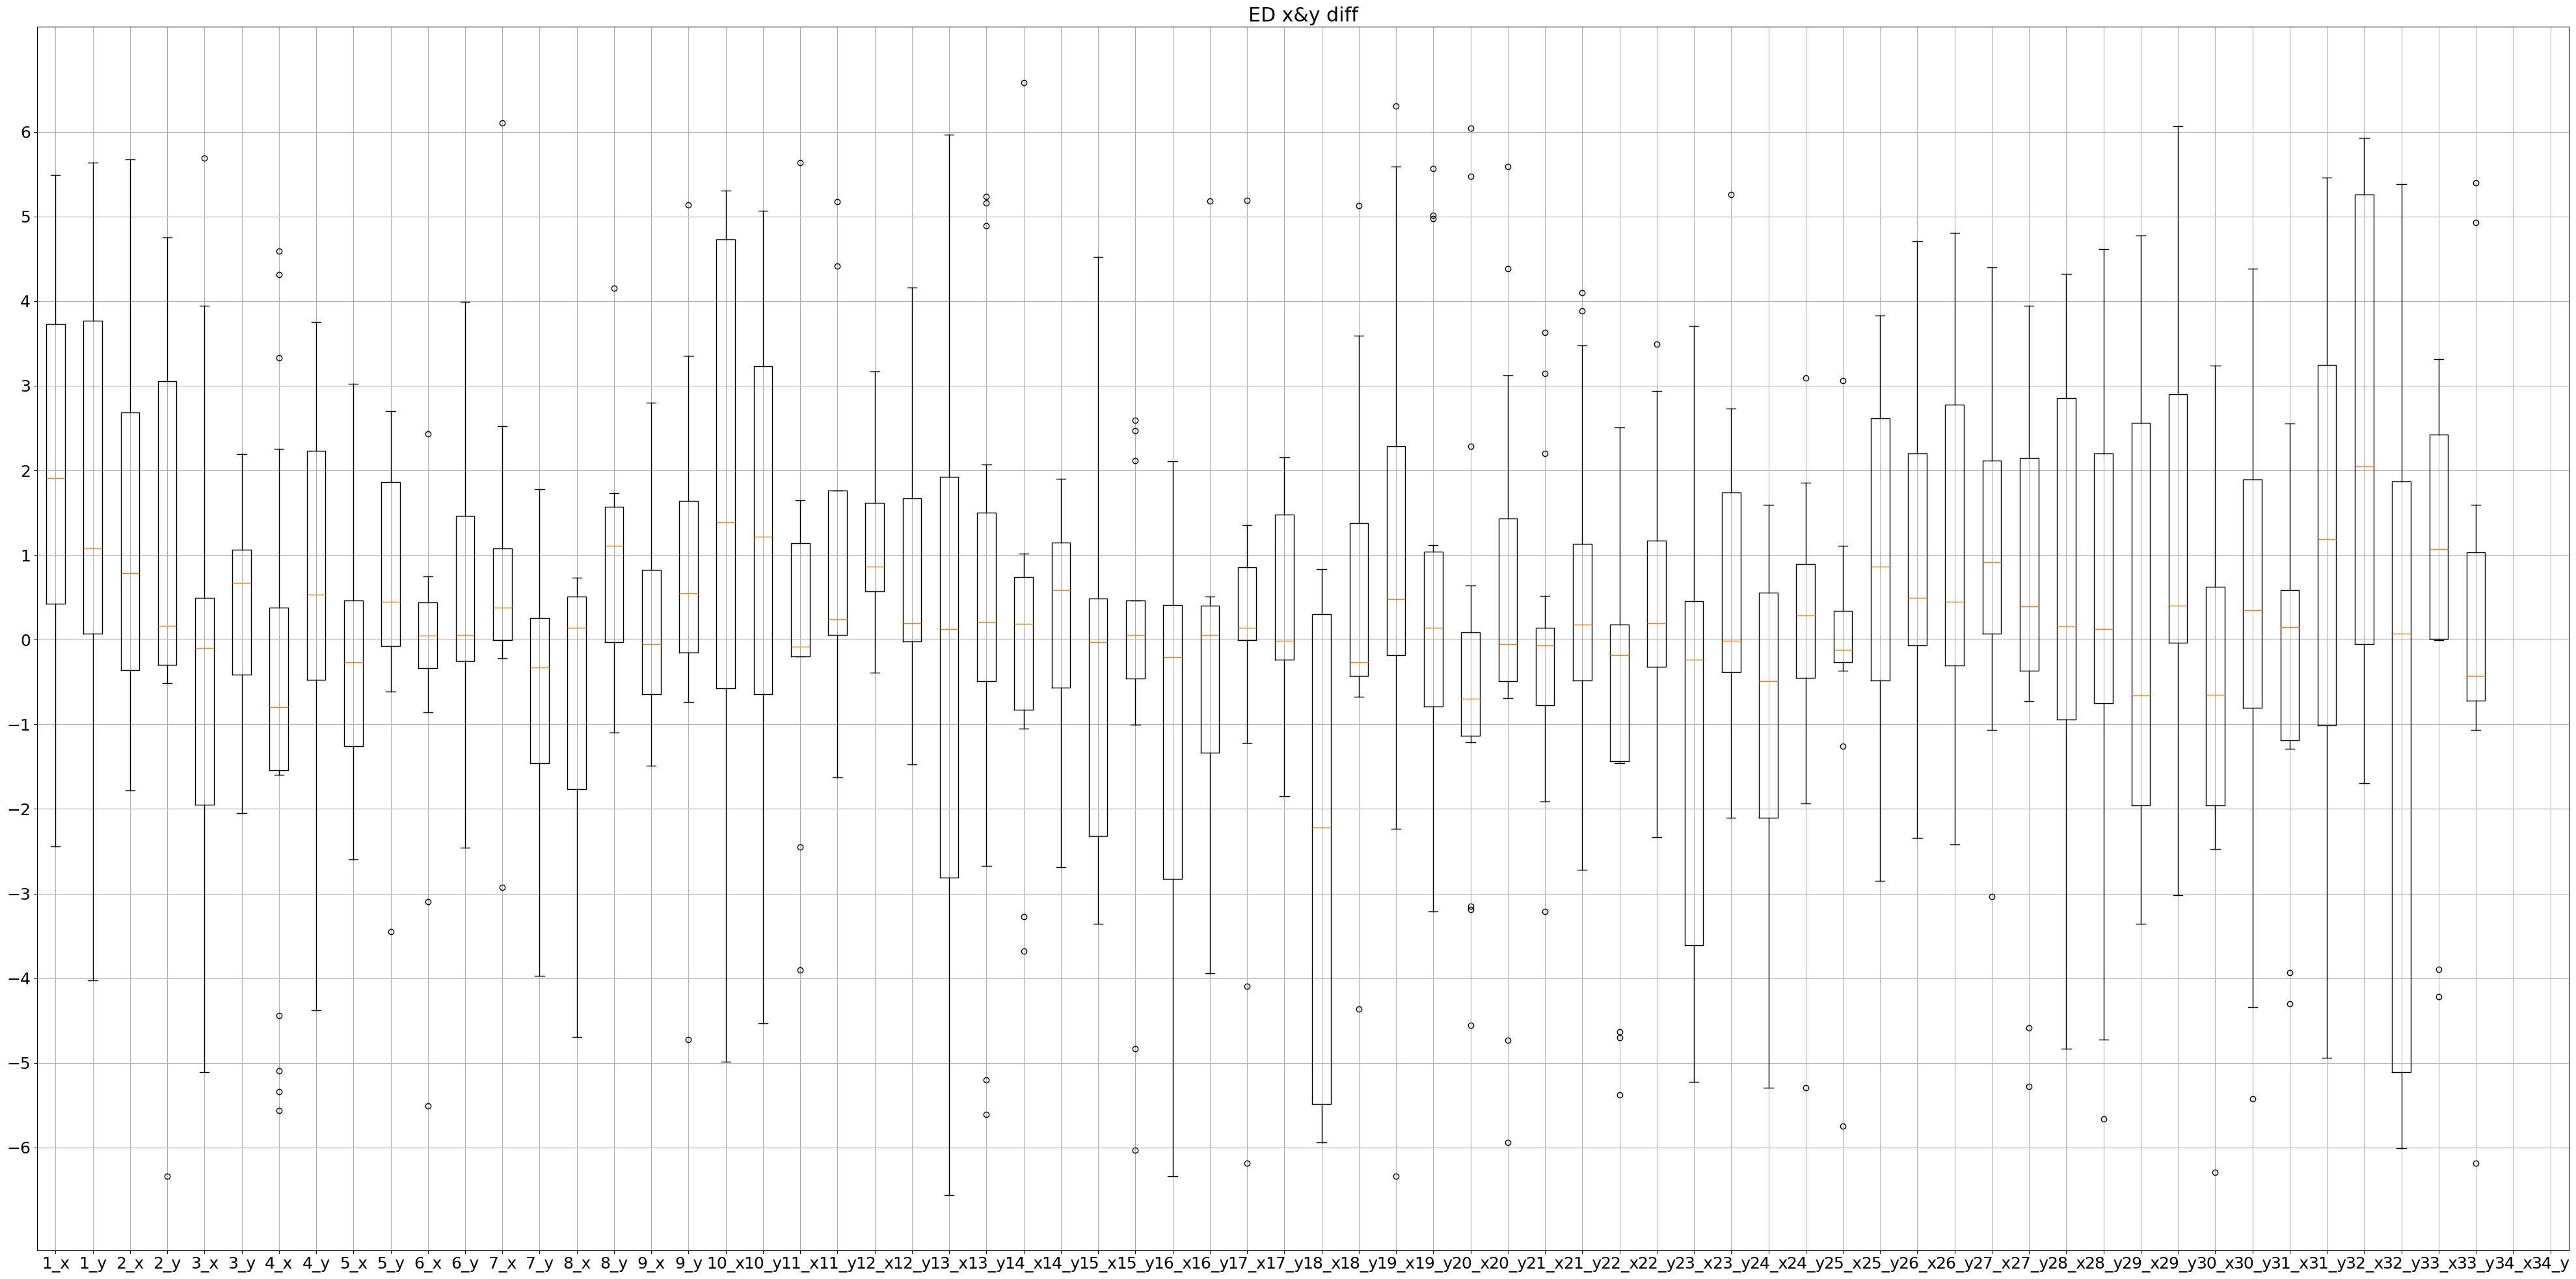

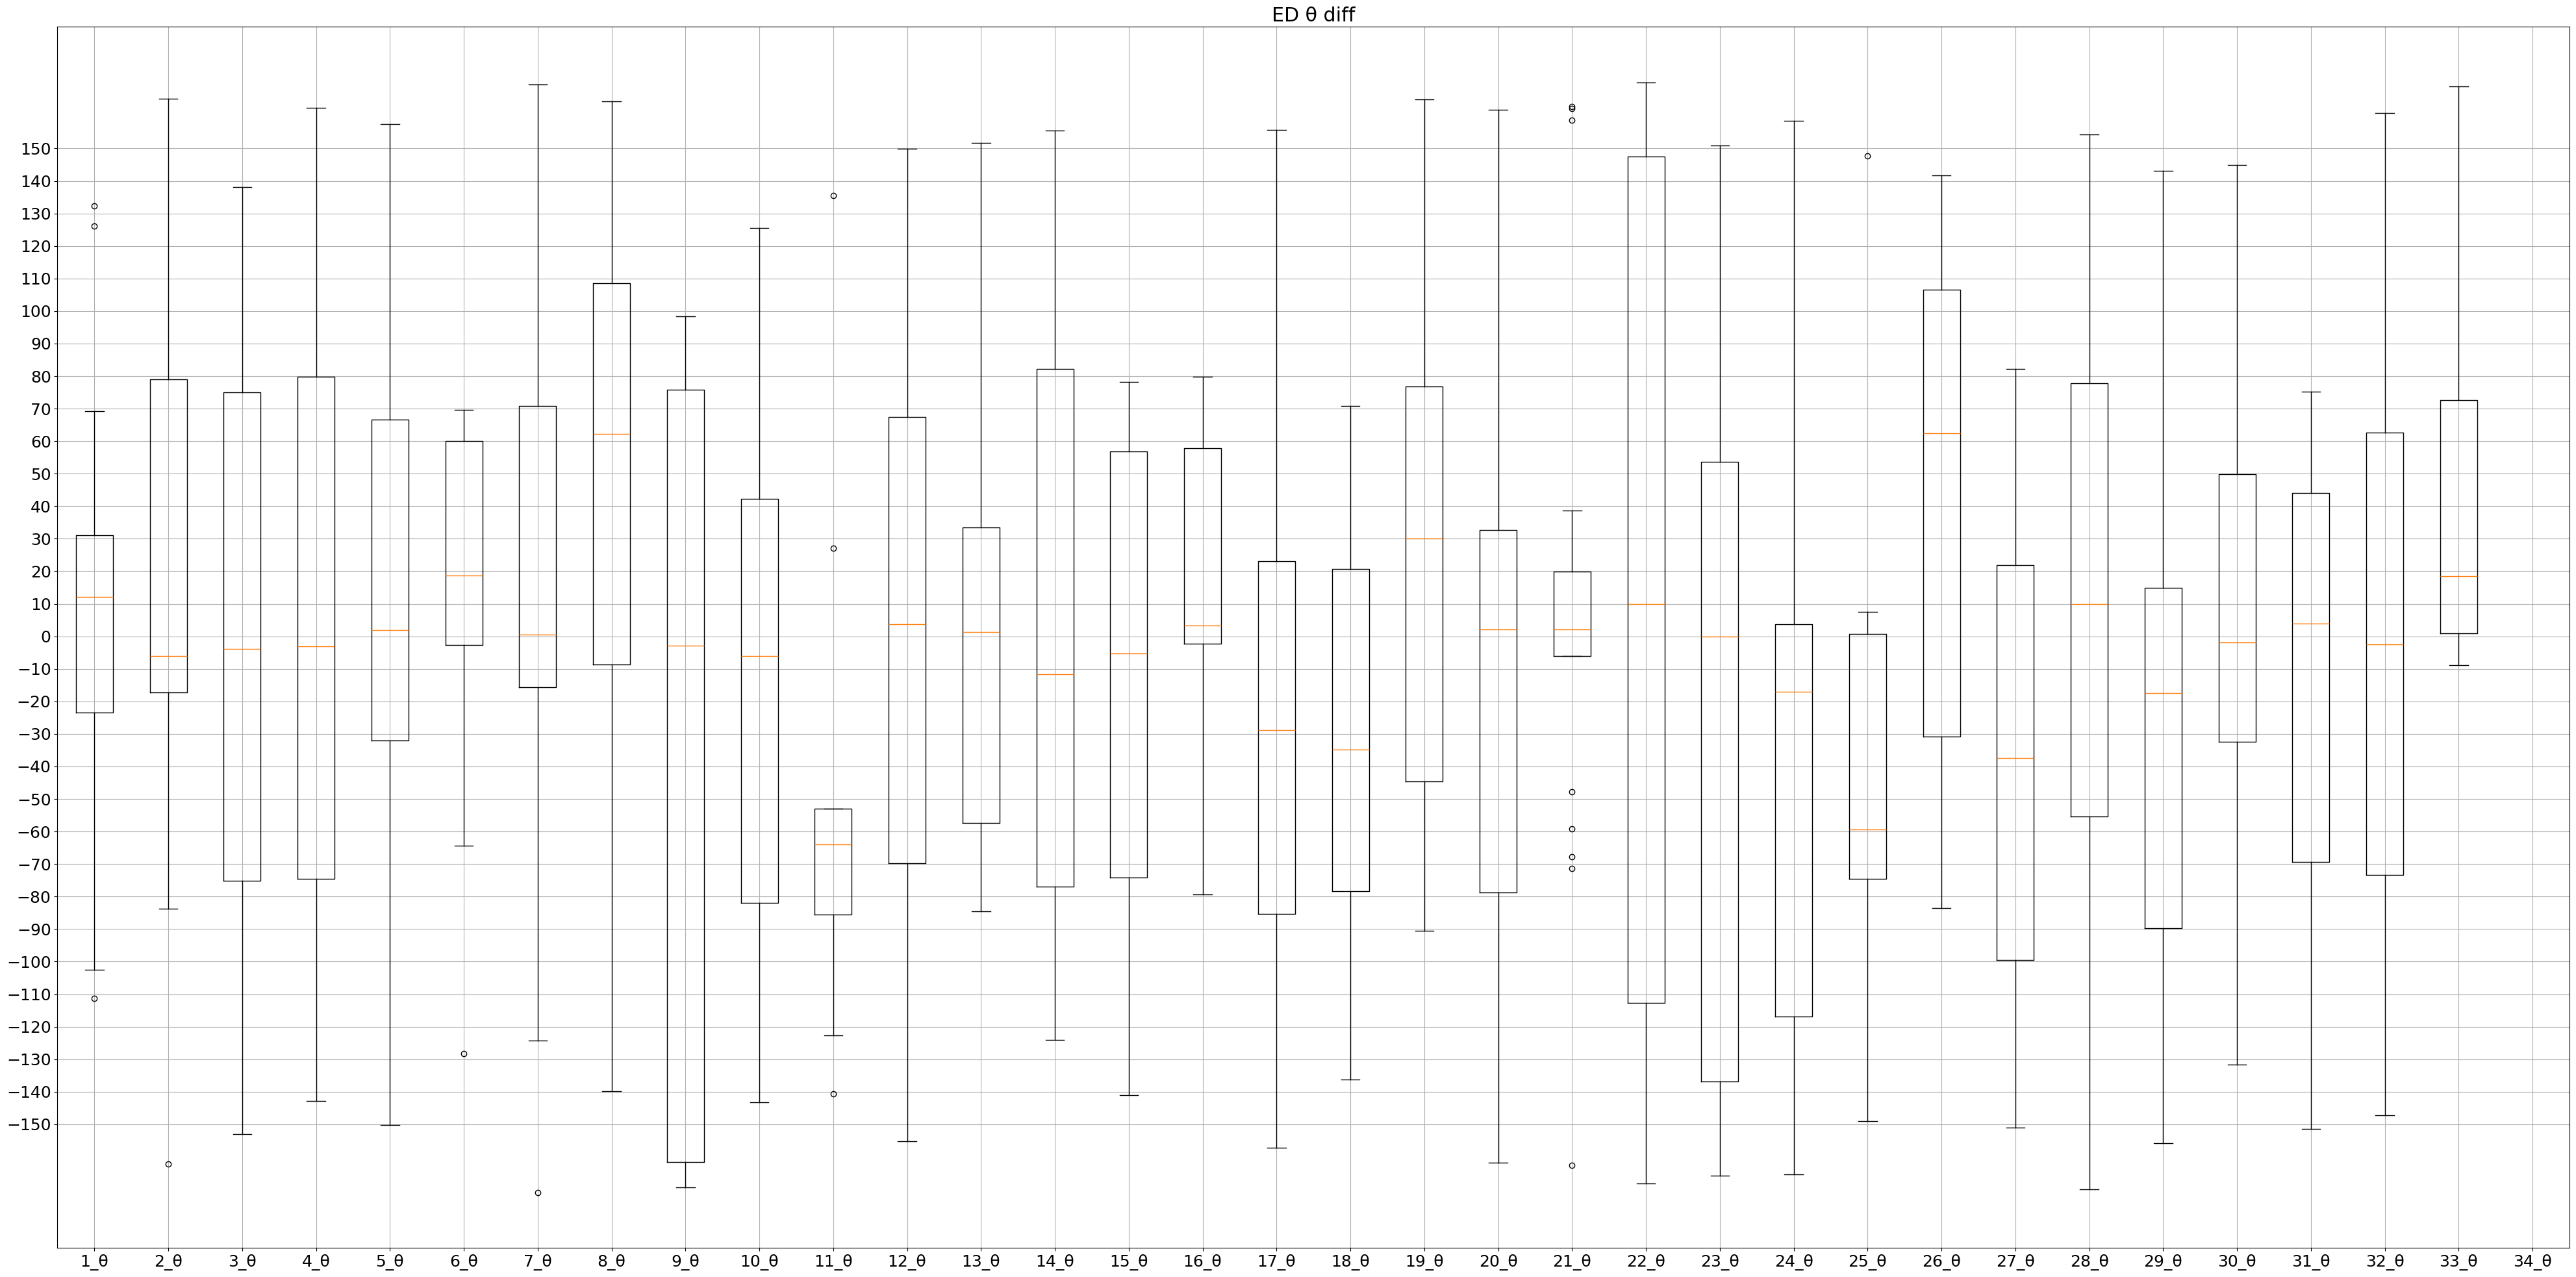

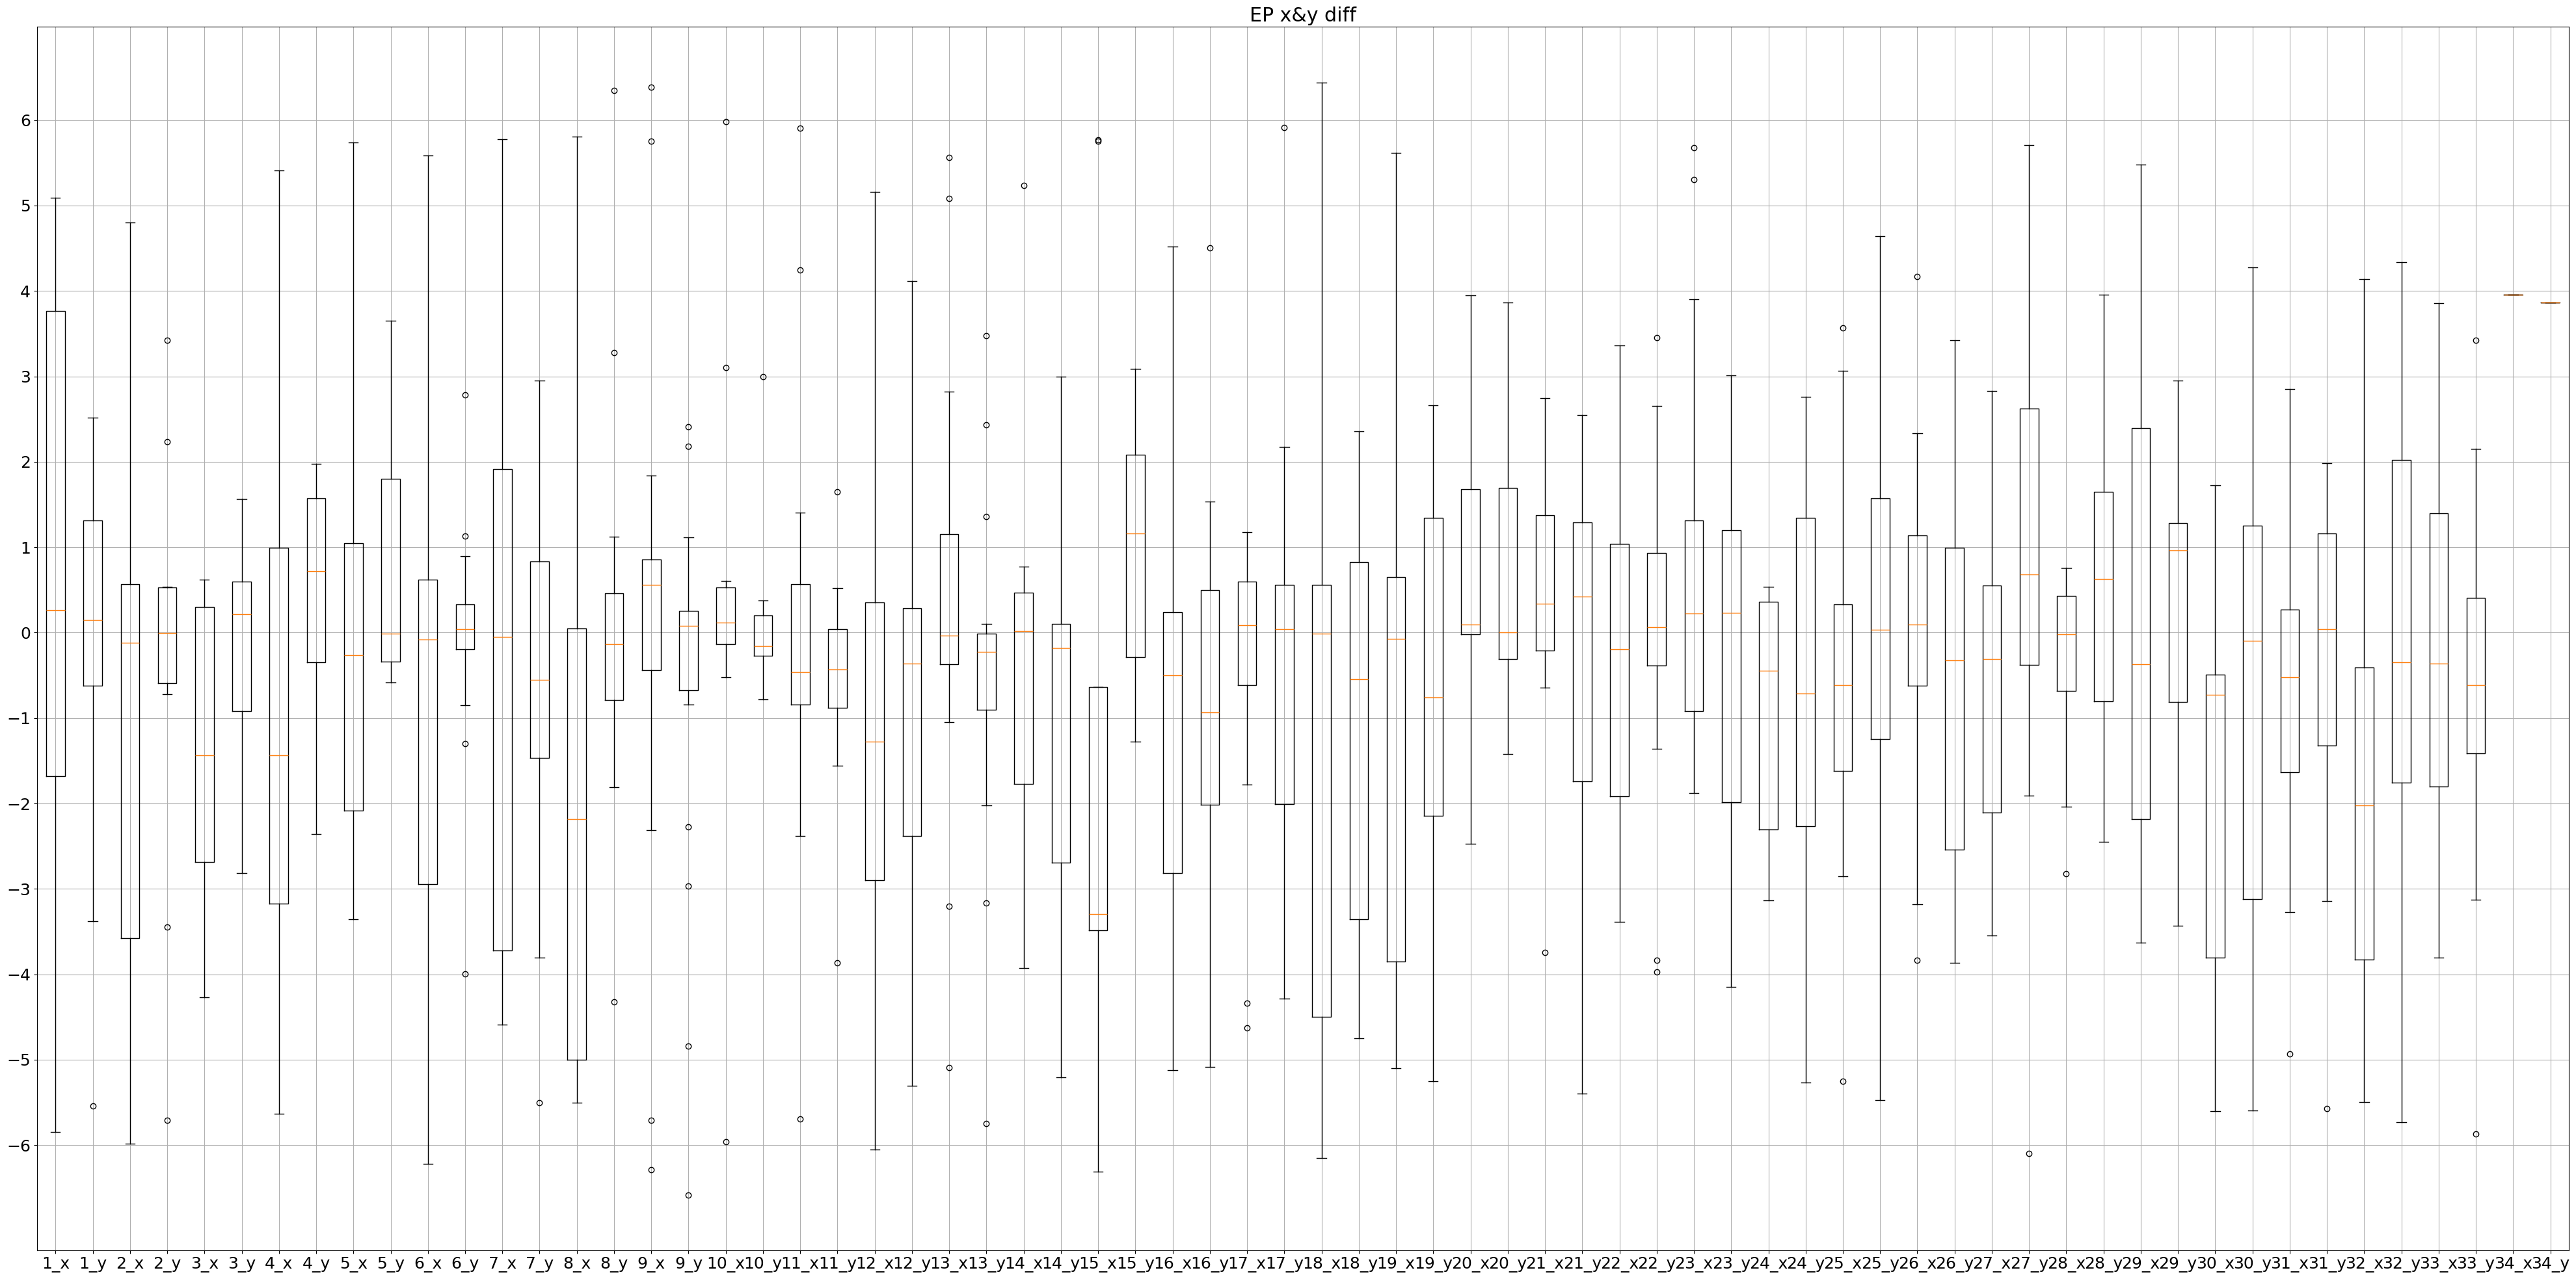

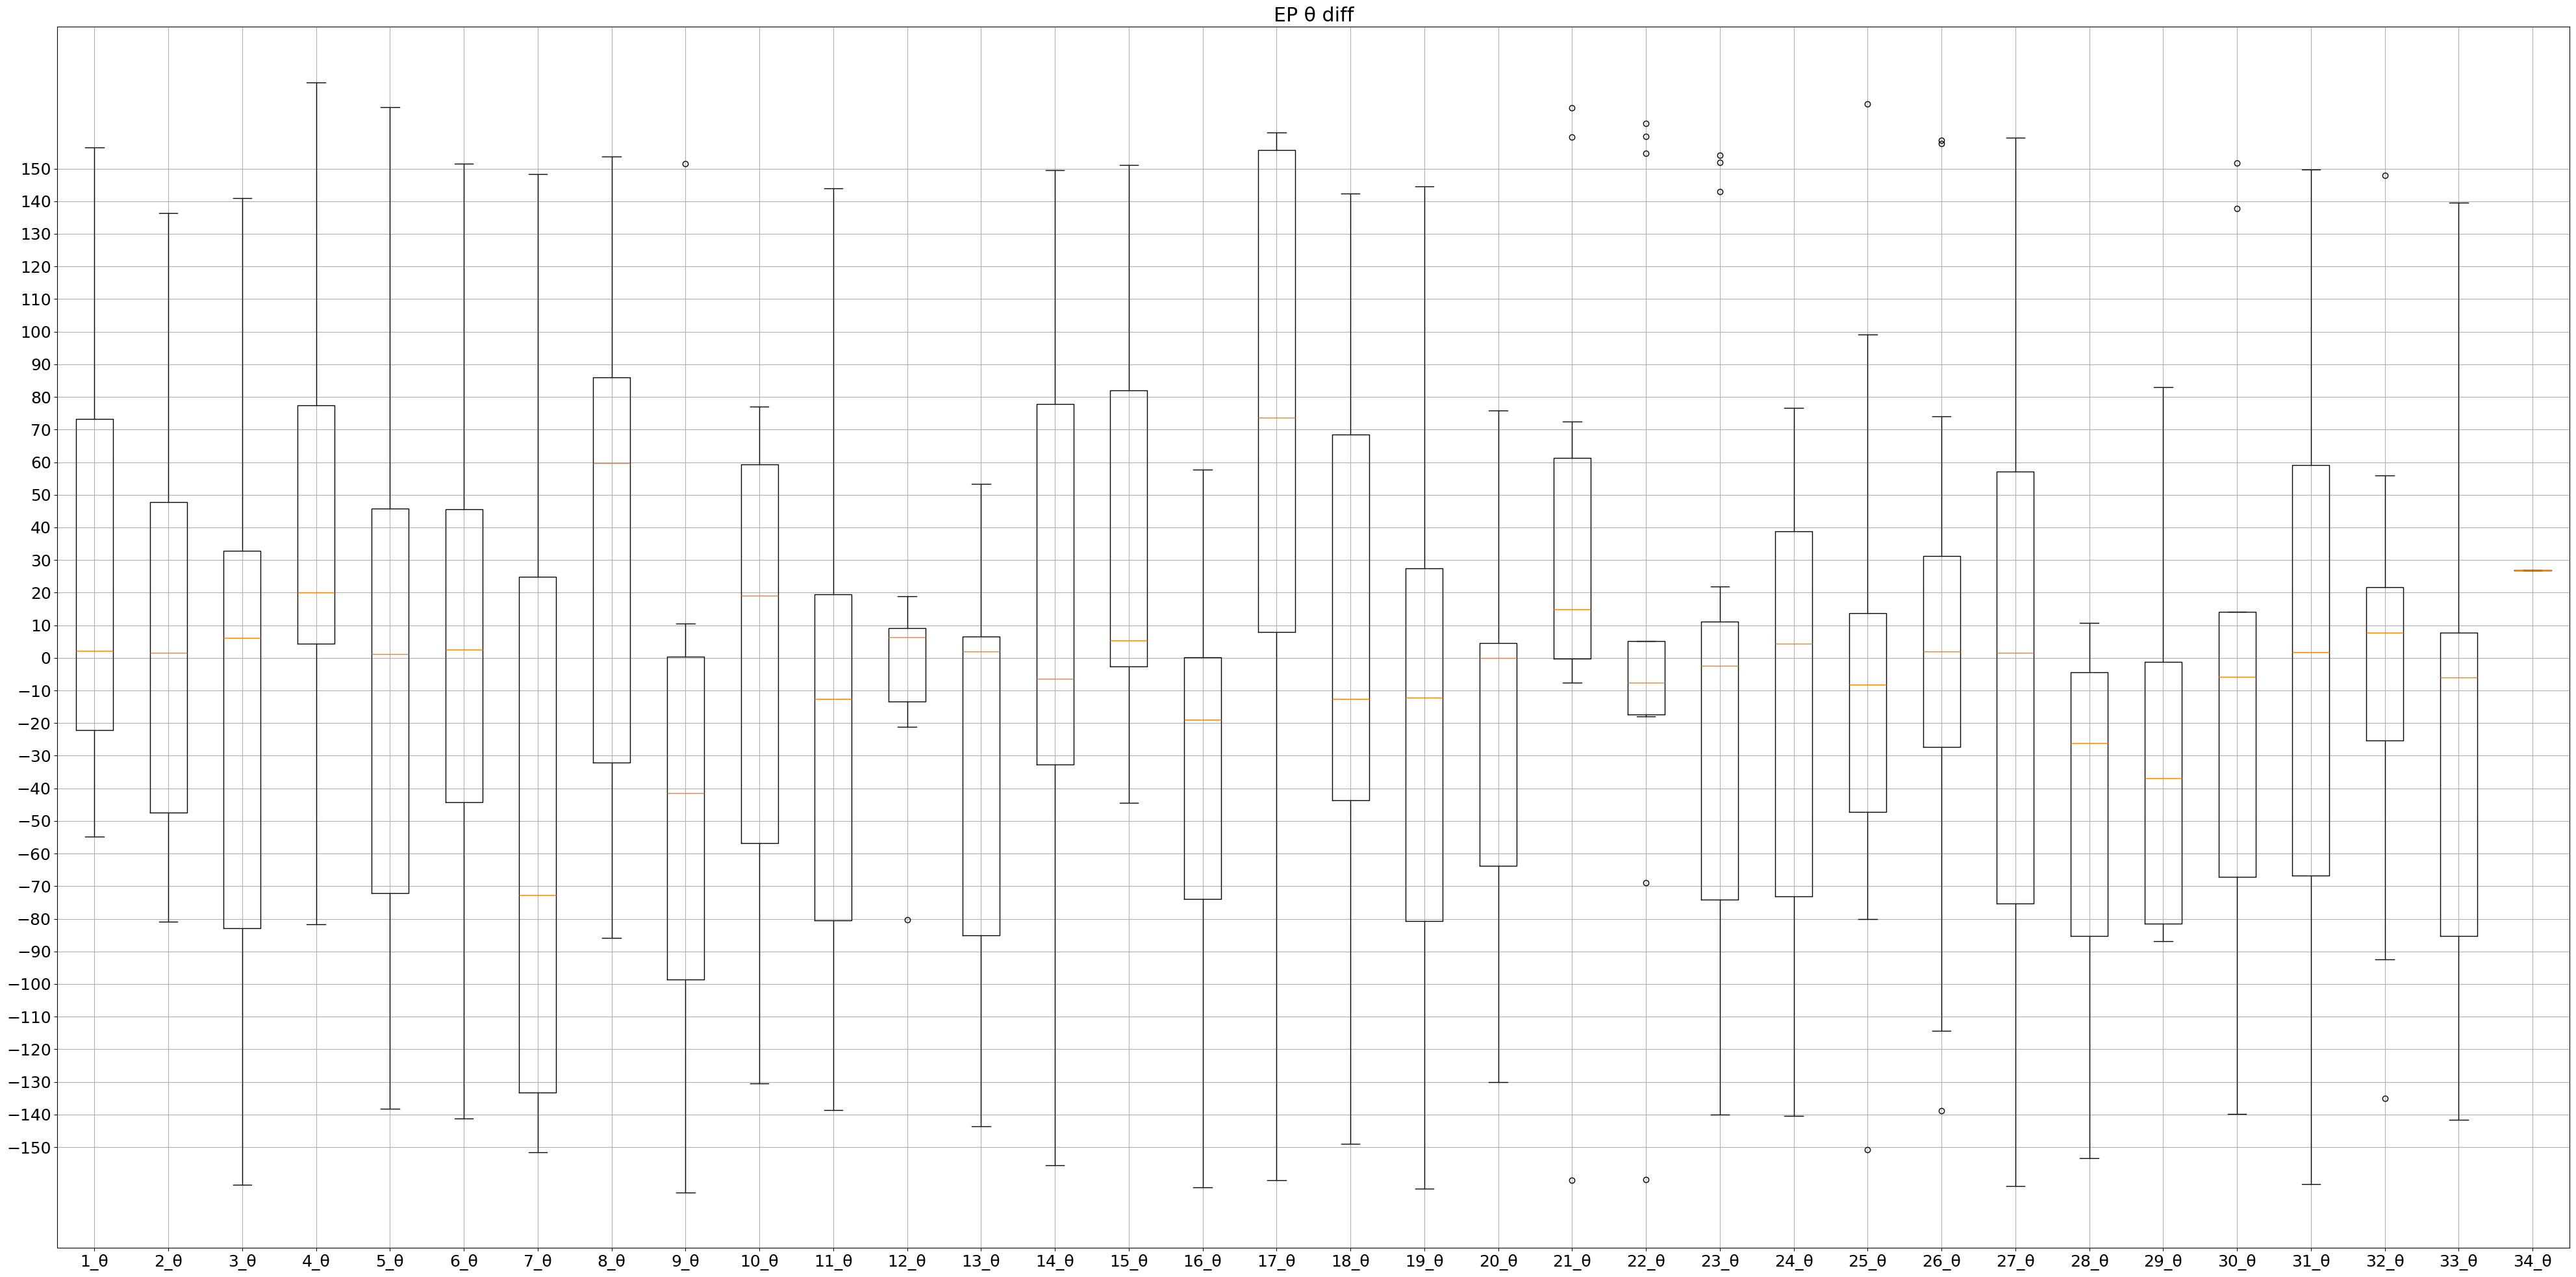

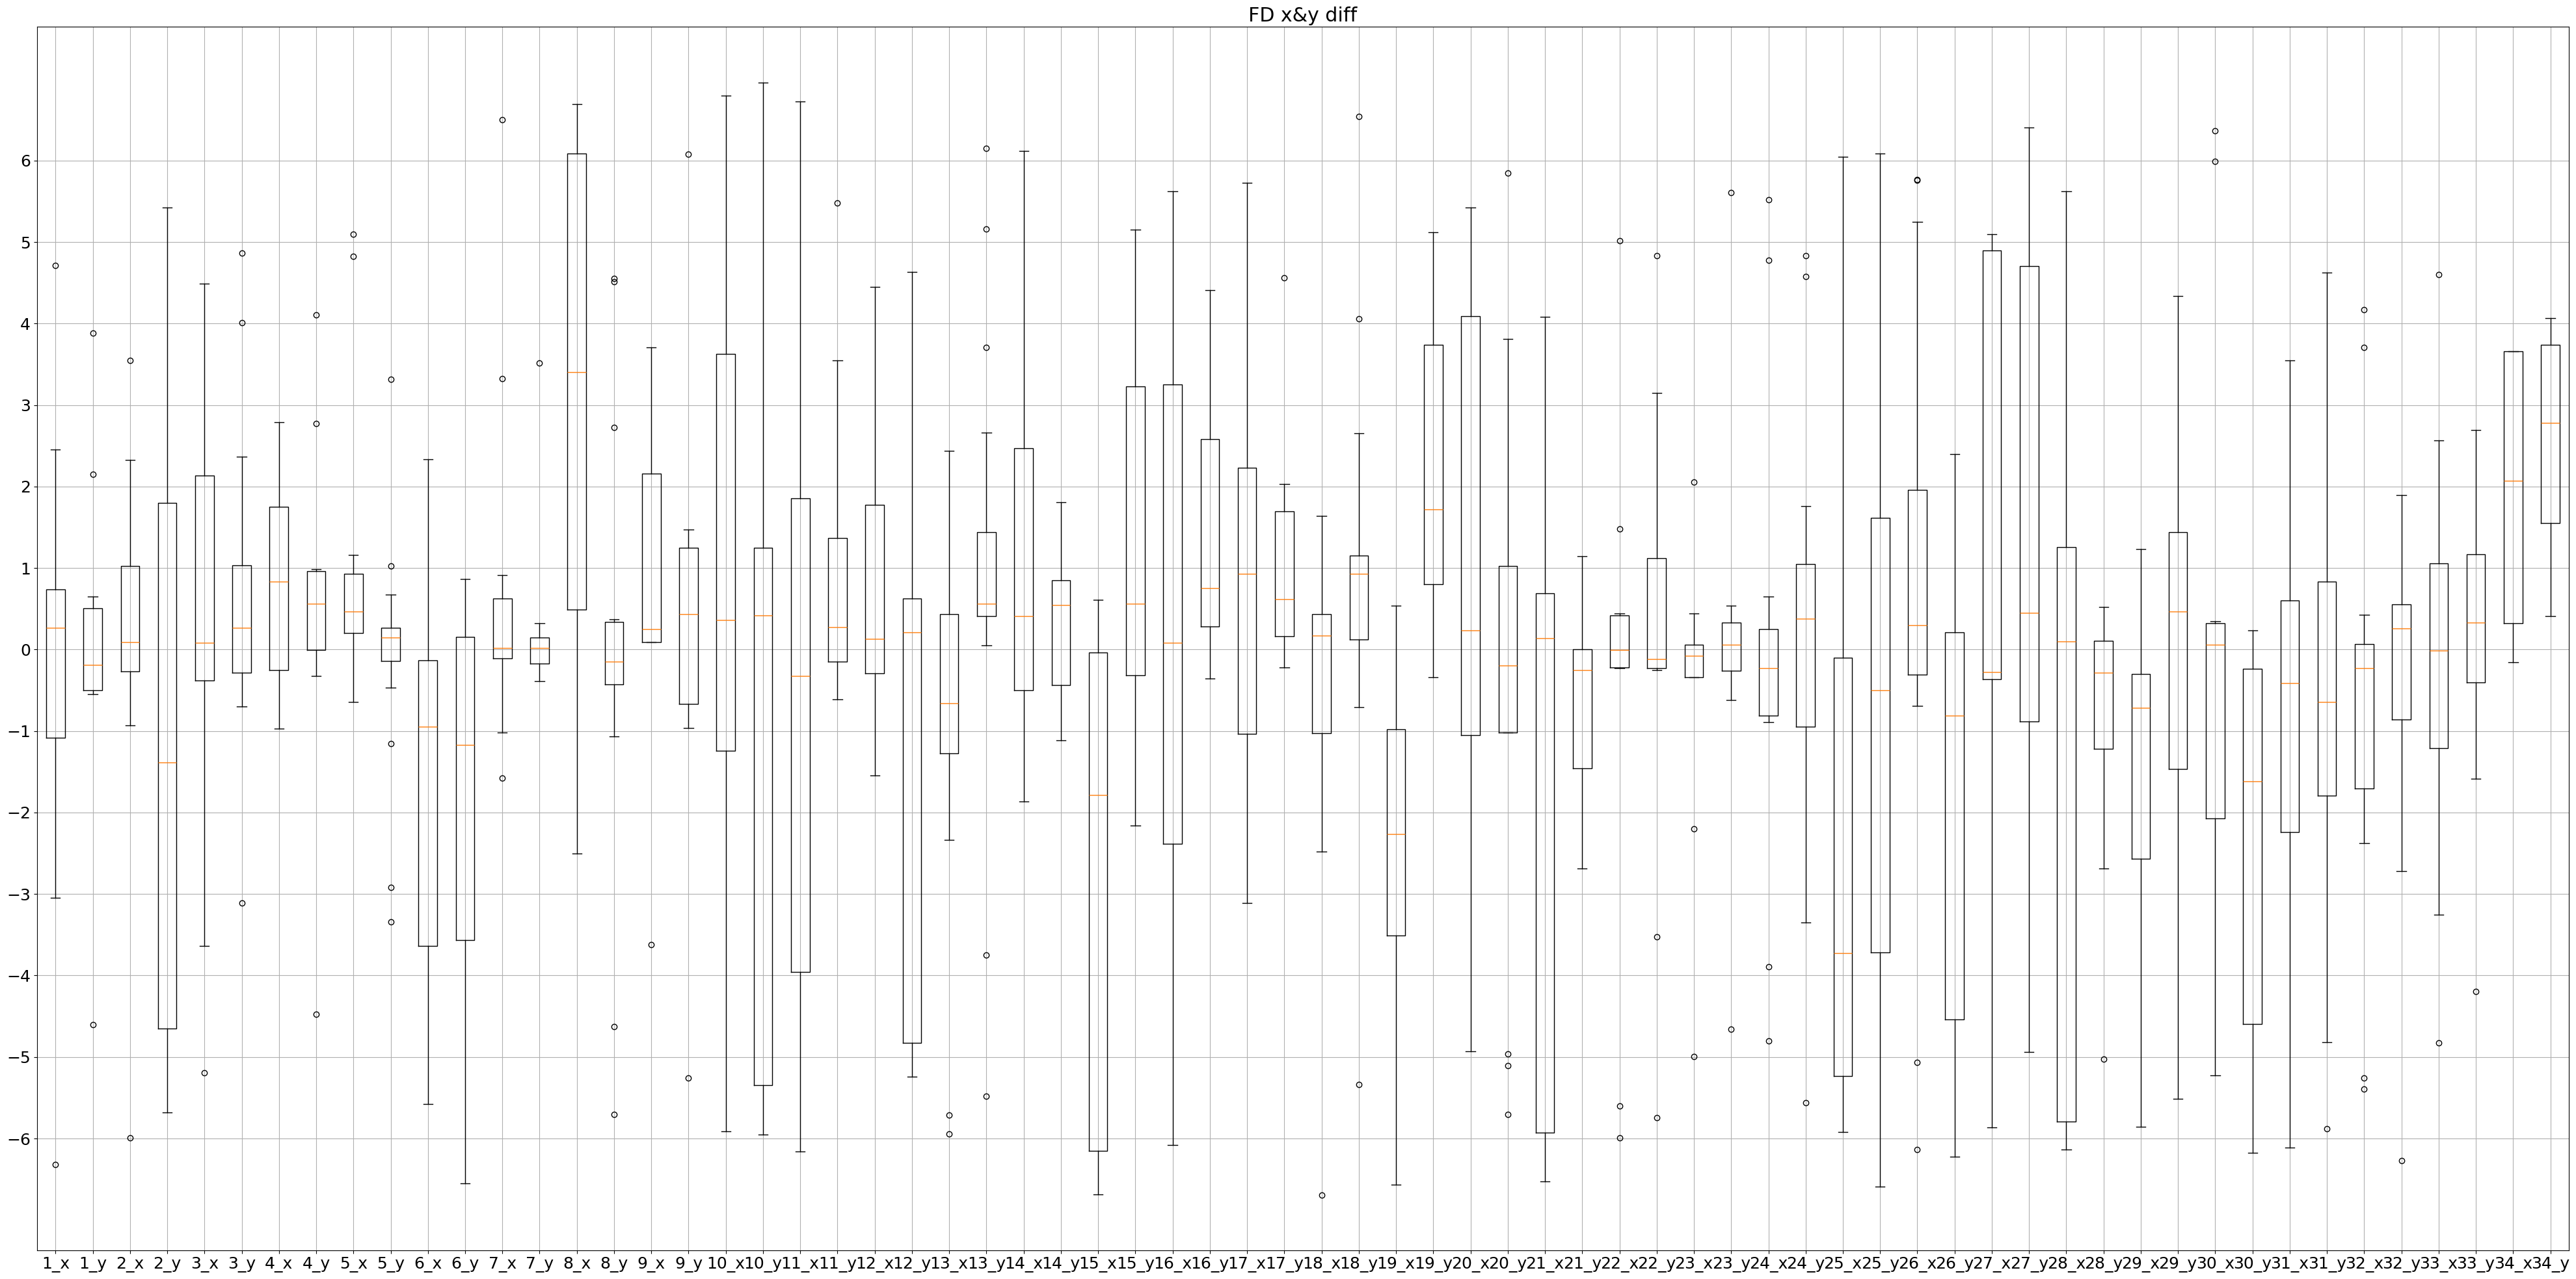

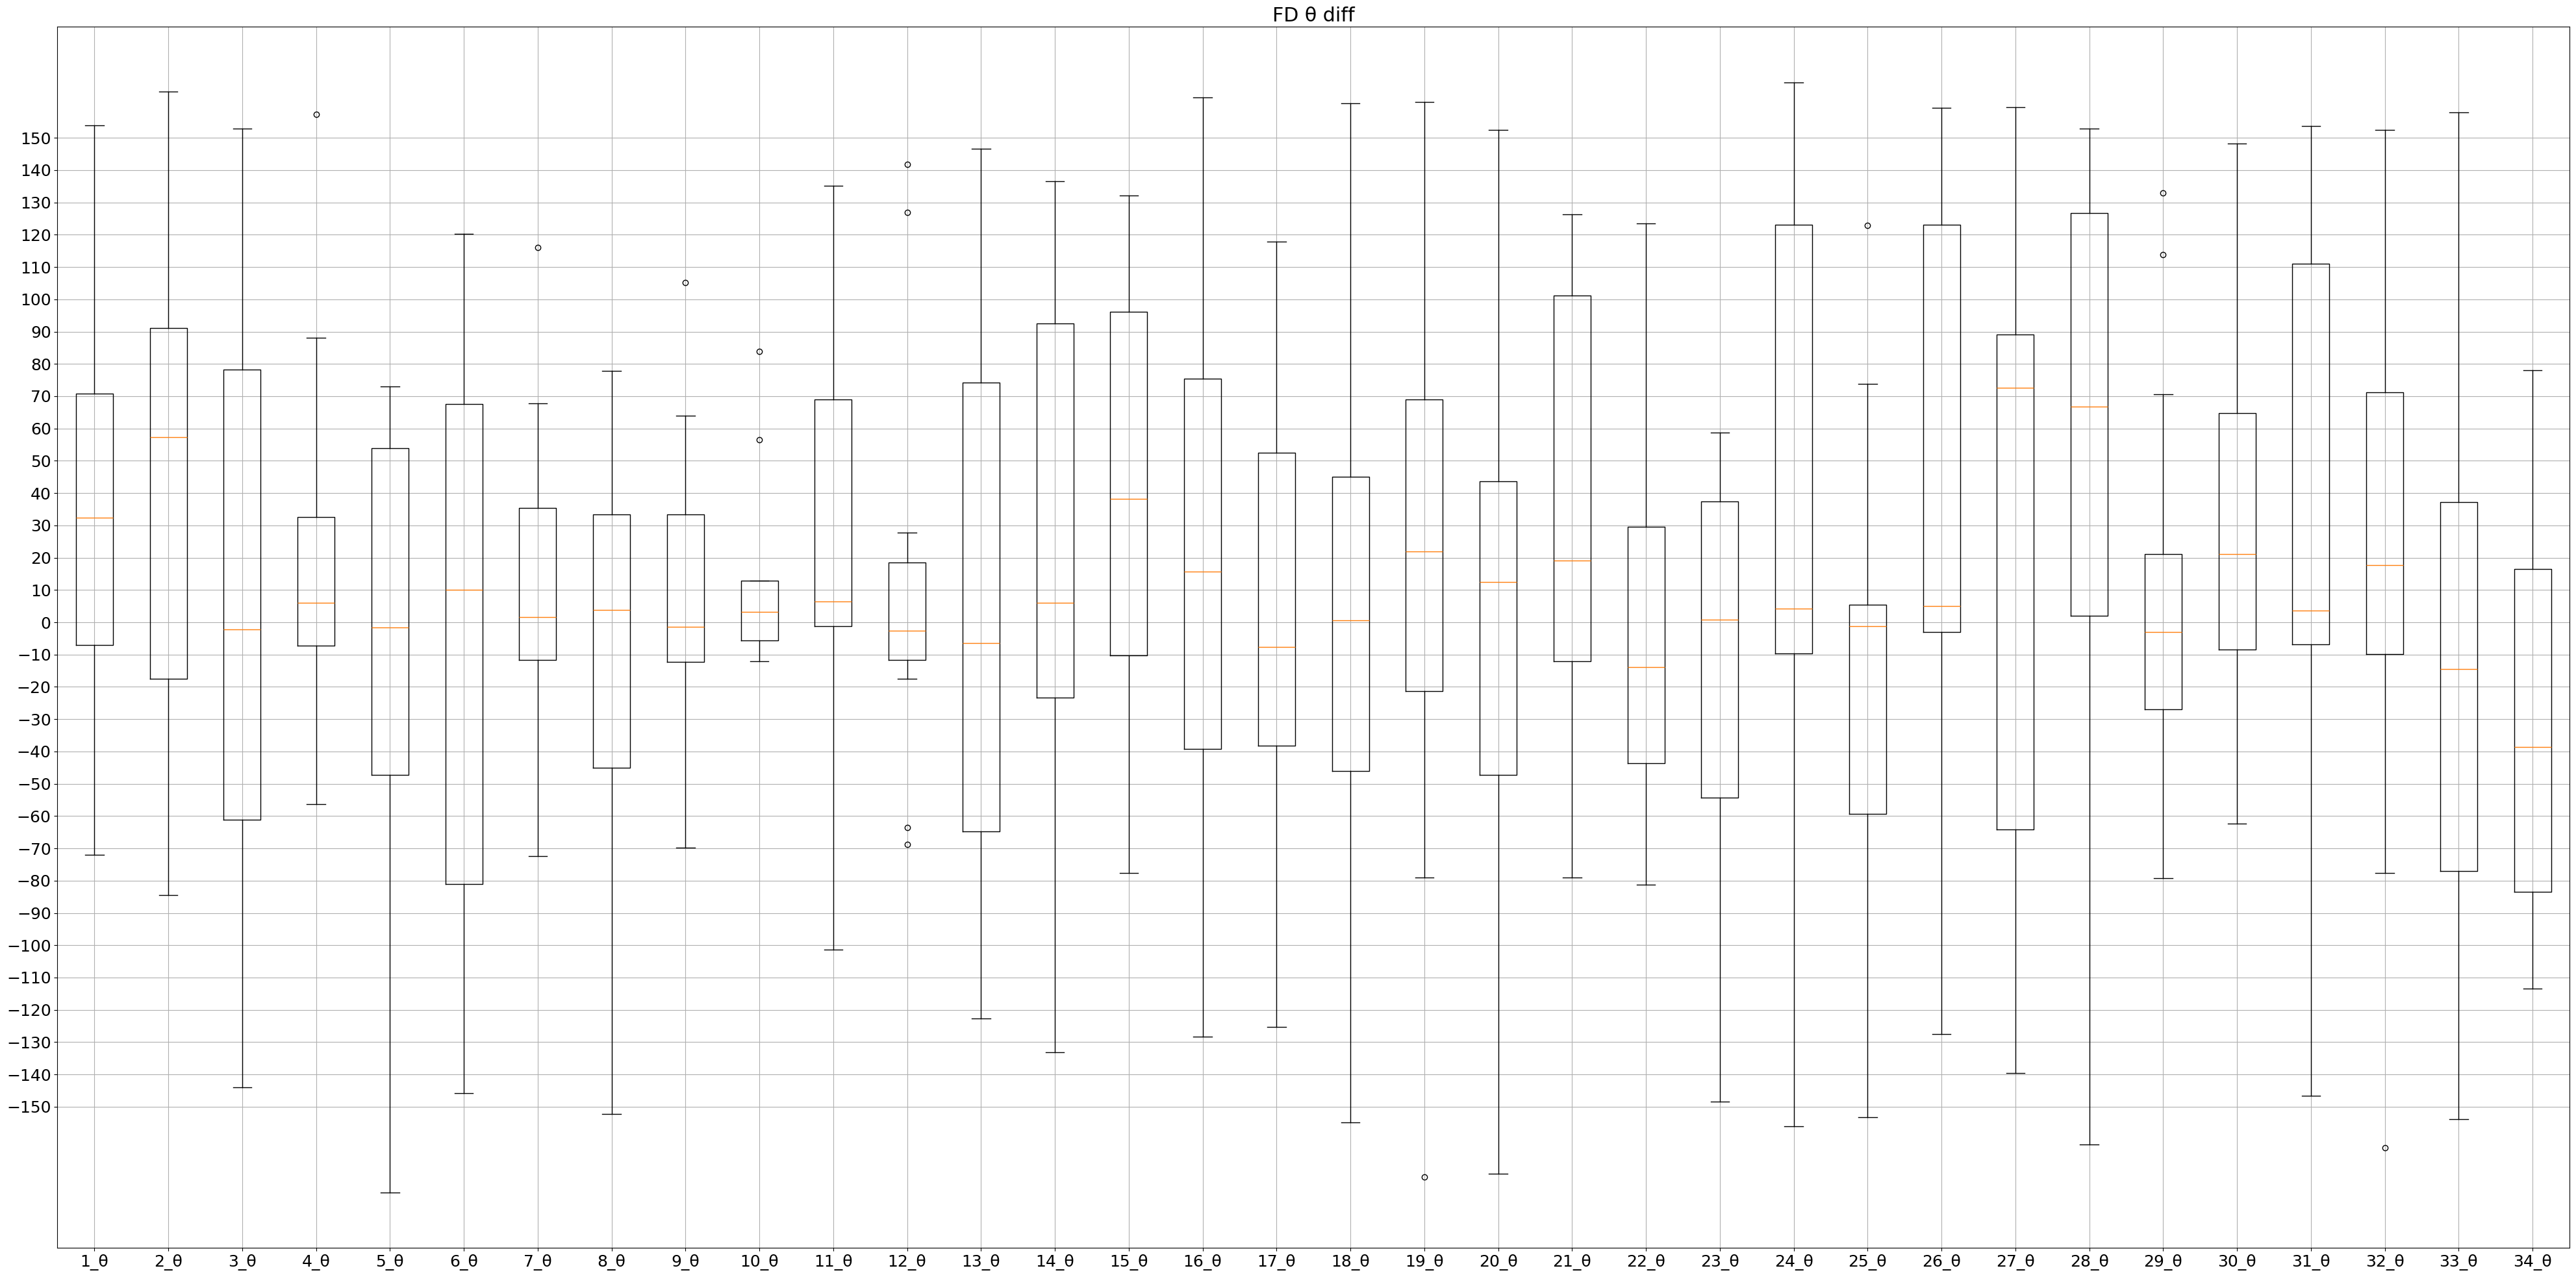

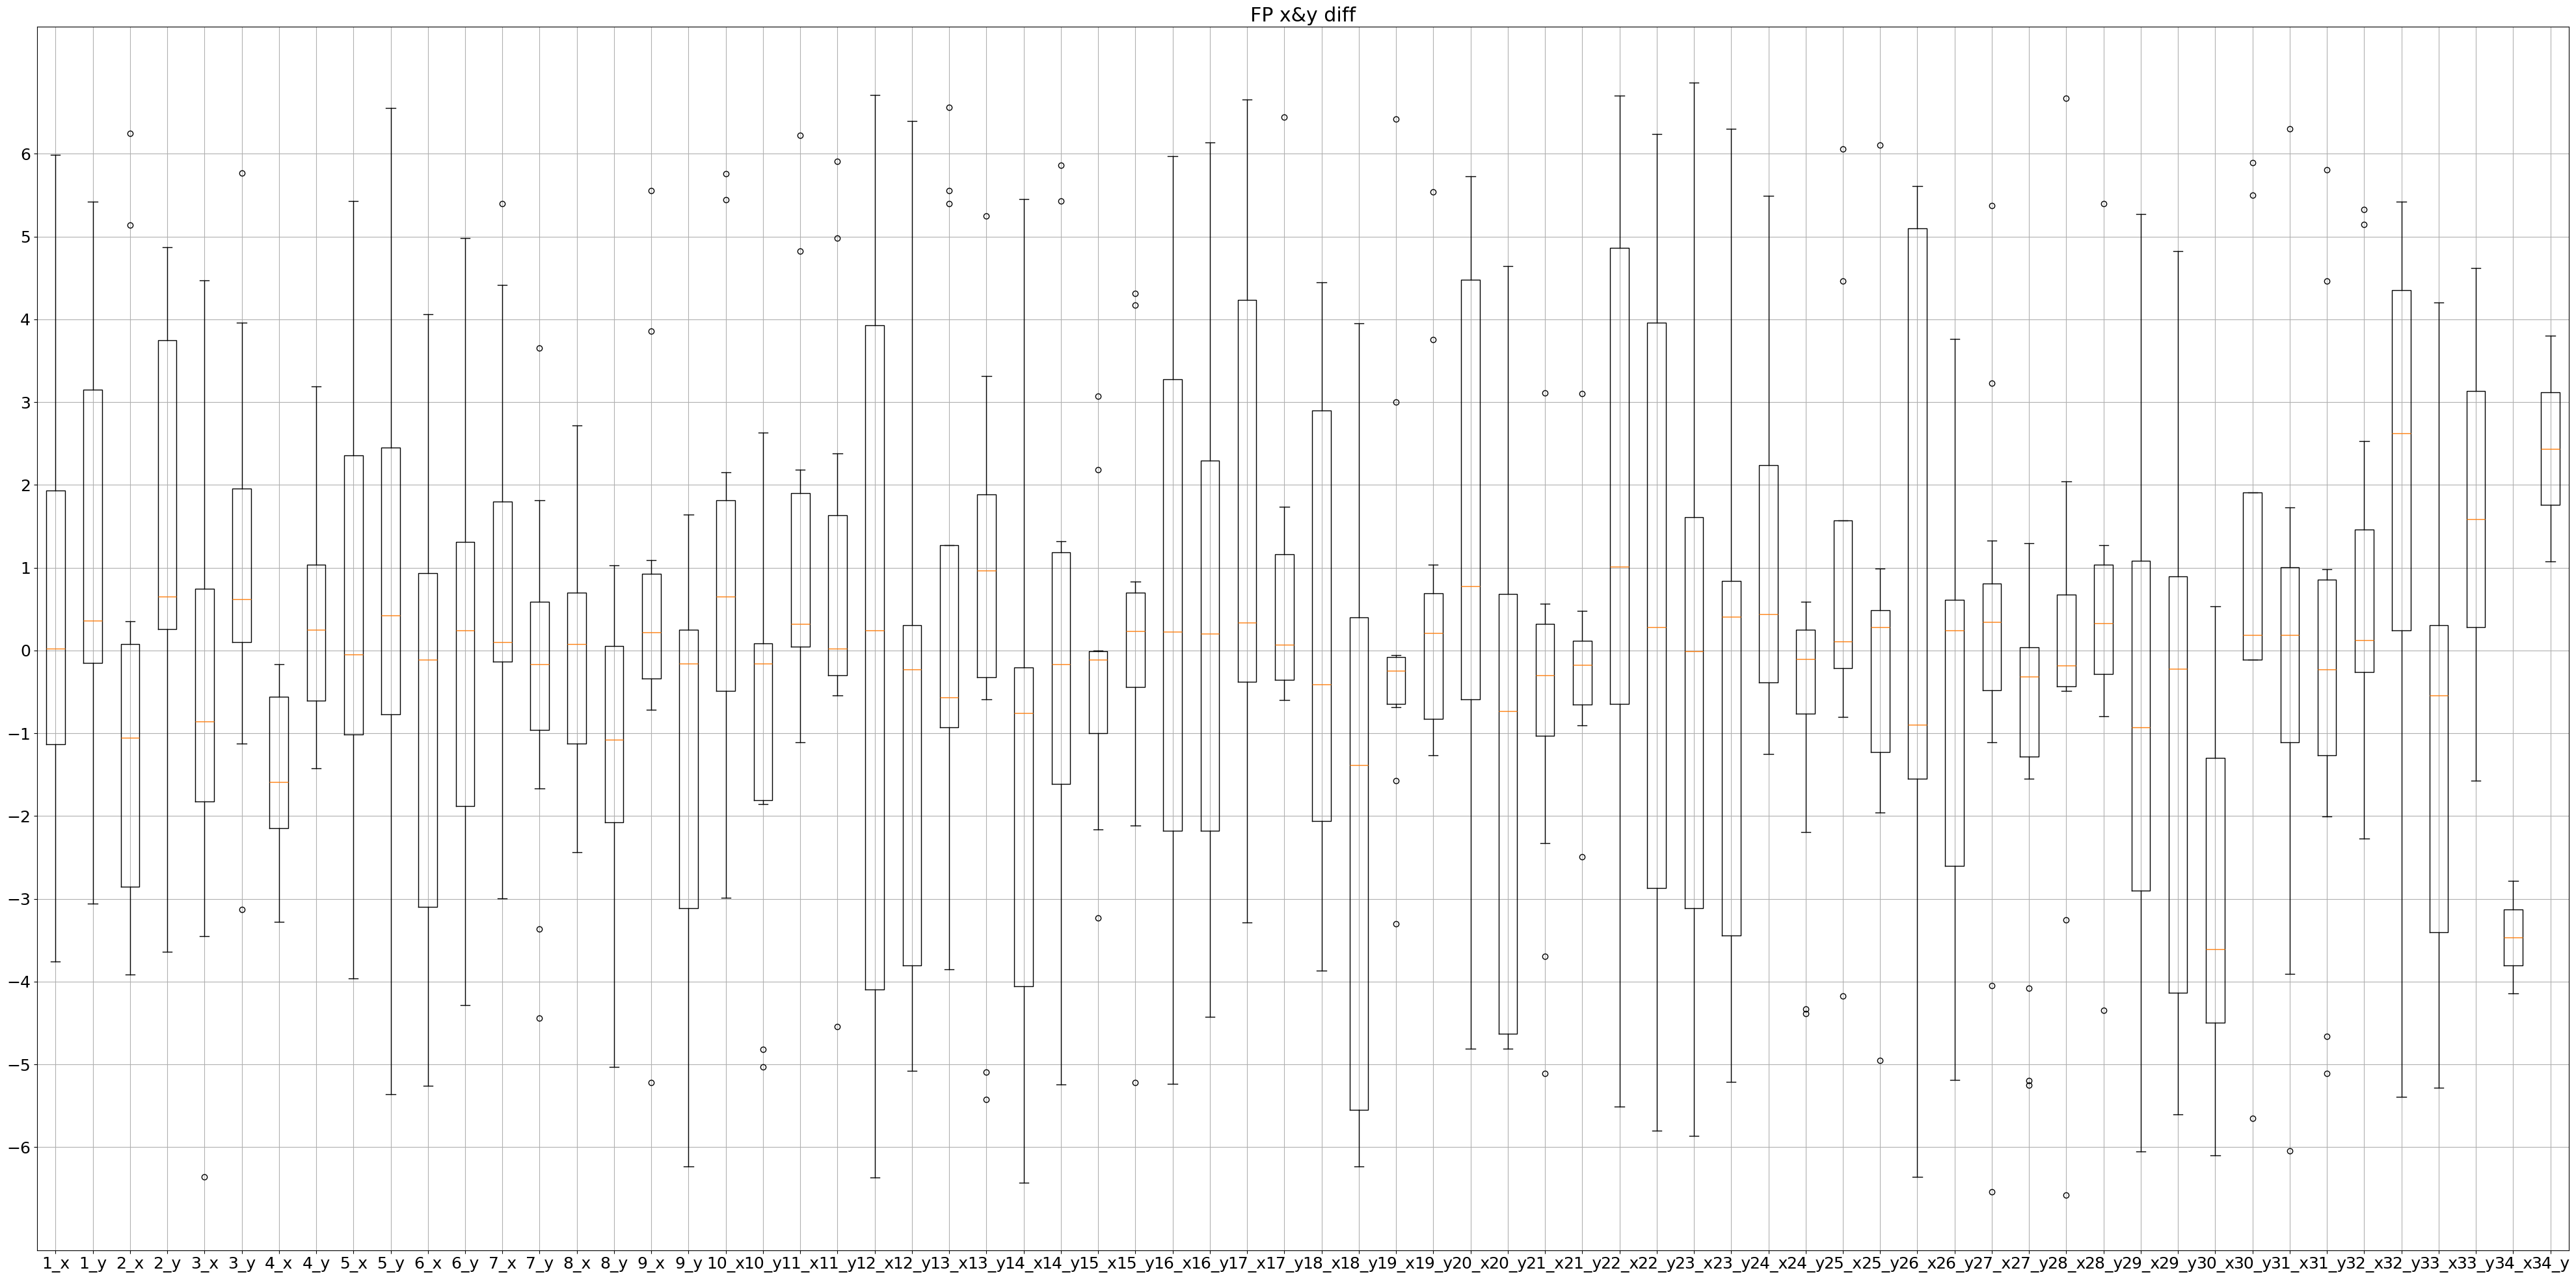

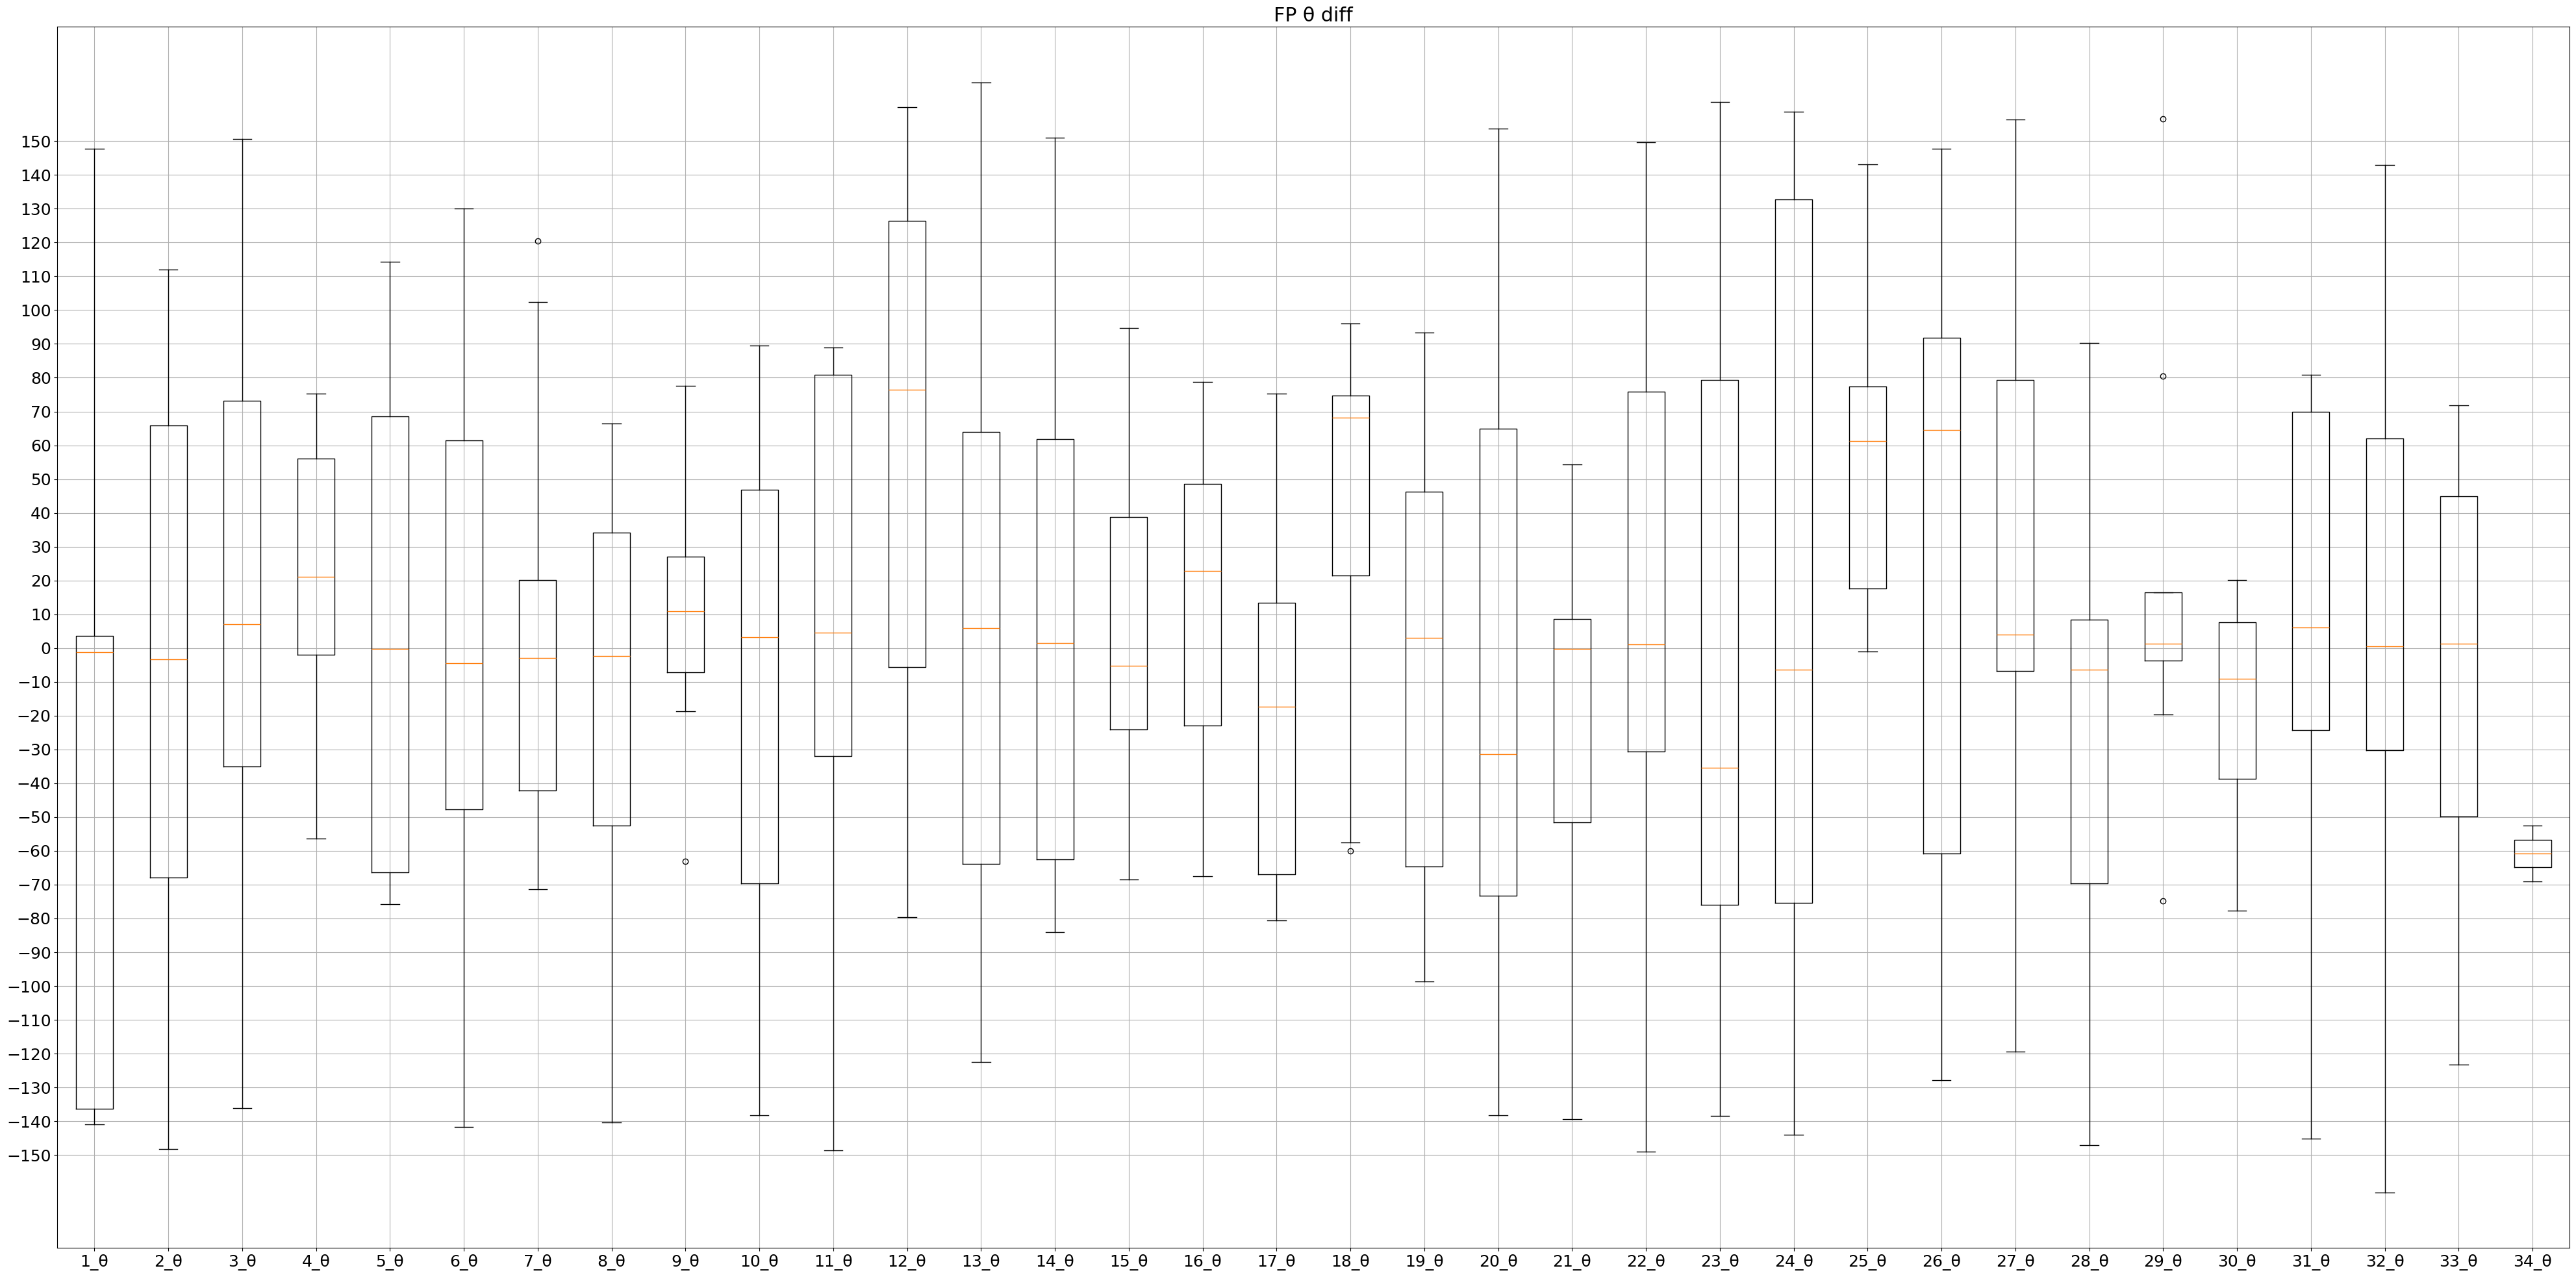

In [429]:
fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
ax.boxplot(ED_xy_list)
ax.set_xticklabels(['1_x','1_y','2_x','2_y','3_x','3_y','4_x','4_y','5_x','5_y','6_x','6_y','7_x','7_y','8_x','8_y','9_x','9_y','10_x','10_y','11_x','11_y','12_x','12_y','13_x','13_y','14_x','14_y','15_x','15_y','16_x','16_y','17_x','17_y','18_x','18_y','19_x','19_y','20_x','20_y','21_x','21_y','22_x','22_y','23_x','23_y','24_x','24_y','25_x','25_y','26_x','26_y','27_x','27_y','28_x','28_y','29_x','29_y','30_x','30_y','31_x','31_y','32_x','32_y','33_x','33_y','34_x','34_y'])
plt.title('ED x&y diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-6, 7, 1))
plt.show()

fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
bp = ax.boxplot(ED_theta_list)
ax.set_xticklabels(['1_θ','2_θ','3_θ','4_θ','5_θ','6_θ','7_θ','8_θ','9_θ','10_θ','11_θ','12_θ','13_θ','14_θ','15_θ','16_θ','17_θ','18_θ','19_θ','20_θ','21_θ','22_θ','23_θ','24_θ','25_θ','26_θ','27_θ','28_θ','29_θ','30_θ','31_θ','32_θ','33_θ','34_θ'])
plt.title('ED θ diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-150, 151, 10))
plt.show()

fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
bp = ax.boxplot(EP_xy_list)
ax.set_xticklabels(['1_x','1_y','2_x','2_y','3_x','3_y','4_x','4_y','5_x','5_y','6_x','6_y','7_x','7_y','8_x','8_y','9_x','9_y','10_x','10_y','11_x','11_y','12_x','12_y','13_x','13_y','14_x','14_y','15_x','15_y','16_x','16_y','17_x','17_y','18_x','18_y','19_x','19_y','20_x','20_y','21_x','21_y','22_x','22_y','23_x','23_y','24_x','24_y','25_x','25_y','26_x','26_y','27_x','27_y','28_x','28_y','29_x','29_y','30_x','30_y','31_x','31_y','32_x','32_y','33_x','33_y','34_x','34_y'])
plt.title('EP x&y diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-6, 7, 1))
plt.show()

fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
bp = ax.boxplot(EP_theta_list)
ax.set_xticklabels(['1_θ','2_θ','3_θ','4_θ','5_θ','6_θ','7_θ','8_θ','9_θ','10_θ','11_θ','12_θ','13_θ','14_θ','15_θ','16_θ','17_θ','18_θ','19_θ','20_θ','21_θ','22_θ','23_θ','24_θ','25_θ','26_θ','27_θ','28_θ','29_θ','30_θ','31_θ','32_θ','33_θ','34_θ'])
plt.title('EP θ diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-150, 151, 10))
plt.show()

fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
bp = ax.boxplot(FD_xy_list)
ax.set_xticklabels(['1_x','1_y','2_x','2_y','3_x','3_y','4_x','4_y','5_x','5_y','6_x','6_y','7_x','7_y','8_x','8_y','9_x','9_y','10_x','10_y','11_x','11_y','12_x','12_y','13_x','13_y','14_x','14_y','15_x','15_y','16_x','16_y','17_x','17_y','18_x','18_y','19_x','19_y','20_x','20_y','21_x','21_y','22_x','22_y','23_x','23_y','24_x','24_y','25_x','25_y','26_x','26_y','27_x','27_y','28_x','28_y','29_x','29_y','30_x','30_y','31_x','31_y','32_x','32_y','33_x','33_y','34_x','34_y'])
plt.title('FD x&y diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-6, 7, 1))
plt.show()

fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
bp = ax.boxplot(FD_theta_list)
ax.set_xticklabels(['1_θ','2_θ','3_θ','4_θ','5_θ','6_θ','7_θ','8_θ','9_θ','10_θ','11_θ','12_θ','13_θ','14_θ','15_θ','16_θ','17_θ','18_θ','19_θ','20_θ','21_θ','22_θ','23_θ','24_θ','25_θ','26_θ','27_θ','28_θ','29_θ','30_θ','31_θ','32_θ','33_θ','34_θ'])
plt.title('FD θ diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-150, 151, 10))
plt.show()

fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
bp = ax.boxplot(FP_xy_list)
ax.set_xticklabels(['1_x','1_y','2_x','2_y','3_x','3_y','4_x','4_y','5_x','5_y','6_x','6_y','7_x','7_y','8_x','8_y','9_x','9_y','10_x','10_y','11_x','11_y','12_x','12_y','13_x','13_y','14_x','14_y','15_x','15_y','16_x','16_y','17_x','17_y','18_x','18_y','19_x','19_y','20_x','20_y','21_x','21_y','22_x','22_y','23_x','23_y','24_x','24_y','25_x','25_y','26_x','26_y','27_x','27_y','28_x','28_y','29_x','29_y','30_x','30_y','31_x','31_y','32_x','32_y','33_x','33_y','34_x','34_y'])
plt.title('FP x&y diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-6, 7, 1))
plt.show()

fig, ax = plt.subplots(figsize=(40,20), tight_layout=True)
bp = ax.boxplot(FP_theta_list)
ax.set_xticklabels(['1_θ','2_θ','3_θ','4_θ','5_θ','6_θ','7_θ','8_θ','9_θ','10_θ','11_θ','12_θ','13_θ','14_θ','15_θ','16_θ','17_θ','18_θ','19_θ','20_θ','21_θ','22_θ','23_θ','24_θ','25_θ','26_θ','27_θ','28_θ','29_θ','30_θ','31_θ','32_θ','33_θ','34_θ'])
plt.title('FP θ diff')
plt.rcParams['font.size'] = 18
plt.grid()
plt.yticks(range(-150, 151, 10))
plt.show()

In [430]:
x_EP_gesture

{1: [3.9834823697861856,
  0.7655725323054208,
  3.10617847342346,
  4.05349287187996,
  0.02115415804537779,
  4.334289507071547,
  -2.0264028596544827,
  0.4968693264360893,
  -5.847779801428611,
  -3.4256882912377815,
  5.088462625187774,
  -2.815297700907411,
  -0.6464783735621789,
  -0.1856303651496478],
 2: [-4.383692196949831,
  4.804497197418508,
  0.7248619611685081,
  -3.791830325561055,
  -0.04234048237382115,
  0.09624850053188716,
  4.345596361753619,
  -2.9286777577151706,
  -5.986402567666984,
  -0.1973619220428227],
 3: [-4.272417083576745,
  -1.4333028944917685,
  -1.710188106816556,
  -3.6334575541587704,
  -1.1952906307007805,
  0.46390829100145536,
  0.6186796978131253,
  0.0863139874856862,
  0.3164866657704213,
  0.2793831342879537,
  -3.0361482531842716,
  -2.659884482496575,
  0.40483640553411027,
  -2.5013905247837376,
  -2.717533002360726],
 4: [-3.44605547402925,
  0.004803654453026773,
  0.22843289959930946,
  0.4934622049706885,
  -3.1976287312558105,
  -3.

In [311]:
record_session1 = wfdb.rdrecord('pr_dataset/subject01_session1/maintenance_preprocess_sample19')
record_session2 = wfdb.rdrecord('pr_dataset/subject01_session2/maintenance_preprocess_sample19')

In [312]:
filtered_emg_ED_session1 = record_session1.p_signal[:,:64] #Extensor Distal
filtered_emg_EP_session1 = record_session1.p_signal[:,64:128] #Extensor Proximal
filtered_emg_FD_session1 = record_session1.p_signal[:,128:192] #Flexor Distal
filtered_emg_FP_session1 = record_session1.p_signal[:,192:256] #Flexor Proximal

filtered_emg_ED_session2 = record_session2.p_signal[:,:64] #Extensor Distal
filtered_emg_EP_session2 = record_session2.p_signal[:,64:128] #Extensor Proximal
filtered_emg_FD_session2 = record_session2.p_signal[:,128:192] #Flexor Distal
filtered_emg_FP_session2 = record_session2.p_signal[:,192:256] #Flexor Proximal

In [ ]:
ied = 2
results_df = results_df_session1
#仮想双極電極の電極間距離（cm）
a = ied

n_clusters = results_df['direction_cluster'].nunique()
cluster_colors = get_cluster_colors(n_clusters)

virtual_bipolars = []
labels = []
center_direction = []
for n, direction_cluster in enumerate(sorted(results_df['direction_cluster'].unique())):
  sub_df = results_df[results_df['direction_cluster'] == direction_cluster]
  if sub_df['center_cluster'].count() >= 20 and sub_df['center_x'].std() < 1 and sub_df['center_y'].std() < 1 and sub_df['theta_deg'].std() < 20:
    x, y = sub_df['center_x'].mean(), sub_df['center_y'].mean()
    theta = sub_df['theta_deg'].mean()
    dx, dy = np.cos(np.radians(theta)) * arrow_scale, np.sin(np.radians(theta)) * arrow_scale
    print(f'cluster:{direction_cluster}, x={x}, y={y}, θ={theta}')
    x1 = x - a/2*np.cos(np.radians(theta))
    y1 = y - a/2*np.sin(np.radians(theta))
    x2 = x + a/2*np.cos(np.radians(theta))
    y2 = y + a/2*np.sin(np.radians(theta))
    virtual_bipolars.append([x1, y1, x2, y2])
    labels.append(direction_cluster)
    center_direction.append([x, y, theta])
    # 色で中心クラスタを、マーカーサイズで方向クラスタを示す
    color = cluster_colors[n]
    plt.arrow(x, y, dx, dy, head_width=0.15, color=color, alpha=0.8)
    plt.plot(x, y, 'o', color=color,
              label=f"Center Cl {direction_cluster}" if f"Center Cl {direction_cluster}" not in plt.gca().get_legend_handles_labels()[1] else "")
# ラベル・軸
plt.xlabel("center_x")
plt.ylabel("center_y")
plt.title("2-Stage Clustering of Muscle Fiber Direction")
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.axis('equal')
plt.tight_layout()
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.show()

print(len(virtual_bipolars))
# return virtual_bipolars, labels, center_direction

In [ ]:
#分類器
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix

X_train = np.array(X_session1).reshape(-1,1)
y_train = np.array(y_session1).reshape(-1,1)
X_test = np.array(X_session2).reshape(-1,1)
y_test = np.array(y_session2).reshape(-1,1)

# データ分割
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVMモデル学習
model = SVC(kernel='rbf', probability=True, random_state=0)
model.fit(X_train, y_train)

prob_matrix = model.predict_proba(X_test) # shape: (n_test_samples, n_train_classes)
# === 各テストラベルごとに学習クラスへの平均確率を出力 ===
class_labels = model.classes_  # 学習クラス（例: [0, 1, 2]）

result = []

for test_label in np.unique(y_test):
    idx = y_test.reshape(-1) == test_label
    mean_prob = np.mean(prob_matrix[idx], axis=0)  # 学習クラスへの平均確率
    result.append([test_label] + list(mean_prob))

# === 表形式で表示 ===
columns = ['Test Label'] + [f"P(Train={cls})" for cls in class_labels]
df_result = pd.DataFrame(result, columns=columns)

# import seaborn as sns
# import matplotlib.pyplot as plt

print(df_result)

In [ ]:
max_train_idx = []
for i in range(np.array(result).shape[0]):
j = np.argmax(np.array(result)[i,1:])
max_train_idx.append(j)
# print(max_train_idx)
for k in set(max_train_idx):
if max_train_idx.count(k) >=2:
    idx = max_train_idx == k
    l = np.argmax(np.array(result)[idx, k+1], axis=0)
    max_test_idx = [i for i, j in enumerate(idx) if j == True]
    print(f'result[{max_test_idx[l]},{k+1}], train:{np.unique(y_train)[k]}, test:{np.unique(y_test)[max_test_idx[l]]}')
    center_x_diff, center_y_diff, theta_diff = calc_diff(k, max_test_idx[l], center_direction_session1, center_direction_session2)
    print(f'x_diff={center_x_diff}, y_diff={center_y_diff}, theta_diff={theta_diff}')
else:
    print(f'result[{max_train_idx.index(k)},{k+1}], train:{np.unique(y_train)[k]}, test:{np.unique(y_test)[max_train_idx.index(k)]}')
    center_x_diff, center_y_diff, theta_diff = calc_diff(k, max_train_idx.index(k), center_direction_session1, center_direction_session2)
    print(f'x_diff={center_x_diff}, y_diff={center_y_diff}, theta_diff={theta_diff}')

In [343]:
n_subjects = 20
n_gestures = 34
n_trials = 2

for i in range(n_subjects):
    for j in range(n_gestures):
        print('pr_dataset/subject{:02}'.format(i+1) + '_session1/maintenance_preprocess_sample'+str((j+1)*2-1))
        print('pr_dataset/subject{:02}'.format(i+1) + '_session1/maintenance_preprocess_sample'+str((j+1)*2))
        print('pr_dataset/subject{:02}'.format(i+1) + '_session2/maintenance_preprocess_sample'+str((j+1)*2-1))
        print('pr_dataset/subject{:02}'.format(i+1) + '_session2/maintenance_preprocess_sample'+str((j+1)*2))

pr_dataset/subject01_session1/maintenance_preprocess_sample1
pr_dataset/subject01_session1/maintenance_preprocess_sample2
pr_dataset/subject01_session2/maintenance_preprocess_sample1
pr_dataset/subject01_session2/maintenance_preprocess_sample2
pr_dataset/subject01_session1/maintenance_preprocess_sample3
pr_dataset/subject01_session1/maintenance_preprocess_sample4
pr_dataset/subject01_session2/maintenance_preprocess_sample3
pr_dataset/subject01_session2/maintenance_preprocess_sample4
pr_dataset/subject01_session1/maintenance_preprocess_sample5
pr_dataset/subject01_session1/maintenance_preprocess_sample6
pr_dataset/subject01_session2/maintenance_preprocess_sample5
pr_dataset/subject01_session2/maintenance_preprocess_sample6
pr_dataset/subject01_session1/maintenance_preprocess_sample7
pr_dataset/subject01_session1/maintenance_preprocess_sample8
pr_dataset/subject01_session2/maintenance_preprocess_sample7
pr_dataset/subject01_session2/maintenance_preprocess_sample8
pr_dataset/subject01_ses

In [ ]:
n_subjects = 20
n_gestures = 34
n_trials = 2

for i in range(n_subjects):
    for j in range(n_gestures):
        for k in range(n_trials):
            print('pr_dataset/subject{:02}'.format(i+1) + '_session1/maintenance_preprocess_sample'+str((j+1)*2+(k-1)))
            print('pr_dataset/subject{:02}'.format(i+1) + '_session2/maintenance_preprocess_sample'+str((j+1)*2+(k-1)))

pr_dataset/subject01_session1/maintenance_preprocess_sample1
pr_dataset/subject01_session2/maintenance_preprocess_sample1
pr_dataset/subject01_session1/maintenance_preprocess_sample2
pr_dataset/subject01_session2/maintenance_preprocess_sample2
pr_dataset/subject01_session1/maintenance_preprocess_sample3
pr_dataset/subject01_session2/maintenance_preprocess_sample3
pr_dataset/subject01_session1/maintenance_preprocess_sample4
pr_dataset/subject01_session2/maintenance_preprocess_sample4
pr_dataset/subject01_session1/maintenance_preprocess_sample5
pr_dataset/subject01_session2/maintenance_preprocess_sample5
pr_dataset/subject01_session1/maintenance_preprocess_sample6
pr_dataset/subject01_session2/maintenance_preprocess_sample6
pr_dataset/subject01_session1/maintenance_preprocess_sample7
pr_dataset/subject01_session2/maintenance_preprocess_sample7
pr_dataset/subject01_session1/maintenance_preprocess_sample8
pr_dataset/subject01_session2/maintenance_preprocess_sample8
pr_dataset/subject01_ses

検出されたピーク数（条件を満たすもの）: 858


C:\Users\takeu\AppData\Local\Temp\ipykernel_29328\175111030.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, n_clusters)  # 'tab20', 'nipy_spectral', etc.


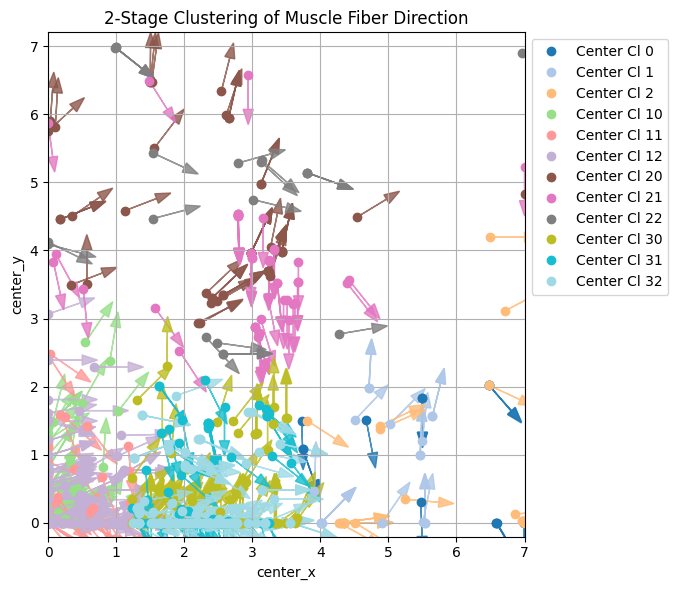

In [324]:
emg_data_session1 = filtered_emg_FP_session1
features_session1 = get_centers_directions(emg_data_session1, window_size=50, threshold=0)
results_df_session1, summary_df_session1 = clustering(features_session1)
summary_df_session1
plot_fiber(results_df_session1)
virtual_bipolars_session1, labels_session1, center_direction_session1, n_virtual_bipolars_session1 = get_virtual_bipolars(results_df_session1)
virtual_emg_session1 = get_virtual_emg(emg_data_session1, virtual_bipolars_session1)
X_session1, y_session1 = get_features(virtual_emg_session1, labels_session1)

In [325]:
summary_df_session1

,cluster,center_x_mean,center_x_std,center_y_mean,center_y_std,theta_deg_mean,theta_deg_std,count
0,0,5.646943,1.229951,0.940980,0.851299,-73.564912,16.155850,14
1,1,4.896573,0.670037,0.762029,0.777889,70.063968,19.335590,18
2,2,5.664377,1.265852,0.548066,1.092759,-2.737701,15.327538,26
3,10,0.156271,0.310457,0.240048,0.534265,52.363906,12.713131,107
4,11,0.423330,0.424788,0.408167,0.627024,-53.157946,20.657773,50
5,12,0.281492,0.413821,0.235038,0.486817,12.639763,11.781344,196
6,20,2.390439,1.340040,4.381913,1.071542,58.462809,21.906058,46
7,21,2.948888,1.167173,3.793571,0.928530,-82.332147,11.692042,46
8,22,2.536257,1.629225,4.757233,1.539894,-18.892597,19.469370,20
9,30,2.165125,0.721925,0.248735,0.531442,63.777193,18.874557,103


検出されたピーク数（条件を満たすもの）: 743


C:\Users\takeu\AppData\Local\Temp\ipykernel_29328\175111030.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name, n_clusters)  # 'tab20', 'nipy_spectral', etc.


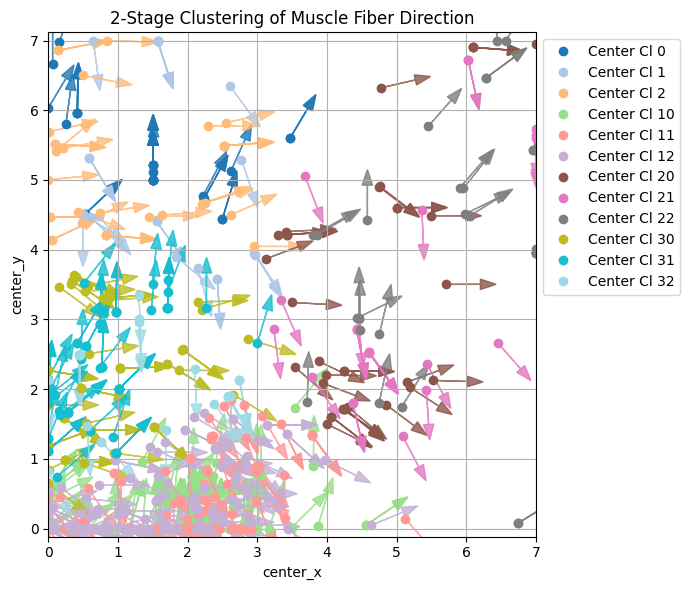

In [326]:
emg_data_session2 = filtered_emg_FP_session2
features_session2 = get_centers_directions(emg_data_session2, window_size=50, threshold=0)
results_df_session2, summary_df_session2 = clustering(features_session2)
summary_df_session2
plot_fiber(results_df_session2)
virtual_bipolars_session2, labels_session2, center_direction_session2, n_virtual_bipolars_session2 = get_virtual_bipolars(results_df_session2)
virtual_emg_session2 = get_virtual_emg(emg_data_session2, virtual_bipolars_session2)
X_session2, y_session2 = get_features(virtual_emg_session2, labels_session2)

In [327]:
summary_df_session2

,cluster,center_x_mean,center_x_std,center_y_mean,center_y_std,theta_deg_mean,theta_deg_std,count
0,0,1.447208,0.991705,5.278212,0.657737,76.620041,15.680070,27
1,1,1.604446,0.865024,5.080408,1.280769,-63.869229,15.876059,21
2,2,1.078674,1.051168,5.109679,0.862641,6.724072,12.356571,32
3,10,1.895657,1.036626,0.110035,0.265006,72.148228,18.112539,127
4,11,2.079713,0.818067,0.316744,0.506814,-68.850123,14.605474,181
5,12,1.428540,1.009777,0.345043,0.467455,-19.350123,18.120650,140
6,20,4.538659,0.935528,3.424193,1.794956,-13.465207,19.750113,35
7,21,5.006030,1.134785,3.454777,1.646872,-73.352762,13.262744,23
8,22,5.839313,1.143316,4.003052,1.759573,56.987477,20.948718,30
9,30,0.768018,0.754108,2.191350,0.927227,-11.281539,19.728473,51


In [328]:
if n_virtual_bipolars_session1 >= 1 and n_virtual_bipolars_session2 >= 1:
    result, y_train, y_test = SVC_classifier(X_session1, y_session1, X_session2, y_session2)
    diff = diff_analyzer(result, y_train, y_test, center_direction_session1, center_direction_session2)
else:
    diff = [None]

c:\Users\takeu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [329]:
diff

[{'train': 12,
  'test': 11,
  'x_diff': -1.7982213747875675,
  'y_diff': -0.08170562408750612,
  'theta_diff': 81.4898858104842},
 {'train': 30,
  'test': 0,
  'x_diff': 0.7179172027693732,
  'y_diff': -5.029477236306058,
  'theta_diff': -12.842847745071438},
 {'train': 31,
  'test': 30,
  'x_diff': 1.4683677996852604,
  'y_diff': -1.7535053764721948,
  'theta_diff': -60.29655299839589}]

In [321]:
n_virtual_bipolars_session2

0

In [338]:
diffs

[{'diff': [{'train': 0,
    'test': 30,
    'x_diff': 3.8259491881339103,
    'y_diff': 3.593425777750928,
    'theta_diff': 132.32900987559782},
   {'train': 30,
    'test': 10,
    'x_diff': -0.02485568984674824,
    'y_diff': -0.05747863767190342,
    'theta_diff': 9.093665741959128}],
  'file_name': ['pr_dataset/subject01_session1/maintenance_preprocess_sample1',
   'pr_dataset/subject01_session2/maintenance_preprocess_sample1'],
  'electrode_place': 'ED'},
 {'diff': [{'train': 20,
    'test': 21,
    'x_diff': 3.9834823697861856,
    'y_diff': 2.5134437058997183,
    'theta_diff': -8.075040434084851},
   {'train': 30,
    'test': 31,
    'x_diff': 0.7655725323054208,
    'y_diff': 0.15258456651748098,
    'theta_diff': -6.914685794504898},
   {'train': 32,
    'test': 11,
    'x_diff': 3.10617847342346,
    'y_diff': 1.6273900614522736,
    'theta_diff': 14.760163601038961}],
  'file_name': ['pr_dataset/subject01_session1/maintenance_preprocess_sample1',
   'pr_dataset/subject01_s